In [1]:
import numpy as np
import glob
from astropy.io.fits import getdata, getheader, writeto, append, setval

def write_spec(outspec, exp, outname='draft.pha', det_id='det0', mod='A'):
    # Read the template
    null, hdr = getdata('nu30001039002_srcA_sr.pha', 0, header=True)
    writeto(outname, null, header=hdr, overwrite=True)
    spec, hdr = getdata('nu30001039002_srcA_sr.pha', 1, header=True)
    spec['COUNTS'] = outspec
    hdr['RESPFILE'] = '{}{}.rmf'.format(det_id, mod)
    hdr['BACKFILE'] = ''
    hdr['ANCRFILE'] = ''
    hdr['EXPOSURE'] = exp
    append(outname, spec, hdr)



def load_data():
    # Returns the full mission data unbinned spectrum
    # set divided into epochs along with exposure.
    
    # Setup NuSTAR time epochs:
    launch_met=77241600. # 2012-06-13T00:00:00
    # Quaterly plots
    
    # Set up data structure:
    data_table = {'A':{}, 'B':{}}
    for mod in data_table:
        for det_id in range(4):
            det_key = 'det{}'.format(det_id)
            data_table[mod][det_key] = {}
    
    for ind, evtdir in enumerate(glob.glob('../scripts/reprocess_background/full_mission/*/')):
        for mod in ['A', 'B']:
            for file in glob.glob('{}/*{}_02.fits'.format(evtdir, mod)):
                print(file)
            # Skip these high background obsids
                if file.find("40101012") != -1:
                    continue

                if file.find("30161002002") != -1:
                    continue

                hdr= getheader(file, 1)
                epoch = np.float(hdr['TSTART'])
                dt_years = (epoch-launch_met) / 3.154e7 # years
                dt_quarter = dt_years
            # Change to per-quarter instead
                epoch_ind = np.int(np.floor(dt_quarter))
                if epoch_ind != 6:
                    continue
 
                e_key = 'epoch{}'.format(epoch_ind)

                evdata = getdata(file, 1)
                
                
                for det_id in range(4):
                    det_key = 'det{}'.format(det_id)
                    if e_key not in data_table[mod][det_key]:
                        data_table[mod][det_key][e_key] = {}
                        data_table[mod][det_key][e_key]['spec'] = np.zeros([4096])
                        data_table[mod][det_key][e_key]['exp'] = 0.

                    good_filter = ( (evdata['GRADE']==0) &
                               (evdata['DET_ID']==det_id) &
                               (evdata['LIMB_ANGLE'] < -2) & 
                               (evdata['STATUS']==0) )
                
                    inds = good_filter.nonzero()

                    ehist, edges = np.histogram(evdata['PI'][inds[0]], range = [0, 4096],
                                       bins=4096)

                    data_table[mod][det_key][e_key]['spec'] += ehist
                    data_table[mod][det_key][e_key]['exp'] +=np.float(hdr['EXPOSURE'])
    return data_table
    


In [2]:
dtab = load_data()



../scripts/reprocess_background/full_mission/30102028005/30102028005A_02.fits
../scripts/reprocess_background/full_mission/30102028005/30102028005B_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001A_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001B_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002A_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002B_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035A_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035B_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008A_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008B_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001A_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001B_02.fits
../scripts/reprocess_background/full_mission/60401026002/6040102

../scripts/reprocess_background/full_mission/30301009002/30301009002A_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002B_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010A_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010B_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002A_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002B_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001A_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001B_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003A_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003B_02.fits
../scripts/reprocess_background/full_mission/60021114002/60021114002A_02.fits
../scripts/reprocess_background/full_mission/60021114002/60021114002B_02.fits
../scripts/reprocess_background/full_mission/60002032007/6000203

../scripts/reprocess_background/full_mission/60201023001/60201023001A_02.fits
../scripts/reprocess_background/full_mission/60201023001/60201023001B_02.fits
../scripts/reprocess_background/full_mission/30202022003/30202022003A_02.fits
../scripts/reprocess_background/full_mission/30202022003/30202022003B_02.fits
../scripts/reprocess_background/full_mission/60361014002/60361014002A_02.fits
../scripts/reprocess_background/full_mission/60361014002/60361014002B_02.fits
../scripts/reprocess_background/full_mission/60002032009/60002032009A_02.fits
../scripts/reprocess_background/full_mission/60002032009/60002032009B_02.fits
../scripts/reprocess_background/full_mission/30302023004/30302023004A_02.fits
../scripts/reprocess_background/full_mission/30302023004/30302023004B_02.fits
../scripts/reprocess_background/full_mission/50312002001/50312002001A_02.fits
../scripts/reprocess_background/full_mission/50312002001/50312002001B_02.fits
../scripts/reprocess_background/full_mission/60061241001/6006124

../scripts/reprocess_background/full_mission/50101003002/50101003002B_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001A_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001B_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002A_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002B_02.fits
../scripts/reprocess_background/full_mission/30364004001/30364004001A_02.fits
../scripts/reprocess_background/full_mission/30364004001/30364004001B_02.fits
../scripts/reprocess_background/full_mission/30302007003/30302007003A_02.fits
../scripts/reprocess_background/full_mission/30302007003/30302007003B_02.fits
../scripts/reprocess_background/full_mission/60110003002/60110003002A_02.fits
../scripts/reprocess_background/full_mission/60110003002/60110003002B_02.fits
../scripts/reprocess_background/full_mission/80310245001/80310245001A_02.fits
../scripts/reprocess_background/full_mission/80310245001/8031024

../scripts/reprocess_background/full_mission/30002021031/30002021031A_02.fits
../scripts/reprocess_background/full_mission/30002021031/30002021031B_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002A_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002B_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001A_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001B_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002A_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002B_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003A_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003B_02.fits
../scripts/reprocess_background/full_mission/60374003002/60374003002A_02.fits
../scripts/reprocess_background/full_mission/60374003002/60374003002B_02.fits
../scripts/reprocess_background/full_mission/90401335001/9040133

../scripts/reprocess_background/full_mission/90502015002/90502015002A_02.fits
../scripts/reprocess_background/full_mission/90502015002/90502015002B_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008A_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008B_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004A_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004B_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002A_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002B_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001A_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001B_02.fits
../scripts/reprocess_background/full_mission/60021001002/60021001002A_02.fits
../scripts/reprocess_background/full_mission/60021001002/60021001002B_02.fits
../scripts/reprocess_background/full_mission/80002013020/8000201

../scripts/reprocess_background/full_mission/30460005002/30460005002B_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002A_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002B_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001A_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001B_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001A_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001B_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003A_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003B_02.fits
../scripts/reprocess_background/full_mission/80201050001/80201050001A_02.fits
../scripts/reprocess_background/full_mission/80201050001/80201050001B_02.fits
../scripts/reprocess_background/full_mission/60202021005/60202021005A_02.fits
../scripts/reprocess_background/full_mission/60202021005/6020202

../scripts/reprocess_background/full_mission/60101064002/60101064002B_02.fits
../scripts/reprocess_background/full_mission/80002013016/80002013016A_02.fits
../scripts/reprocess_background/full_mission/80002013016/80002013016B_02.fits
../scripts/reprocess_background/full_mission/80002014001/80002014001A_02.fits
../scripts/reprocess_background/full_mission/80002014001/80002014001B_02.fits
../scripts/reprocess_background/full_mission/30101057003/30101057003A_02.fits
../scripts/reprocess_background/full_mission/30101057003/30101057003B_02.fits
../scripts/reprocess_background/full_mission/50110001005/50110001005A_02.fits
../scripts/reprocess_background/full_mission/50110001005/50110001005B_02.fits
../scripts/reprocess_background/full_mission/60001111002/60001111002A_02.fits
../scripts/reprocess_background/full_mission/60001111002/60001111002B_02.fits
../scripts/reprocess_background/full_mission/60402008004/60402008004A_02.fits
../scripts/reprocess_background/full_mission/60402008004/6040200

../scripts/reprocess_background/full_mission/60002047001/60002047001B_02.fits
../scripts/reprocess_background/full_mission/60160175002/60160175002A_02.fits
../scripts/reprocess_background/full_mission/60160175002/60160175002B_02.fits
../scripts/reprocess_background/full_mission/60001135002/60001135002A_02.fits
../scripts/reprocess_background/full_mission/60001135002/60001135002B_02.fits
../scripts/reprocess_background/full_mission/70102001002/70102001002A_02.fits
../scripts/reprocess_background/full_mission/70102001002/70102001002B_02.fits
../scripts/reprocess_background/full_mission/60372002002/60372002002A_02.fits
../scripts/reprocess_background/full_mission/60372002002/60372002002B_02.fits
../scripts/reprocess_background/full_mission/90311036001/90311036001A_02.fits
../scripts/reprocess_background/full_mission/90311036001/90311036001B_02.fits
../scripts/reprocess_background/full_mission/60101011002/60101011002A_02.fits
../scripts/reprocess_background/full_mission/60101011002/6010101

../scripts/reprocess_background/full_mission/90410342001/90410342001A_02.fits
../scripts/reprocess_background/full_mission/90410342001/90410342001B_02.fits
../scripts/reprocess_background/full_mission/60364003001/60364003001A_02.fits
../scripts/reprocess_background/full_mission/60364003001/60364003001B_02.fits
../scripts/reprocess_background/full_mission/30361003002/30361003002A_02.fits
../scripts/reprocess_background/full_mission/30361003002/30361003002B_02.fits
../scripts/reprocess_background/full_mission/60110003004/60110003004A_02.fits
../scripts/reprocess_background/full_mission/60110003004/60110003004B_02.fits
../scripts/reprocess_background/full_mission/40021011001/40021011001A_02.fits
../scripts/reprocess_background/full_mission/40021011001/40021011001B_02.fits
../scripts/reprocess_background/full_mission/40014017001/40014017001A_02.fits
../scripts/reprocess_background/full_mission/40014017001/40014017001B_02.fits
../scripts/reprocess_background/full_mission/60023005002/6002300

../scripts/reprocess_background/full_mission/60023008001/60023008001A_02.fits
../scripts/reprocess_background/full_mission/60023008001/60023008001B_02.fits
../scripts/reprocess_background/full_mission/50002043010/50002043010A_02.fits
../scripts/reprocess_background/full_mission/50002043010/50002043010B_02.fits
../scripts/reprocess_background/full_mission/30302016005/30302016005A_02.fits
../scripts/reprocess_background/full_mission/30302016005/30302016005B_02.fits
../scripts/reprocess_background/full_mission/90402637007/90402637007A_02.fits
../scripts/reprocess_background/full_mission/90402637007/90402637007B_02.fits
../scripts/reprocess_background/full_mission/30201025001/30201025001A_02.fits
../scripts/reprocess_background/full_mission/30201025001/30201025001B_02.fits
../scripts/reprocess_background/full_mission/30301010001/30301010001A_02.fits
../scripts/reprocess_background/full_mission/30301010001/30301010001B_02.fits
../scripts/reprocess_background/full_mission/90501309002/9050130

../scripts/reprocess_background/full_mission/30402026001/30402026001B_02.fits
../scripts/reprocess_background/full_mission/60061361001/60061361001A_02.fits
../scripts/reprocess_background/full_mission/60061361001/60061361001B_02.fits
../scripts/reprocess_background/full_mission/60201012001/60201012001A_02.fits
../scripts/reprocess_background/full_mission/60201012001/60201012001B_02.fits
../scripts/reprocess_background/full_mission/30202027004/30202027004A_02.fits
../scripts/reprocess_background/full_mission/30202027004/30202027004B_02.fits
../scripts/reprocess_background/full_mission/30302012004/30302012004A_02.fits
../scripts/reprocess_background/full_mission/30302012004/30302012004B_02.fits
../scripts/reprocess_background/full_mission/60160038001/60160038001A_02.fits
../scripts/reprocess_background/full_mission/60160038001/60160038001B_02.fits
../scripts/reprocess_background/full_mission/30401014002/30401014002A_02.fits
../scripts/reprocess_background/full_mission/30401014002/3040101

../scripts/reprocess_background/full_mission/80302310002/80302310002A_02.fits
../scripts/reprocess_background/full_mission/80302310002/80302310002B_02.fits
../scripts/reprocess_background/full_mission/90313017001/90313017001A_02.fits
../scripts/reprocess_background/full_mission/90313017001/90313017001B_02.fits
../scripts/reprocess_background/full_mission/60061308002/60061308002A_02.fits
../scripts/reprocess_background/full_mission/60061308002/60061308002B_02.fits
../scripts/reprocess_background/full_mission/60001100002/60001100002A_02.fits
../scripts/reprocess_background/full_mission/60001100002/60001100002B_02.fits
../scripts/reprocess_background/full_mission/80001037002/80001037002A_02.fits
../scripts/reprocess_background/full_mission/80001037002/80001037002B_02.fits
../scripts/reprocess_background/full_mission/90311003001/90311003001A_02.fits
../scripts/reprocess_background/full_mission/90311003001/90311003001B_02.fits
../scripts/reprocess_background/full_mission/60061293001/6006129

../scripts/reprocess_background/full_mission/90202051001/90202051001A_02.fits
../scripts/reprocess_background/full_mission/90202051001/90202051001B_02.fits
../scripts/reprocess_background/full_mission/60101038001/60101038001A_02.fits
../scripts/reprocess_background/full_mission/60101038001/60101038001B_02.fits
../scripts/reprocess_background/full_mission/60002023039/60002023039A_02.fits
../scripts/reprocess_background/full_mission/60002023039/60002023039B_02.fits
../scripts/reprocess_background/full_mission/60111020001/60111020001A_02.fits
../scripts/reprocess_background/full_mission/60111020001/60111020001B_02.fits
../scripts/reprocess_background/full_mission/60260012001/60260012001A_02.fits
../scripts/reprocess_background/full_mission/60260012001/60260012001B_02.fits
../scripts/reprocess_background/full_mission/30002038004/30002038004A_02.fits
../scripts/reprocess_background/full_mission/30002038004/30002038004B_02.fits
../scripts/reprocess_background/full_mission/50310003001/5031000

../scripts/reprocess_background/full_mission/60021069001/60021069001A_02.fits
../scripts/reprocess_background/full_mission/60021069001/60021069001B_02.fits
../scripts/reprocess_background/full_mission/60001083003/60001083003A_02.fits
../scripts/reprocess_background/full_mission/60001083003/60001083003B_02.fits
../scripts/reprocess_background/full_mission/80202012004/80202012004A_02.fits
../scripts/reprocess_background/full_mission/80202012004/80202012004B_02.fits
../scripts/reprocess_background/full_mission/60021038001/60021038001A_02.fits
../scripts/reprocess_background/full_mission/60021038001/60021038001B_02.fits
../scripts/reprocess_background/full_mission/80202006003/80202006003A_02.fits
../scripts/reprocess_background/full_mission/80202006003/80202006003B_02.fits
../scripts/reprocess_background/full_mission/30363002002/30363002002A_02.fits
../scripts/reprocess_background/full_mission/30363002002/30363002002B_02.fits
../scripts/reprocess_background/full_mission/60366002001/6036600

../scripts/reprocess_background/full_mission/30001029029/30001029029A_02.fits
../scripts/reprocess_background/full_mission/30001029029/30001029029B_02.fits
../scripts/reprocess_background/full_mission/60061091006/60061091006A_02.fits
../scripts/reprocess_background/full_mission/60061091006/60061091006B_02.fits
../scripts/reprocess_background/full_mission/60360007001/60360007001A_02.fits
../scripts/reprocess_background/full_mission/60360007001/60360007001B_02.fits
../scripts/reprocess_background/full_mission/60466006002/60466006002A_02.fits
../scripts/reprocess_background/full_mission/60466006002/60466006002B_02.fits
../scripts/reprocess_background/full_mission/70301001002/70301001002A_02.fits
../scripts/reprocess_background/full_mission/70301001002/70301001002B_02.fits
../scripts/reprocess_background/full_mission/60061334001/60061334001A_02.fits
../scripts/reprocess_background/full_mission/60061334001/60061334001B_02.fits
../scripts/reprocess_background/full_mission/60201047001/6020104

../scripts/reprocess_background/full_mission/80002040006/80002040006A_02.fits
../scripts/reprocess_background/full_mission/80002040006/80002040006B_02.fits
../scripts/reprocess_background/full_mission/60101004002/60101004002A_02.fits
../scripts/reprocess_background/full_mission/60101004002/60101004002B_02.fits
../scripts/reprocess_background/full_mission/80302304005/80302304005A_02.fits
../scripts/reprocess_background/full_mission/80302304005/80302304005B_02.fits
../scripts/reprocess_background/full_mission/60001031002/60001031002A_02.fits
../scripts/reprocess_background/full_mission/60001031002/60001031002B_02.fits
../scripts/reprocess_background/full_mission/60370003002/60370003002A_02.fits
../scripts/reprocess_background/full_mission/60370003002/60370003002B_02.fits
../scripts/reprocess_background/full_mission/60101014002/60101014002A_02.fits
../scripts/reprocess_background/full_mission/60101014002/60101014002B_02.fits
../scripts/reprocess_background/full_mission/90313027001/9031302

../scripts/reprocess_background/full_mission/60023004004/60023004004B_02.fits
../scripts/reprocess_background/full_mission/60002027001/60002027001A_02.fits
../scripts/reprocess_background/full_mission/60002027001/60002027001B_02.fits
../scripts/reprocess_background/full_mission/60160284002/60160284002A_02.fits
../scripts/reprocess_background/full_mission/60160284002/60160284002B_02.fits
../scripts/reprocess_background/full_mission/30001026003/30001026003A_02.fits
../scripts/reprocess_background/full_mission/30001026003/30001026003B_02.fits
../scripts/reprocess_background/full_mission/40110002001/40110002001A_02.fits
../scripts/reprocess_background/full_mission/40110002001/40110002001B_02.fits
../scripts/reprocess_background/full_mission/60502004008/60502004008A_02.fits
../scripts/reprocess_background/full_mission/60502004008/60502004008B_02.fits
../scripts/reprocess_background/full_mission/90313013001/90313013001A_02.fits
../scripts/reprocess_background/full_mission/90313013001/9031301

../scripts/reprocess_background/full_mission/80302310003/80302310003A_02.fits
../scripts/reprocess_background/full_mission/80302310003/80302310003B_02.fits
../scripts/reprocess_background/full_mission/60160647001/60160647001A_02.fits
../scripts/reprocess_background/full_mission/60160647001/60160647001B_02.fits
../scripts/reprocess_background/full_mission/60502004006/60502004006A_02.fits
../scripts/reprocess_background/full_mission/60502004006/60502004006B_02.fits
../scripts/reprocess_background/full_mission/60021059001/60021059001A_02.fits
../scripts/reprocess_background/full_mission/60021059001/60021059001B_02.fits
../scripts/reprocess_background/full_mission/30201031001/30201031001A_02.fits
../scripts/reprocess_background/full_mission/30201031001/30201031001B_02.fits
../scripts/reprocess_background/full_mission/90401328002/90401328002A_02.fits
../scripts/reprocess_background/full_mission/90401328002/90401328002B_02.fits
../scripts/reprocess_background/full_mission/60160465001/6016046

../scripts/reprocess_background/full_mission/60401004001/60401004001A_02.fits
../scripts/reprocess_background/full_mission/60401004001/60401004001B_02.fits
../scripts/reprocess_background/full_mission/60501031001/60501031001A_02.fits
../scripts/reprocess_background/full_mission/60501031001/60501031001B_02.fits
../scripts/reprocess_background/full_mission/30302005001/30302005001A_02.fits
../scripts/reprocess_background/full_mission/30302005001/30302005001B_02.fits
../scripts/reprocess_background/full_mission/60302002007/60302002007A_02.fits
../scripts/reprocess_background/full_mission/60302002007/60302002007B_02.fits
../scripts/reprocess_background/full_mission/40001016003/40001016003A_02.fits
../scripts/reprocess_background/full_mission/40001016003/40001016003B_02.fits
../scripts/reprocess_background/full_mission/30002010012/30002010012A_02.fits
../scripts/reprocess_background/full_mission/30002010012/30002010012B_02.fits
../scripts/reprocess_background/full_mission/40302002003/4030200

../scripts/reprocess_background/full_mission/60102025004/60102025004A_02.fits
../scripts/reprocess_background/full_mission/60102025004/60102025004B_02.fits
../scripts/reprocess_background/full_mission/30002017002/30002017002A_02.fits
../scripts/reprocess_background/full_mission/30002017002/30002017002B_02.fits
../scripts/reprocess_background/full_mission/40302002004/40302002004A_02.fits
../scripts/reprocess_background/full_mission/40302002004/40302002004B_02.fits
../scripts/reprocess_background/full_mission/60160640002/60160640002A_02.fits
../scripts/reprocess_background/full_mission/60160640002/60160640002B_02.fits
../scripts/reprocess_background/full_mission/70023011002/70023011002A_02.fits
../scripts/reprocess_background/full_mission/70023011002/70023011002B_02.fits
../scripts/reprocess_background/full_mission/60022015002/60022015002A_02.fits
../scripts/reprocess_background/full_mission/60022015002/60022015002B_02.fits
../scripts/reprocess_background/full_mission/30002007002/3000200

../scripts/reprocess_background/full_mission/30360003002/30360003002A_02.fits
../scripts/reprocess_background/full_mission/30360003002/30360003002B_02.fits
../scripts/reprocess_background/full_mission/60365003001/60365003001A_02.fits
../scripts/reprocess_background/full_mission/60365003001/60365003001B_02.fits
../scripts/reprocess_background/full_mission/30001029002/30001029002A_02.fits
../scripts/reprocess_background/full_mission/30001029002/30001029002B_02.fits
../scripts/reprocess_background/full_mission/90401101002/90401101002A_02.fits
../scripts/reprocess_background/full_mission/90401101002/90401101002B_02.fits
../scripts/reprocess_background/full_mission/80410206001/80410206001A_02.fits
../scripts/reprocess_background/full_mission/80410206001/80410206001B_02.fits
../scripts/reprocess_background/full_mission/90202046003/90202046003A_02.fits
../scripts/reprocess_background/full_mission/90202046003/90202046003B_02.fits
../scripts/reprocess_background/full_mission/30002003003/3000200

../scripts/reprocess_background/full_mission/60061216002/60061216002B_02.fits
../scripts/reprocess_background/full_mission/60002049006/60002049006A_02.fits
../scripts/reprocess_background/full_mission/60002049006/60002049006B_02.fits
../scripts/reprocess_background/full_mission/60161138001/60161138001A_02.fits
../scripts/reprocess_background/full_mission/60161138001/60161138001B_02.fits
../scripts/reprocess_background/full_mission/30401023001/30401023001A_02.fits
../scripts/reprocess_background/full_mission/30401023001/30401023001B_02.fits
../scripts/reprocess_background/full_mission/90361016002/90361016002A_02.fits
../scripts/reprocess_background/full_mission/90361016002/90361016002B_02.fits
../scripts/reprocess_background/full_mission/60160254001/60160254001A_02.fits
../scripts/reprocess_background/full_mission/60160254001/60160254001B_02.fits
../scripts/reprocess_background/full_mission/90201021001/90201021001A_02.fits
../scripts/reprocess_background/full_mission/90201021001/9020102

../scripts/reprocess_background/full_mission/90501623001/90501623001B_02.fits
../scripts/reprocess_background/full_mission/60302002006/60302002006A_02.fits
../scripts/reprocess_background/full_mission/60302002006/60302002006B_02.fits
../scripts/reprocess_background/full_mission/80414203001/80414203001A_02.fits
../scripts/reprocess_background/full_mission/80414203001/80414203001B_02.fits
../scripts/reprocess_background/full_mission/40001016002/40001016002A_02.fits
../scripts/reprocess_background/full_mission/40001016002/40001016002B_02.fits
../scripts/reprocess_background/full_mission/90311018001/90311018001A_02.fits
../scripts/reprocess_background/full_mission/90311018001/90311018001B_02.fits
../scripts/reprocess_background/full_mission/60201060002/60201060002A_02.fits
../scripts/reprocess_background/full_mission/60201060002/60201060002B_02.fits
../scripts/reprocess_background/full_mission/60061008001/60061008001A_02.fits
../scripts/reprocess_background/full_mission/60061008001/6006100

../scripts/reprocess_background/full_mission/60374001001/60374001001A_02.fits
../scripts/reprocess_background/full_mission/60374001001/60374001001B_02.fits
../scripts/reprocess_background/full_mission/60021046001/60021046001A_02.fits
../scripts/reprocess_background/full_mission/60021046001/60021046001B_02.fits
../scripts/reprocess_background/full_mission/30001044001/30001044001A_02.fits
../scripts/reprocess_background/full_mission/30001044001/30001044001B_02.fits
../scripts/reprocess_background/full_mission/60002045003/60002045003A_02.fits
../scripts/reprocess_background/full_mission/60002045003/60002045003B_02.fits
../scripts/reprocess_background/full_mission/60160670002/60160670002A_02.fits
../scripts/reprocess_background/full_mission/60160670002/60160670002B_02.fits
../scripts/reprocess_background/full_mission/60302002008/60302002008A_02.fits
../scripts/reprocess_background/full_mission/60302002008/60302002008B_02.fits
../scripts/reprocess_background/full_mission/60021017001/6002101

../scripts/reprocess_background/full_mission/60368002002/60368002002B_02.fits
../scripts/reprocess_background/full_mission/60061091013/60061091013A_02.fits
../scripts/reprocess_background/full_mission/60061091013/60061091013B_02.fits
../scripts/reprocess_background/full_mission/30363001001/30363001001A_02.fits
../scripts/reprocess_background/full_mission/30363001001/30363001001B_02.fits
../scripts/reprocess_background/full_mission/30001019002/30001019002A_02.fits
../scripts/reprocess_background/full_mission/30001019002/30001019002B_02.fits
../scripts/reprocess_background/full_mission/60021091001/60021091001A_02.fits
../scripts/reprocess_background/full_mission/60021091001/60021091001B_02.fits
../scripts/reprocess_background/full_mission/80001045001/80001045001A_02.fits
../scripts/reprocess_background/full_mission/80001045001/80001045001B_02.fits
../scripts/reprocess_background/full_mission/80301301002/80301301002A_02.fits
../scripts/reprocess_background/full_mission/80301301002/8030130

../scripts/reprocess_background/full_mission/30401013001/30401013001A_02.fits
../scripts/reprocess_background/full_mission/30401013001/30401013001B_02.fits
../scripts/reprocess_background/full_mission/30401020011/30401020011A_02.fits
../scripts/reprocess_background/full_mission/30401020011/30401020011B_02.fits
../scripts/reprocess_background/full_mission/60061226002/60061226002A_02.fits
../scripts/reprocess_background/full_mission/60061226002/60061226002B_02.fits
../scripts/reprocess_background/full_mission/60161299001/60161299001A_02.fits
../scripts/reprocess_background/full_mission/60161299001/60161299001B_02.fits
../scripts/reprocess_background/full_mission/60061337002/60061337002A_02.fits
../scripts/reprocess_background/full_mission/60061337002/60061337002B_02.fits
../scripts/reprocess_background/full_mission/60201044002/60201044002A_02.fits
../scripts/reprocess_background/full_mission/60201044002/60201044002B_02.fits
../scripts/reprocess_background/full_mission/90313028001/9031302

../scripts/reprocess_background/full_mission/30501003001/30501003001B_02.fits
../scripts/reprocess_background/full_mission/90361003002/90361003002A_02.fits
../scripts/reprocess_background/full_mission/90361003002/90361003002B_02.fits
../scripts/reprocess_background/full_mission/30401036001/30401036001A_02.fits
../scripts/reprocess_background/full_mission/30401036001/30401036001B_02.fits
../scripts/reprocess_background/full_mission/60260014002/60260014002A_02.fits
../scripts/reprocess_background/full_mission/60260014002/60260014002B_02.fits
../scripts/reprocess_background/full_mission/60061312002/60061312002A_02.fits
../scripts/reprocess_background/full_mission/60061312002/60061312002B_02.fits
../scripts/reprocess_background/full_mission/60061083002/60061083002A_02.fits
../scripts/reprocess_background/full_mission/60061083002/60061083002B_02.fits
../scripts/reprocess_background/full_mission/60061009001/60061009001A_02.fits
../scripts/reprocess_background/full_mission/60061009001/6006100

../scripts/reprocess_background/full_mission/30002021012/30002021012B_02.fits
../scripts/reprocess_background/full_mission/60001099003/60001099003A_02.fits
../scripts/reprocess_background/full_mission/60001099003/60001099003B_02.fits
../scripts/reprocess_background/full_mission/60022010002/60022010002A_02.fits
../scripts/reprocess_background/full_mission/60022010002/60022010002B_02.fits
../scripts/reprocess_background/full_mission/30101044001/30101044001A_02.fits
../scripts/reprocess_background/full_mission/30101044001/30101044001B_02.fits
../scripts/reprocess_background/full_mission/90501337002/90501337002A_02.fits
../scripts/reprocess_background/full_mission/90501337002/90501337002B_02.fits
../scripts/reprocess_background/full_mission/60002044004/60002044004A_02.fits
../scripts/reprocess_background/full_mission/60002044004/60002044004B_02.fits
../scripts/reprocess_background/full_mission/40032014002/40032014002A_02.fits
../scripts/reprocess_background/full_mission/40032014002/4003201

../scripts/reprocess_background/full_mission/80002017003/80002017003A_02.fits
../scripts/reprocess_background/full_mission/80002017003/80002017003B_02.fits
../scripts/reprocess_background/full_mission/60002060003/60002060003A_02.fits
../scripts/reprocess_background/full_mission/60002060003/60002060003B_02.fits
../scripts/reprocess_background/full_mission/90501327002/90501327002A_02.fits
../scripts/reprocess_background/full_mission/90501327002/90501327002B_02.fits
../scripts/reprocess_background/full_mission/90401312002/90401312002A_02.fits
../scripts/reprocess_background/full_mission/90401312002/90401312002B_02.fits
../scripts/reprocess_background/full_mission/60021063001/60021063001A_02.fits
../scripts/reprocess_background/full_mission/60021063001/60021063001B_02.fits
../scripts/reprocess_background/full_mission/30002021046/30002021046A_02.fits
../scripts/reprocess_background/full_mission/30002021046/30002021046B_02.fits
../scripts/reprocess_background/full_mission/40032004002/4003200

../scripts/reprocess_background/full_mission/80001044006/80001044006A_02.fits
../scripts/reprocess_background/full_mission/80001044006/80001044006B_02.fits
../scripts/reprocess_background/full_mission/50001039002/50001039002A_02.fits
../scripts/reprocess_background/full_mission/50001039002/50001039002B_02.fits
../scripts/reprocess_background/full_mission/60001147001/60001147001A_02.fits
../scripts/reprocess_background/full_mission/60001147001/60001147001B_02.fits
../scripts/reprocess_background/full_mission/80202051001/80202051001A_02.fits
../scripts/reprocess_background/full_mission/80202051001/80202051001B_02.fits
../scripts/reprocess_background/full_mission/30502015002/30502015002A_02.fits
../scripts/reprocess_background/full_mission/30502015002/30502015002B_02.fits
../scripts/reprocess_background/full_mission/40012019001/40012019001A_02.fits
../scripts/reprocess_background/full_mission/40012019001/40012019001B_02.fits
../scripts/reprocess_background/full_mission/40021002003/4002100

../scripts/reprocess_background/full_mission/30460022001/30460022001A_02.fits
../scripts/reprocess_background/full_mission/30460022001/30460022001B_02.fits
../scripts/reprocess_background/full_mission/60201051002/60201051002A_02.fits
../scripts/reprocess_background/full_mission/60201051002/60201051002B_02.fits
../scripts/reprocess_background/full_mission/60061322002/60061322002A_02.fits
../scripts/reprocess_background/full_mission/60061322002/60061322002B_02.fits
../scripts/reprocess_background/full_mission/60061039001/60061039001A_02.fits
../scripts/reprocess_background/full_mission/60061039001/60061039001B_02.fits
../scripts/reprocess_background/full_mission/80402015004/80402015004A_02.fits
../scripts/reprocess_background/full_mission/80402015004/80402015004B_02.fits
../scripts/reprocess_background/full_mission/60101084001/60101084001A_02.fits
../scripts/reprocess_background/full_mission/60101084001/60101084001B_02.fits
../scripts/reprocess_background/full_mission/80202014001/8020201

../scripts/reprocess_background/full_mission/60402003002/60402003002B_02.fits
../scripts/reprocess_background/full_mission/60202002007/60202002007A_02.fits
../scripts/reprocess_background/full_mission/60202002007/60202002007B_02.fits
../scripts/reprocess_background/full_mission/90361003004/90361003004A_02.fits
../scripts/reprocess_background/full_mission/90361003004/90361003004B_02.fits
../scripts/reprocess_background/full_mission/40021012002/40021012002A_02.fits
../scripts/reprocess_background/full_mission/40021012002/40021012002B_02.fits
../scripts/reprocess_background/full_mission/60301031003/60301031003A_02.fits
../scripts/reprocess_background/full_mission/60301031003/60301031003B_02.fits
../scripts/reprocess_background/full_mission/60401031001/60401031001A_02.fits
../scripts/reprocess_background/full_mission/60401031001/60401031001B_02.fits
../scripts/reprocess_background/full_mission/80002095004/80002095004A_02.fits
../scripts/reprocess_background/full_mission/80002095004/8000209

../scripts/reprocess_background/full_mission/40021002002/40021002002A_02.fits
../scripts/reprocess_background/full_mission/40021002002/40021002002B_02.fits
../scripts/reprocess_background/full_mission/90202016004/90202016004A_02.fits
../scripts/reprocess_background/full_mission/90202016004/90202016004B_02.fits
../scripts/reprocess_background/full_mission/60160768001/60160768001A_02.fits
../scripts/reprocess_background/full_mission/60160768001/60160768001B_02.fits
../scripts/reprocess_background/full_mission/60202015010/60202015010A_02.fits
../scripts/reprocess_background/full_mission/60202015010/60202015010B_02.fits
../scripts/reprocess_background/full_mission/60374008002/60374008002A_02.fits
../scripts/reprocess_background/full_mission/60374008002/60374008002B_02.fits
../scripts/reprocess_background/full_mission/60021053001/60021053001A_02.fits
../scripts/reprocess_background/full_mission/60021053001/60021053001B_02.fits
../scripts/reprocess_background/full_mission/60102051004/6010205

../scripts/reprocess_background/full_mission/30401016001/30401016001B_02.fits
../scripts/reprocess_background/full_mission/90401309010/90401309010A_02.fits
../scripts/reprocess_background/full_mission/90401309010/90401309010B_02.fits
../scripts/reprocess_background/full_mission/60061217005/60061217005A_02.fits
../scripts/reprocess_background/full_mission/60061217005/60061217005B_02.fits
../scripts/reprocess_background/full_mission/90501602001/90501602001A_02.fits
../scripts/reprocess_background/full_mission/90501602001/90501602001B_02.fits
../scripts/reprocess_background/full_mission/60464014001/60464014001A_02.fits
../scripts/reprocess_background/full_mission/60464014001/60464014001B_02.fits
../scripts/reprocess_background/full_mission/60468003001/60468003001A_02.fits
../scripts/reprocess_background/full_mission/60468003001/60468003001B_02.fits
../scripts/reprocess_background/full_mission/90311039001/90311039001A_02.fits
../scripts/reprocess_background/full_mission/90311039001/9031103

../scripts/reprocess_background/full_mission/60502035003/60502035003A_02.fits
../scripts/reprocess_background/full_mission/60502035003/60502035003B_02.fits
../scripts/reprocess_background/full_mission/90302004002/90302004002A_02.fits
../scripts/reprocess_background/full_mission/90302004002/90302004002B_02.fits
../scripts/reprocess_background/full_mission/80002096005/80002096005A_02.fits
../scripts/reprocess_background/full_mission/80002096005/80002096005B_02.fits
../scripts/reprocess_background/full_mission/90202031002/90202031002A_02.fits
../scripts/reprocess_background/full_mission/90202031002/90202031002B_02.fits
../scripts/reprocess_background/full_mission/60261005001/60261005001A_02.fits
../scripts/reprocess_background/full_mission/60101058002/60101058002A_02.fits
../scripts/reprocess_background/full_mission/60101058002/60101058002B_02.fits
../scripts/reprocess_background/full_mission/30502006002/30502006002A_02.fits
../scripts/reprocess_background/full_mission/30502006002/3050200

../scripts/reprocess_background/full_mission/60160586002/60160586002B_02.fits
../scripts/reprocess_background/full_mission/60023001006/60023001006A_02.fits
../scripts/reprocess_background/full_mission/60023001006/60023001006B_02.fits
../scripts/reprocess_background/full_mission/60202048003/60202048003A_02.fits
../scripts/reprocess_background/full_mission/60202048003/60202048003B_02.fits
../scripts/reprocess_background/full_mission/60160706002/60160706002A_02.fits
../scripts/reprocess_background/full_mission/60160706002/60160706002B_02.fits
../scripts/reprocess_background/full_mission/30001023001/30001023001A_02.fits
../scripts/reprocess_background/full_mission/30001023001/30001023001B_02.fits
../scripts/reprocess_background/full_mission/60021021001/60021021001A_02.fits
../scripts/reprocess_background/full_mission/60021021001/60021021001B_02.fits
../scripts/reprocess_background/full_mission/50460004001/50460004001A_02.fits
../scripts/reprocess_background/full_mission/50460004001/5046000

../scripts/reprocess_background/full_mission/50002041003/50002041003A_02.fits
../scripts/reprocess_background/full_mission/50002041003/50002041003B_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001A_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001B_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003A_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003B_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031A_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031B_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001A_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001B_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001A_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001B_02.fits
../scripts/reprocess_background/full_mission/60161526001/6016152

../scripts/reprocess_background/full_mission/90501324002/90501324002B_02.fits
../scripts/reprocess_background/full_mission/90401311002/90401311002A_02.fits
../scripts/reprocess_background/full_mission/90401311002/90401311002B_02.fits
../scripts/reprocess_background/full_mission/60402008006/60402008006A_02.fits
../scripts/reprocess_background/full_mission/60402008006/60402008006B_02.fits
../scripts/reprocess_background/full_mission/60463049001/60463049001A_02.fits
../scripts/reprocess_background/full_mission/60463049001/60463049001B_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001A_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001B_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002A_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002B_02.fits
../scripts/reprocess_background/full_mission/30401025001/30401025001A_02.fits
../scripts/reprocess_background/full_mission/30401025001/3040102

../scripts/reprocess_background/full_mission/80502304004/80502304004A_02.fits
../scripts/reprocess_background/full_mission/80502304004/80502304004B_02.fits
../scripts/reprocess_background/full_mission/80302305001/80302305001A_02.fits
../scripts/reprocess_background/full_mission/80302305001/80302305001B_02.fits
../scripts/reprocess_background/full_mission/80002013025/80002013025A_02.fits
../scripts/reprocess_background/full_mission/80002013025/80002013025B_02.fits
../scripts/reprocess_background/full_mission/80406201002/80406201002A_02.fits
../scripts/reprocess_background/full_mission/80406201002/80406201002B_02.fits
../scripts/reprocess_background/full_mission/60022007003/60022007003A_02.fits
../scripts/reprocess_background/full_mission/60022007003/60022007003B_02.fits
../scripts/reprocess_background/full_mission/60002036002/60002036002A_02.fits
../scripts/reprocess_background/full_mission/60002036002/60002036002B_02.fits
../scripts/reprocess_background/full_mission/60373004002/6037300

../scripts/reprocess_background/full_mission/60061292002/60061292002A_02.fits
../scripts/reprocess_background/full_mission/60061292002/60061292002B_02.fits
../scripts/reprocess_background/full_mission/80101003001/80101003001A_02.fits
../scripts/reprocess_background/full_mission/80101003001/80101003001B_02.fits
../scripts/reprocess_background/full_mission/60001101001/60001101001A_02.fits
../scripts/reprocess_background/full_mission/60001101001/60001101001B_02.fits
../scripts/reprocess_background/full_mission/90361018001/90361018001A_02.fits
../scripts/reprocess_background/full_mission/90361018001/90361018001B_02.fits
../scripts/reprocess_background/full_mission/80404201002/80404201002A_02.fits
../scripts/reprocess_background/full_mission/80404201002/80404201002B_02.fits
../scripts/reprocess_background/full_mission/30102041004/30102041004A_02.fits
../scripts/reprocess_background/full_mission/30102041004/30102041004B_02.fits
../scripts/reprocess_background/full_mission/60371004002/6037100

../scripts/reprocess_background/full_mission/40401006002/40401006002B_02.fits
../scripts/reprocess_background/full_mission/60021025001/60021025001A_02.fits
../scripts/reprocess_background/full_mission/60021025001/60021025001B_02.fits
../scripts/reprocess_background/full_mission/60160788001/60160788001A_02.fits
../scripts/reprocess_background/full_mission/60160788001/60160788001B_02.fits
../scripts/reprocess_background/full_mission/30001027001/30001027001A_02.fits
../scripts/reprocess_background/full_mission/30001027001/30001027001B_02.fits
../scripts/reprocess_background/full_mission/30002021005/30002021005A_02.fits
../scripts/reprocess_background/full_mission/30002021005/30002021005B_02.fits
../scripts/reprocess_background/full_mission/70023013002/70023013002A_02.fits
../scripts/reprocess_background/full_mission/70023013002/70023013002B_02.fits
../scripts/reprocess_background/full_mission/40502001001/40502001001A_02.fits
../scripts/reprocess_background/full_mission/40502001001/4050200

../scripts/reprocess_background/full_mission/30360001002/30360001002B_02.fits
../scripts/reprocess_background/full_mission/60061241003/60061241003A_02.fits
../scripts/reprocess_background/full_mission/60061241003/60061241003B_02.fits
../scripts/reprocess_background/full_mission/80410204001/80410204001A_02.fits
../scripts/reprocess_background/full_mission/80410204001/80410204001B_02.fits
../scripts/reprocess_background/full_mission/90411200001/90411200001A_02.fits
../scripts/reprocess_background/full_mission/90411200001/90411200001B_02.fits
../scripts/reprocess_background/full_mission/30201010002/30201010002A_02.fits
../scripts/reprocess_background/full_mission/30201010002/30201010002B_02.fits
../scripts/reprocess_background/full_mission/30301025002/30301025002A_02.fits
../scripts/reprocess_background/full_mission/30301025002/30301025002B_02.fits
../scripts/reprocess_background/full_mission/90401309001/90401309001A_02.fits
../scripts/reprocess_background/full_mission/90401309001/9040130

../scripts/reprocess_background/full_mission/60061259001/60061259001A_02.fits
../scripts/reprocess_background/full_mission/60061259001/60061259001B_02.fits
../scripts/reprocess_background/full_mission/30460019002/30460019002A_02.fits
../scripts/reprocess_background/full_mission/30460019002/30460019002B_02.fits
../scripts/reprocess_background/full_mission/60001140001/60001140001A_02.fits
../scripts/reprocess_background/full_mission/60001140001/60001140001B_02.fits
../scripts/reprocess_background/full_mission/60002032002/60002032002A_02.fits
../scripts/reprocess_background/full_mission/60002032002/60002032002B_02.fits
../scripts/reprocess_background/full_mission/80301307005/80301307005A_02.fits
../scripts/reprocess_background/full_mission/80301307005/80301307005B_02.fits
../scripts/reprocess_background/full_mission/30202022008/30202022008A_02.fits
../scripts/reprocess_background/full_mission/30202022008/30202022008B_02.fits
../scripts/reprocess_background/full_mission/90001004002/9000100

../scripts/reprocess_background/full_mission/30364001002/30364001002B_02.fits
../scripts/reprocess_background/full_mission/60101069002/60101069002A_02.fits
../scripts/reprocess_background/full_mission/60101069002/60101069002B_02.fits
../scripts/reprocess_background/full_mission/60201036002/60201036002A_02.fits
../scripts/reprocess_background/full_mission/60201036002/60201036002B_02.fits
../scripts/reprocess_background/full_mission/60061345002/60061345002A_02.fits
../scripts/reprocess_background/full_mission/60061345002/60061345002B_02.fits
../scripts/reprocess_background/full_mission/60061205002/60061205002A_02.fits
../scripts/reprocess_background/full_mission/60061205002/60061205002B_02.fits
../scripts/reprocess_background/full_mission/90301007001/90301007001A_02.fits
../scripts/reprocess_background/full_mission/90301007001/90301007001B_02.fits
../scripts/reprocess_background/full_mission/60502004003/60502004003A_02.fits
../scripts/reprocess_background/full_mission/60502004003/6050200

../scripts/reprocess_background/full_mission/30101027001/30101027001A_02.fits
../scripts/reprocess_background/full_mission/30101027001/30101027001B_02.fits
../scripts/reprocess_background/full_mission/30001012001/30001012001A_02.fits
../scripts/reprocess_background/full_mission/30001012001/30001012001B_02.fits
../scripts/reprocess_background/full_mission/60002027004/60002027004A_02.fits
../scripts/reprocess_background/full_mission/60002027004/60002027004B_02.fits
../scripts/reprocess_background/full_mission/80401312001/80401312001A_02.fits
../scripts/reprocess_background/full_mission/80401312001/80401312001B_02.fits
../scripts/reprocess_background/full_mission/60021010001/60021010001A_02.fits
../scripts/reprocess_background/full_mission/60021010001/60021010001B_02.fits
../scripts/reprocess_background/full_mission/30001026006/30001026006A_02.fits
../scripts/reprocess_background/full_mission/30001026006/30001026006B_02.fits
../scripts/reprocess_background/full_mission/30502007004/3050200

../scripts/reprocess_background/full_mission/60022006002/60022006002A_02.fits
../scripts/reprocess_background/full_mission/60022006002/60022006002B_02.fits
../scripts/reprocess_background/full_mission/80002040003/80002040003A_02.fits
../scripts/reprocess_background/full_mission/80002040003/80002040003B_02.fits
../scripts/reprocess_background/full_mission/70023002002/70023002002A_02.fits
../scripts/reprocess_background/full_mission/70023002002/70023002002B_02.fits
../scripts/reprocess_background/full_mission/80402304002/80402304002A_02.fits
../scripts/reprocess_background/full_mission/80402304002/80402304002B_02.fits
../scripts/reprocess_background/full_mission/60160713002/60160713002A_02.fits
../scripts/reprocess_background/full_mission/60160713002/60160713002B_02.fits
../scripts/reprocess_background/full_mission/30161001002/30161001002A_02.fits
../scripts/reprocess_background/full_mission/30161001002/30161001002B_02.fits
../scripts/reprocess_background/full_mission/80102101004/8010210

../scripts/reprocess_background/full_mission/60061244002/60061244002A_02.fits
../scripts/reprocess_background/full_mission/60061244002/60061244002B_02.fits
../scripts/reprocess_background/full_mission/60465004002/60465004002A_02.fits
../scripts/reprocess_background/full_mission/60465004002/60465004002B_02.fits
../scripts/reprocess_background/full_mission/30460004001/30460004001A_02.fits
../scripts/reprocess_background/full_mission/30460004001/30460004001B_02.fits
../scripts/reprocess_background/full_mission/30001029014/30001029014A_02.fits
../scripts/reprocess_background/full_mission/30001029014/30001029014B_02.fits
../scripts/reprocess_background/full_mission/60363005001/60363005001A_02.fits
../scripts/reprocess_background/full_mission/60363005001/60363005001B_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001A_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001B_02.fits
../scripts/reprocess_background/full_mission/80201034005/8020103

../scripts/reprocess_background/full_mission/80202012006/80202012006B_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001A_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001B_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002A_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002B_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002A_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002B_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002A_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002B_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005A_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005B_02.fits
../scripts/reprocess_background/full_mission/80502630001/80502630001A_02.fits
../scripts/reprocess_background/full_mission/80502630001/8050263

../scripts/reprocess_background/full_mission/60374002001/60374002001B_02.fits
../scripts/reprocess_background/full_mission/60021045001/60021045001A_02.fits
../scripts/reprocess_background/full_mission/60021045001/60021045001B_02.fits
../scripts/reprocess_background/full_mission/90401334002/90401334002A_02.fits
../scripts/reprocess_background/full_mission/90401334002/90401334002B_02.fits
../scripts/reprocess_background/full_mission/60001100007/60001100007A_02.fits
../scripts/reprocess_background/full_mission/60001100007/60001100007B_02.fits
../scripts/reprocess_background/full_mission/60002046003/60002046003A_02.fits
../scripts/reprocess_background/full_mission/60002046003/60002046003B_02.fits
../scripts/reprocess_background/full_mission/90202051003/90202051003A_02.fits
../scripts/reprocess_background/full_mission/90202051003/90202051003B_02.fits
../scripts/reprocess_background/full_mission/30002038006/30002038006A_02.fits
../scripts/reprocess_background/full_mission/30002038006/3000203

../scripts/reprocess_background/full_mission/90401338001/90401338001B_02.fits
../scripts/reprocess_background/full_mission/30401020007/30401020007A_02.fits
../scripts/reprocess_background/full_mission/30401020007/30401020007B_02.fits
../scripts/reprocess_background/full_mission/60402021005/60402021005A_02.fits
../scripts/reprocess_background/full_mission/60402021005/60402021005B_02.fits
../scripts/reprocess_background/full_mission/60021049002/60021049002A_02.fits
../scripts/reprocess_background/full_mission/60021049002/60021049002B_02.fits
../scripts/reprocess_background/full_mission/60368001002/60368001002A_02.fits
../scripts/reprocess_background/full_mission/60368001002/60368001002B_02.fits
../scripts/reprocess_background/full_mission/60160657002/60160657002A_02.fits
../scripts/reprocess_background/full_mission/60160657002/60160657002B_02.fits
../scripts/reprocess_background/full_mission/80502335002/80502335002A_02.fits
../scripts/reprocess_background/full_mission/80502335002/8050233

../scripts/reprocess_background/full_mission/60361021001/60361021001A_02.fits
../scripts/reprocess_background/full_mission/60361021001/60361021001B_02.fits
../scripts/reprocess_background/full_mission/60023008003/60023008003A_02.fits
../scripts/reprocess_background/full_mission/60023008003/60023008003B_02.fits
../scripts/reprocess_background/full_mission/50002043012/50002043012A_02.fits
../scripts/reprocess_background/full_mission/50002043012/50002043012B_02.fits
../scripts/reprocess_background/full_mission/90402637005/90402637005A_02.fits
../scripts/reprocess_background/full_mission/90402637005/90402637005B_02.fits
../scripts/reprocess_background/full_mission/60502010004/60502010004A_02.fits
../scripts/reprocess_background/full_mission/60502010004/60502010004B_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002A_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002B_02.fits
../scripts/reprocess_background/full_mission/40101004002/4010100

../scripts/reprocess_background/full_mission/30301013001/30301013001A_02.fits
../scripts/reprocess_background/full_mission/30301013001/30301013001B_02.fits
../scripts/reprocess_background/full_mission/60160472001/60160472001A_02.fits
../scripts/reprocess_background/full_mission/60160472001/60160472001B_02.fits
../scripts/reprocess_background/full_mission/90410350001/90410350001A_02.fits
../scripts/reprocess_background/full_mission/90410350001/90410350001B_02.fits
../scripts/reprocess_background/full_mission/40410002001/40410002001A_02.fits
../scripts/reprocess_background/full_mission/40410002001/40410002001B_02.fits
../scripts/reprocess_background/full_mission/60463067001/60463067001A_02.fits
../scripts/reprocess_background/full_mission/60463067001/60463067001B_02.fits
../scripts/reprocess_background/full_mission/60374009001/60374009001A_02.fits
../scripts/reprocess_background/full_mission/60374009001/60374009001B_02.fits
../scripts/reprocess_background/full_mission/90311024001/9031102

../scripts/reprocess_background/full_mission/60061280001/60061280001B_02.fits
../scripts/reprocess_background/full_mission/90311010001/90311010001A_02.fits
../scripts/reprocess_background/full_mission/90311010001/90311010001B_02.fits
../scripts/reprocess_background/full_mission/90401327007/90401327007A_02.fits
../scripts/reprocess_background/full_mission/90401327007/90401327007B_02.fits
../scripts/reprocess_background/full_mission/60001113002/60001113002A_02.fits
../scripts/reprocess_background/full_mission/60001113002/60001113002B_02.fits
../scripts/reprocess_background/full_mission/90301008001/90301008001A_02.fits
../scripts/reprocess_background/full_mission/90301008001/90301008001B_02.fits
../scripts/reprocess_background/full_mission/60201040001/60201040001A_02.fits
../scripts/reprocess_background/full_mission/60201040001/60201040001B_02.fits
../scripts/reprocess_background/full_mission/60061091011/60061091011A_02.fits
../scripts/reprocess_background/full_mission/60061091011/6006109

../scripts/reprocess_background/full_mission/30402001001/30402001001B_02.fits
../scripts/reprocess_background/full_mission/30364002001/30364002001A_02.fits
../scripts/reprocess_background/full_mission/30364002001/30364002001B_02.fits
../scripts/reprocess_background/full_mission/60201035001/60201035001A_02.fits
../scripts/reprocess_background/full_mission/60201035001/60201035001B_02.fits
../scripts/reprocess_background/full_mission/80310243001/80310243001A_02.fits
../scripts/reprocess_background/full_mission/80310243001/80310243001B_02.fits
../scripts/reprocess_background/full_mission/60061346001/60061346001A_02.fits
../scripts/reprocess_background/full_mission/60061346001/60061346001B_02.fits
../scripts/reprocess_background/full_mission/90502615001/90502615001A_02.fits
../scripts/reprocess_background/full_mission/90502615001/90502615001B_02.fits
../scripts/reprocess_background/full_mission/60467003001/60467003001A_02.fits
../scripts/reprocess_background/full_mission/60467003001/6046700

../scripts/reprocess_background/full_mission/60002023017/60002023017B_02.fits
../scripts/reprocess_background/full_mission/30001011005/30001011005A_02.fits
../scripts/reprocess_background/full_mission/30001011005/30001011005B_02.fits
../scripts/reprocess_background/full_mission/60001156003/60001156003A_02.fits
../scripts/reprocess_background/full_mission/60001156003/60001156003B_02.fits
../scripts/reprocess_background/full_mission/50460002002/50460002002A_02.fits
../scripts/reprocess_background/full_mission/50460002002/50460002002B_02.fits
../scripts/reprocess_background/full_mission/60102025007/60102025007A_02.fits
../scripts/reprocess_background/full_mission/60102025007/60102025007B_02.fits
../scripts/reprocess_background/full_mission/30001025002/30001025002A_02.fits
../scripts/reprocess_background/full_mission/30001025002/30001025002B_02.fits
../scripts/reprocess_background/full_mission/60160640001/60160640001A_02.fits
../scripts/reprocess_background/full_mission/60160640001/6016064

../scripts/reprocess_background/full_mission/60002049003/60002049003B_02.fits
../scripts/reprocess_background/full_mission/30301017001/30301017001A_02.fits
../scripts/reprocess_background/full_mission/30301017001/30301017001B_02.fits
../scripts/reprocess_background/full_mission/60466001003/60466001003A_02.fits
../scripts/reprocess_background/full_mission/60466001003/60466001003B_02.fits
../scripts/reprocess_background/full_mission/30363001002/30363001002A_02.fits
../scripts/reprocess_background/full_mission/30363001002/30363001002B_02.fits
../scripts/reprocess_background/full_mission/60061091010/60061091010A_02.fits
../scripts/reprocess_background/full_mission/60061091010/60061091010B_02.fits
../scripts/reprocess_background/full_mission/30001019001/30001019001A_02.fits
../scripts/reprocess_background/full_mission/30001019001/30001019001B_02.fits
../scripts/reprocess_background/full_mission/30101030002/30101030002A_02.fits
../scripts/reprocess_background/full_mission/30101030002/3010103

../scripts/reprocess_background/full_mission/60402021010/60402021010B_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012A_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012B_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001A_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001B_02.fits
../scripts/reprocess_background/full_mission/60360004001/60360004001A_02.fits
../scripts/reprocess_background/full_mission/60360004001/60360004001B_02.fits
../scripts/reprocess_background/full_mission/60466005002/60466005002A_02.fits
../scripts/reprocess_background/full_mission/60466005002/60466005002B_02.fits
../scripts/reprocess_background/full_mission/70301002002/70301002002A_02.fits
../scripts/reprocess_background/full_mission/70301002002/70301002002B_02.fits
../scripts/reprocess_background/full_mission/60061337001/60061337001A_02.fits
../scripts/reprocess_background/full_mission/60061337001/6006133

../scripts/reprocess_background/full_mission/50101001002/50101001002A_02.fits
../scripts/reprocess_background/full_mission/50101001002/50101001002B_02.fits
../scripts/reprocess_background/full_mission/60469004001/60469004001A_02.fits
../scripts/reprocess_background/full_mission/60469004001/60469004001B_02.fits
../scripts/reprocess_background/full_mission/60002038002/60002038002A_02.fits
../scripts/reprocess_background/full_mission/60002038002/60002038002B_02.fits
../scripts/reprocess_background/full_mission/60201019002/60201019002A_02.fits
../scripts/reprocess_background/full_mission/60201019002/60201019002B_02.fits
../scripts/reprocess_background/full_mission/60061071001/60061071001A_02.fits
../scripts/reprocess_background/full_mission/60061071001/60061071001B_02.fits
../scripts/reprocess_background/full_mission/60023007003/60023007003A_02.fits
../scripts/reprocess_background/full_mission/60023007003/60023007003B_02.fits
../scripts/reprocess_background/full_mission/60101046002/6010104

../scripts/reprocess_background/full_mission/30001044002/30001044002A_02.fits
../scripts/reprocess_background/full_mission/30001044002/30001044002B_02.fits
../scripts/reprocess_background/full_mission/40032021001/40032021001A_02.fits
../scripts/reprocess_background/full_mission/40032021001/40032021001B_02.fits
../scripts/reprocess_background/full_mission/60374001002/60374001002A_02.fits
../scripts/reprocess_background/full_mission/60374001002/60374001002B_02.fits
../scripts/reprocess_background/full_mission/60021046002/60021046002A_02.fits
../scripts/reprocess_background/full_mission/60021046002/60021046002B_02.fits
../scripts/reprocess_background/full_mission/60002023020/60002023020A_02.fits
../scripts/reprocess_background/full_mission/60002023020/60002023020B_02.fits
../scripts/reprocess_background/full_mission/60160670001/60160670001A_02.fits
../scripts/reprocess_background/full_mission/60160670001/60160670001B_02.fits
../scripts/reprocess_background/full_mission/30001015002/3000101

../scripts/reprocess_background/full_mission/90102007013/90102007013B_02.fits
../scripts/reprocess_background/full_mission/60376004002/60376004002A_02.fits
../scripts/reprocess_background/full_mission/60376004002/60376004002B_02.fits
../scripts/reprocess_background/full_mission/80302302004/80302302004A_02.fits
../scripts/reprocess_background/full_mission/80302302004/80302302004B_02.fits
../scripts/reprocess_background/full_mission/60101002003/60101002003A_02.fits
../scripts/reprocess_background/full_mission/60101002003/60101002003B_02.fits
../scripts/reprocess_background/full_mission/80402302006/80402302006A_02.fits
../scripts/reprocess_background/full_mission/80402302006/80402302006B_02.fits
../scripts/reprocess_background/full_mission/60374010002/60374010002A_02.fits
../scripts/reprocess_background/full_mission/60374010002/60374010002B_02.fits
../scripts/reprocess_background/full_mission/30001061005/30001061005A_02.fits
../scripts/reprocess_background/full_mission/30001061005/3000106

../scripts/reprocess_background/full_mission/90311021001/90311021001A_02.fits
../scripts/reprocess_background/full_mission/90311021001/90311021001B_02.fits
../scripts/reprocess_background/full_mission/60102051006/60102051006A_02.fits
../scripts/reprocess_background/full_mission/60102051006/60102051006B_02.fits
../scripts/reprocess_background/full_mission/40111002002/40111002002A_02.fits
../scripts/reprocess_background/full_mission/40111002002/40111002002B_02.fits
../scripts/reprocess_background/full_mission/80002013006/80002013006A_02.fits
../scripts/reprocess_background/full_mission/80002013006/80002013006B_02.fits
../scripts/reprocess_background/full_mission/60101057002/60101057002A_02.fits
../scripts/reprocess_background/full_mission/60101057002/60101057002B_02.fits
../scripts/reprocess_background/full_mission/90401309024/90401309024A_02.fits
../scripts/reprocess_background/full_mission/90401309024/90401309024B_02.fits
../scripts/reprocess_background/full_mission/60465002001/6046500

../scripts/reprocess_background/full_mission/90311031001/90311031001B_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002A_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002B_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002A_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002B_02.fits
../scripts/reprocess_background/full_mission/60464096002/60464096002A_02.fits
../scripts/reprocess_background/full_mission/60464096002/60464096002B_02.fits
../scripts/reprocess_background/full_mission/60002040001/60002040001A_02.fits
../scripts/reprocess_background/full_mission/60002040001/60002040001B_02.fits
../scripts/reprocess_background/full_mission/60360009002/60360009002A_02.fits
../scripts/reprocess_background/full_mission/60360009002/60360009002B_02.fits
../scripts/reprocess_background/full_mission/90313025001/90313025001A_02.fits
../scripts/reprocess_background/full_mission/90313025001/9031302

../scripts/reprocess_background/full_mission/60401001002/60401001002A_02.fits
../scripts/reprocess_background/full_mission/60401001002/60401001002B_02.fits
../scripts/reprocess_background/full_mission/90502319001/90502319001A_02.fits
../scripts/reprocess_background/full_mission/90502319001/90502319001B_02.fits
../scripts/reprocess_background/full_mission/60367002002/60367002002A_02.fits
../scripts/reprocess_background/full_mission/60367002002/60367002002B_02.fits
../scripts/reprocess_background/full_mission/30202035002/30202035002A_02.fits
../scripts/reprocess_background/full_mission/30202035002/30202035002B_02.fits
../scripts/reprocess_background/full_mission/40102014003/40102014003A_02.fits
../scripts/reprocess_background/full_mission/40102014003/40102014003B_02.fits
../scripts/reprocess_background/full_mission/60160599002/60160599002A_02.fits
../scripts/reprocess_background/full_mission/60160599002/60160599002B_02.fits
../scripts/reprocess_background/full_mission/30402034007/3040203

../scripts/reprocess_background/full_mission/60001042003/60001042003B_02.fits
../scripts/reprocess_background/full_mission/40014024001/40014024001A_02.fits
../scripts/reprocess_background/full_mission/40014024001/40014024001B_02.fits
../scripts/reprocess_background/full_mission/60160774001/60160774001A_02.fits
../scripts/reprocess_background/full_mission/60160774001/60160774001B_02.fits
../scripts/reprocess_background/full_mission/90501317001/90501317001A_02.fits
../scripts/reprocess_background/full_mission/90501317001/90501317001B_02.fits
../scripts/reprocess_background/full_mission/90401322001/90401322001A_02.fits
../scripts/reprocess_background/full_mission/90401322001/90401322001B_02.fits
../scripts/reprocess_background/full_mission/80001015003/80001015003A_02.fits
../scripts/reprocess_background/full_mission/80001015003/80001015003B_02.fits
../scripts/reprocess_background/full_mission/60021053002/60021053002A_02.fits
../scripts/reprocess_background/full_mission/60021053002/6002105

../scripts/reprocess_background/full_mission/80413201001/80413201001A_02.fits
../scripts/reprocess_background/full_mission/80413201001/80413201001B_02.fits
../scripts/reprocess_background/full_mission/80202051003/80202051003A_02.fits
../scripts/reprocess_background/full_mission/80202051003/80202051003B_02.fits
../scripts/reprocess_background/full_mission/30302020002/30302020002A_02.fits
../scripts/reprocess_background/full_mission/30302020002/30302020002B_02.fits
../scripts/reprocess_background/full_mission/40021002001/40021002001A_02.fits
../scripts/reprocess_background/full_mission/40021002001/40021002001B_02.fits
../scripts/reprocess_background/full_mission/60374008001/60374008001A_02.fits
../scripts/reprocess_background/full_mission/60374008001/60374008001B_02.fits
../scripts/reprocess_background/full_mission/60160768002/60160768002A_02.fits
../scripts/reprocess_background/full_mission/60160768002/60160768002B_02.fits
../scripts/reprocess_background/full_mission/60202026003/6020202

../scripts/reprocess_background/full_mission/30001004004/30001004004B_02.fits
../scripts/reprocess_background/full_mission/60001143002/60001143002A_02.fits
../scripts/reprocess_background/full_mission/60001143002/60001143002B_02.fits
../scripts/reprocess_background/full_mission/60161065001/60161065001A_02.fits
../scripts/reprocess_background/full_mission/60161065001/60161065001B_02.fits
../scripts/reprocess_background/full_mission/60201038002/60201038002A_02.fits
../scripts/reprocess_background/full_mission/60201038002/60201038002B_02.fits
../scripts/reprocess_background/full_mission/50302001002/50302001002A_02.fits
../scripts/reprocess_background/full_mission/50302001002/50302001002B_02.fits
../scripts/reprocess_background/full_mission/80102011011/80102011011A_02.fits
../scripts/reprocess_background/full_mission/80102011011/80102011011B_02.fits
../scripts/reprocess_background/full_mission/80002017001/80002017001A_02.fits
../scripts/reprocess_background/full_mission/80002017001/8000201

../scripts/reprocess_background/full_mission/60061039005/60061039005A_02.fits
../scripts/reprocess_background/full_mission/60061039005/60061039005B_02.fits
../scripts/reprocess_background/full_mission/80202020002/80202020002A_02.fits
../scripts/reprocess_background/full_mission/80202020002/80202020002B_02.fits
../scripts/reprocess_background/full_mission/80202014005/80202014005A_02.fits
../scripts/reprocess_background/full_mission/80202014005/80202014005B_02.fits
../scripts/reprocess_background/full_mission/80310213001/80310213001A_02.fits
../scripts/reprocess_background/full_mission/80310213001/80310213001B_02.fits
../scripts/reprocess_background/full_mission/30460016002/30460016002A_02.fits
../scripts/reprocess_background/full_mission/30460016002/30460016002B_02.fits
../scripts/reprocess_background/full_mission/30002021028/30002021028A_02.fits
../scripts/reprocess_background/full_mission/30002021028/30002021028B_02.fits
../scripts/reprocess_background/full_mission/60061256001/6006125

../scripts/reprocess_background/full_mission/60160581001/60160581001A_02.fits
../scripts/reprocess_background/full_mission/60160581001/60160581001B_02.fits
../scripts/reprocess_background/full_mission/60023006005/60023006005A_02.fits
../scripts/reprocess_background/full_mission/60023006005/60023006005B_02.fits
../scripts/reprocess_background/full_mission/30002021021/30002021021A_02.fits
../scripts/reprocess_background/full_mission/30002021021/30002021021B_02.fits
../scripts/reprocess_background/full_mission/30001024002/30001024002A_02.fits
../scripts/reprocess_background/full_mission/30001024002/30001024002B_02.fits
../scripts/reprocess_background/full_mission/50460003002/50460003002A_02.fits
../scripts/reprocess_background/full_mission/50460003002/50460003002B_02.fits
../scripts/reprocess_background/full_mission/40301005003/40301005003A_02.fits
../scripts/reprocess_background/full_mission/40301005003/40301005003B_02.fits
../scripts/reprocess_background/full_mission/40401005001/4040100

In [3]:


def load_data2():
    # Returns the full mission data unbinned spectrum
    # set divided into epochs along with exposure.
    
    # Setup NuSTAR time epochs:
    launch_met=77241600. # 2012-06-13T00:00:00
    # Quaterly plots
    
    # Set up data structure:
    data_table = {'A':{}, 'B':{}}
    for mod in data_table:
        for det_id in range(4):
            det_key = 'det{}'.format(det_id)
            data_table[mod][det_key] = {}
    
    for ind, evtdir in enumerate(glob.glob('../scripts/reprocess_background/full_mission/*/')):
        for mod in ['A', 'B']:
            for file in glob.glob('{}/*{}_02.fits'.format(evtdir, mod)):
                print(file)
            # Skip these high background obsids
                if file.find("40101012") != -1:
                    continue

                if file.find("30161002002") != -1:
                    continue

                hdr= getheader(file, 1)
                epoch = np.float(hdr['TSTART'])
                dt_years = (epoch-launch_met) / 3.154e7 # years
                dt_quarter = dt_years
            # Change to per-quarter instead
                epoch_ind = np.int(np.floor(dt_quarter))
                if epoch_ind != 6:
                    continue
 
                e_key = 'epoch{}'.format(epoch_ind)

                evdata = getdata(file, 1)
                
                
                for det_id in range(4):
                    det_key = 'det{}'.format(det_id)
                    if e_key not in data_table[mod][det_key]:
                        data_table[mod][det_key][e_key] = {}
                        data_table[mod][det_key][e_key]['spec'] = np.zeros([4096])
                        data_table[mod][det_key][e_key]['exp'] = 0.

                    good_filter = ( (evdata['GRADE']==0) &
                               (evdata['DET_ID']==det_id) &
                               (evdata['LIMB_ANGLE'] < -2) )
                
                    inds = good_filter.nonzero()

                    ehist, edges = np.histogram(evdata['PI'][inds[0]], range = [0, 4096],
                                       bins=4096)

                    data_table[mod][det_key][e_key]['spec'] += ehist
                    data_table[mod][det_key][e_key]['exp'] +=np.float(hdr['EXPOSURE'])
    return data_table
    

In [4]:
dtab2 = load_data2()




../scripts/reprocess_background/full_mission/30102028005/30102028005A_02.fits
../scripts/reprocess_background/full_mission/30102028005/30102028005B_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001A_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001B_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002A_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002B_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035A_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035B_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008A_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008B_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001A_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001B_02.fits
../scripts/reprocess_background/full_mission/60401026002/6040102

../scripts/reprocess_background/full_mission/60402008002/60402008002B_02.fits
../scripts/reprocess_background/full_mission/50401004002/50401004002A_02.fits
../scripts/reprocess_background/full_mission/50401004002/50401004002B_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002A_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002B_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010A_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010B_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002A_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002B_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001A_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001B_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003A_02.fits
../scripts/reprocess_background/full_mission/60101050003/6010105

../scripts/reprocess_background/full_mission/60362026001/60362026001B_02.fits
../scripts/reprocess_background/full_mission/90401309003/90401309003A_02.fits
../scripts/reprocess_background/full_mission/90401309003/90401309003B_02.fits
../scripts/reprocess_background/full_mission/90301012002/90301012002A_02.fits
../scripts/reprocess_background/full_mission/90301012002/90301012002B_02.fits
../scripts/reprocess_background/full_mission/90201027002/90201027002A_02.fits
../scripts/reprocess_background/full_mission/90201027002/90201027002B_02.fits
../scripts/reprocess_background/full_mission/60001109001/60001109001A_02.fits
../scripts/reprocess_background/full_mission/60001109001/60001109001B_02.fits
../scripts/reprocess_background/full_mission/60061350001/60061350001A_02.fits
../scripts/reprocess_background/full_mission/60061350001/60061350001B_02.fits
../scripts/reprocess_background/full_mission/60401016003/60401016003A_02.fits
../scripts/reprocess_background/full_mission/60401016003/6040101

../scripts/reprocess_background/full_mission/60061080001/60061080001A_02.fits
../scripts/reprocess_background/full_mission/60061080001/60061080001B_02.fits
../scripts/reprocess_background/full_mission/80202013005/80202013005A_02.fits
../scripts/reprocess_background/full_mission/80202013005/80202013005B_02.fits
../scripts/reprocess_background/full_mission/80202027002/80202027002A_02.fits
../scripts/reprocess_background/full_mission/80202027002/80202027002B_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001A_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001B_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001A_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001B_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002A_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002B_02.fits
../scripts/reprocess_background/full_mission/60001148001/6000114

../scripts/reprocess_background/full_mission/60202048007/60202048007A_02.fits
../scripts/reprocess_background/full_mission/60202048007/60202048007B_02.fits
../scripts/reprocess_background/full_mission/30101022002/30101022002A_02.fits
../scripts/reprocess_background/full_mission/30101022002/30101022002B_02.fits
../scripts/reprocess_background/full_mission/30001017002/30001017002A_02.fits
../scripts/reprocess_background/full_mission/30001017002/30001017002B_02.fits
../scripts/reprocess_background/full_mission/60160732001/60160732001A_02.fits
../scripts/reprocess_background/full_mission/60160732001/60160732001B_02.fits
../scripts/reprocess_background/full_mission/90410101001/90410101001A_02.fits
../scripts/reprocess_background/full_mission/90410101001/90410101001B_02.fits
../scripts/reprocess_background/full_mission/60001041004/60001041004A_02.fits
../scripts/reprocess_background/full_mission/60001041004/60001041004B_02.fits
../scripts/reprocess_background/full_mission/30002021031/3000202

../scripts/reprocess_background/full_mission/80102048003/80102048003A_02.fits
../scripts/reprocess_background/full_mission/80102048003/80102048003B_02.fits
../scripts/reprocess_background/full_mission/30102038005/30102038005A_02.fits
../scripts/reprocess_background/full_mission/30102038005/30102038005B_02.fits
../scripts/reprocess_background/full_mission/60365001002/60365001002A_02.fits
../scripts/reprocess_background/full_mission/60365001002/60365001002B_02.fits
../scripts/reprocess_background/full_mission/60021029001/60021029001A_02.fits
../scripts/reprocess_background/full_mission/60021029001/60021029001B_02.fits
../scripts/reprocess_background/full_mission/60021078001/60021078001A_02.fits
../scripts/reprocess_background/full_mission/60021078001/60021078001B_02.fits
../scripts/reprocess_background/full_mission/30201010001/30201010001A_02.fits
../scripts/reprocess_background/full_mission/30201010001/30201010001B_02.fits
../scripts/reprocess_background/full_mission/30301025001/3030102

../scripts/reprocess_background/full_mission/90401309033/90401309033B_02.fits
../scripts/reprocess_background/full_mission/60061245001/60061245001A_02.fits
../scripts/reprocess_background/full_mission/60061245001/60061245001B_02.fits
../scripts/reprocess_background/full_mission/80201001001/80201001001A_02.fits
../scripts/reprocess_background/full_mission/80201001001/80201001001B_02.fits
../scripts/reprocess_background/full_mission/60465005001/60465005001A_02.fits
../scripts/reprocess_background/full_mission/60465005001/60465005001B_02.fits
../scripts/reprocess_background/full_mission/30460005002/30460005002A_02.fits
../scripts/reprocess_background/full_mission/30460005002/30460005002B_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002A_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002B_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001A_02.fits
../scripts/reprocess_background/full_mission/60111031001/6011103

../scripts/reprocess_background/full_mission/90311012001/90311012001B_02.fits
../scripts/reprocess_background/full_mission/60061208002/60061208002A_02.fits
../scripts/reprocess_background/full_mission/60061208002/60061208002B_02.fits
../scripts/reprocess_background/full_mission/60101035002/60101035002A_02.fits
../scripts/reprocess_background/full_mission/60101035002/60101035002B_02.fits
../scripts/reprocess_background/full_mission/90102003002/90102003002A_02.fits
../scripts/reprocess_background/full_mission/90102003002/90102003002B_02.fits
../scripts/reprocess_background/full_mission/60061088002/60061088002A_02.fits
../scripts/reprocess_background/full_mission/60061088002/60061088002B_02.fits
../scripts/reprocess_background/full_mission/60061002001/60061002001A_02.fits
../scripts/reprocess_background/full_mission/60061002001/60061002001B_02.fits
../scripts/reprocess_background/full_mission/90313006001/90313006001A_02.fits
../scripts/reprocess_background/full_mission/90313006001/9031300

../scripts/reprocess_background/full_mission/60061344001/60061344001B_02.fits
../scripts/reprocess_background/full_mission/60101068001/60101068001A_02.fits
../scripts/reprocess_background/full_mission/60101068001/60101068001B_02.fits
../scripts/reprocess_background/full_mission/80402315008/80402315008A_02.fits
../scripts/reprocess_background/full_mission/80402315008/80402315008B_02.fits
../scripts/reprocess_background/full_mission/30501004002/30501004002A_02.fits
../scripts/reprocess_background/full_mission/30501004002/30501004002B_02.fits
../scripts/reprocess_background/full_mission/60402003010/60402003010A_02.fits
../scripts/reprocess_background/full_mission/60402003010/60402003010B_02.fits
../scripts/reprocess_background/full_mission/90361004001/90361004001A_02.fits
../scripts/reprocess_background/full_mission/90361004001/90361004001B_02.fits
../scripts/reprocess_background/full_mission/90301006002/90301006002A_02.fits
../scripts/reprocess_background/full_mission/90301006002/9030100

../scripts/reprocess_background/full_mission/60160676001/60160676001A_02.fits
../scripts/reprocess_background/full_mission/60160676001/60160676001B_02.fits
../scripts/reprocess_background/full_mission/30101026002/30101026002A_02.fits
../scripts/reprocess_background/full_mission/30101026002/30101026002B_02.fits
../scripts/reprocess_background/full_mission/30001013002/30001013002A_02.fits
../scripts/reprocess_background/full_mission/30001013002/30001013002B_02.fits
../scripts/reprocess_background/full_mission/30001027005/30001027005A_02.fits
../scripts/reprocess_background/full_mission/30001027005/30001027005B_02.fits
../scripts/reprocess_background/full_mission/30202032002/30202032002A_02.fits
../scripts/reprocess_background/full_mission/30202032002/30202032002B_02.fits
../scripts/reprocess_background/full_mission/60110003003/60110003003A_02.fits
../scripts/reprocess_background/full_mission/60110003003/60110003003B_02.fits
../scripts/reprocess_background/full_mission/60002022008/6000202

../scripts/reprocess_background/full_mission/30101052002/30101052002A_02.fits
../scripts/reprocess_background/full_mission/30101052002/30101052002B_02.fits
../scripts/reprocess_background/full_mission/90401314001/90401314001A_02.fits
../scripts/reprocess_background/full_mission/90401314001/90401314001B_02.fits
../scripts/reprocess_background/full_mission/60022006001/60022006001A_02.fits
../scripts/reprocess_background/full_mission/60022006001/60022006001B_02.fits
../scripts/reprocess_background/full_mission/80402304001/80402304001A_02.fits
../scripts/reprocess_background/full_mission/80402304001/80402304001B_02.fits
../scripts/reprocess_background/full_mission/80302304003/80302304003A_02.fits
../scripts/reprocess_background/full_mission/80302304003/80302304003B_02.fits
../scripts/reprocess_background/full_mission/60402021009/60402021009A_02.fits
../scripts/reprocess_background/full_mission/60402021009/60402021009B_02.fits
../scripts/reprocess_background/full_mission/30001002005/3000100

../scripts/reprocess_background/full_mission/80001085002/80001085002A_02.fits
../scripts/reprocess_background/full_mission/80001085002/80001085002B_02.fits
../scripts/reprocess_background/full_mission/60468001002/60468001002A_02.fits
../scripts/reprocess_background/full_mission/60468001002/60468001002B_02.fits
../scripts/reprocess_background/full_mission/60402021007/60402021007A_02.fits
../scripts/reprocess_background/full_mission/60402021007/60402021007B_02.fits
../scripts/reprocess_background/full_mission/60201043001/60201043001A_02.fits
../scripts/reprocess_background/full_mission/60201043001/60201043001B_02.fits
../scripts/reprocess_background/full_mission/60466002002/60466002002A_02.fits
../scripts/reprocess_background/full_mission/60466002002/60466002002B_02.fits
../scripts/reprocess_background/full_mission/80202006002/80202006002A_02.fits
../scripts/reprocess_background/full_mission/80202006002/80202006002B_02.fits
../scripts/reprocess_background/full_mission/60111004001/6011100

../scripts/reprocess_background/full_mission/60202061002/60202061002A_02.fits
../scripts/reprocess_background/full_mission/60202061002/60202061002B_02.fits
../scripts/reprocess_background/full_mission/90101008002/90101008002A_02.fits
../scripts/reprocess_background/full_mission/90101008002/90101008002B_02.fits
../scripts/reprocess_background/full_mission/30460020002/30460020002A_02.fits
../scripts/reprocess_background/full_mission/30460020002/30460020002B_02.fits
../scripts/reprocess_background/full_mission/60061260001/60061260001A_02.fits
../scripts/reprocess_background/full_mission/60061260001/60061260001B_02.fits
../scripts/reprocess_background/full_mission/80201024001/80201024001A_02.fits
../scripts/reprocess_background/full_mission/80201024001/80201024001B_02.fits
../scripts/reprocess_background/full_mission/60201053001/60201053001A_02.fits
../scripts/reprocess_background/full_mission/60201053001/60201053001B_02.fits
../scripts/reprocess_background/full_mission/30002038003/3000203

../scripts/reprocess_background/full_mission/60202061005/60202061005A_02.fits
../scripts/reprocess_background/full_mission/60202061005/60202061005B_02.fits
../scripts/reprocess_background/full_mission/60061254001/60061254001A_02.fits
../scripts/reprocess_background/full_mission/60061254001/60061254001B_02.fits
../scripts/reprocess_background/full_mission/80201010001/80201010001A_02.fits
../scripts/reprocess_background/full_mission/80201010001/80201010001B_02.fits
../scripts/reprocess_background/full_mission/60160800001/60160800001A_02.fits
../scripts/reprocess_background/full_mission/60160800001/60160800001B_02.fits
../scripts/reprocess_background/full_mission/30001026002/30001026002A_02.fits
../scripts/reprocess_background/full_mission/30001026002/30001026002B_02.fits
../scripts/reprocess_background/full_mission/30002020006/30002020006A_02.fits
../scripts/reprocess_background/full_mission/30002020006/30002020006B_02.fits
../scripts/reprocess_background/full_mission/70023012001/7002301

../scripts/reprocess_background/full_mission/60021109001/60021109001B_02.fits
../scripts/reprocess_background/full_mission/30401020004/30401020004A_02.fits
../scripts/reprocess_background/full_mission/30401020004/30401020004B_02.fits
../scripts/reprocess_background/full_mission/60402021006/60402021006A_02.fits
../scripts/reprocess_background/full_mission/60402021006/60402021006B_02.fits
../scripts/reprocess_background/full_mission/60368001001/60368001001A_02.fits
../scripts/reprocess_background/full_mission/60368001001/60368001001B_02.fits
../scripts/reprocess_background/full_mission/60021049001/60021049001A_02.fits
../scripts/reprocess_background/full_mission/60021049001/60021049001B_02.fits
../scripts/reprocess_background/full_mission/90410357001/90410357001A_02.fits
../scripts/reprocess_background/full_mission/90410357001/90410357001B_02.fits
../scripts/reprocess_background/full_mission/90401338002/90401338002A_02.fits
../scripts/reprocess_background/full_mission/90401338002/9040133

../scripts/reprocess_background/full_mission/60401017004/60401017004B_02.fits
../scripts/reprocess_background/full_mission/90402637006/90402637006A_02.fits
../scripts/reprocess_background/full_mission/90402637006/90402637006B_02.fits
../scripts/reprocess_background/full_mission/60301023001/60301023001A_02.fits
../scripts/reprocess_background/full_mission/60301023001/60301023001B_02.fits
../scripts/reprocess_background/full_mission/60201016001/60201016001A_02.fits
../scripts/reprocess_background/full_mission/60201016001/60201016001B_02.fits
../scripts/reprocess_background/full_mission/60101049001/60101049001A_02.fits
../scripts/reprocess_background/full_mission/60101049001/60101049001B_02.fits
../scripts/reprocess_background/full_mission/50002043011/50002043011A_02.fits
../scripts/reprocess_background/full_mission/50002043011/50002043011B_02.fits
../scripts/reprocess_background/full_mission/60361021002/60361021002A_02.fits
../scripts/reprocess_background/full_mission/60361021002/6036102

../scripts/reprocess_background/full_mission/90311033001/90311033001B_02.fits
../scripts/reprocess_background/full_mission/60061229002/60061229002A_02.fits
../scripts/reprocess_background/full_mission/60061229002/60061229002B_02.fits
../scripts/reprocess_background/full_mission/50002031006/50002031006A_02.fits
../scripts/reprocess_background/full_mission/50002031006/50002031006B_02.fits
../scripts/reprocess_background/full_mission/80502630002/80502630002A_02.fits
../scripts/reprocess_background/full_mission/80502630002/80502630002B_02.fits
../scripts/reprocess_background/full_mission/60001083002/60001083002A_02.fits
../scripts/reprocess_background/full_mission/60001083002/60001083002B_02.fits
../scripts/reprocess_background/full_mission/80310215001/80310215001A_02.fits
../scripts/reprocess_background/full_mission/80310215001/80310215001B_02.fits
../scripts/reprocess_background/full_mission/60201063001/60201063001A_02.fits
../scripts/reprocess_background/full_mission/60201063001/6020106

../scripts/reprocess_background/full_mission/60201057001/60201057001A_02.fits
../scripts/reprocess_background/full_mission/60201057001/60201057001B_02.fits
../scripts/reprocess_background/full_mission/60061324001/60061324001A_02.fits
../scripts/reprocess_background/full_mission/60061324001/60061324001B_02.fits
../scripts/reprocess_background/full_mission/60002046009/60002046009A_02.fits
../scripts/reprocess_background/full_mission/60002046009/60002046009B_02.fits
../scripts/reprocess_background/full_mission/60101082002/60101082002A_02.fits
../scripts/reprocess_background/full_mission/60101082002/60101082002B_02.fits
../scripts/reprocess_background/full_mission/80302310004/80302310004A_02.fits
../scripts/reprocess_background/full_mission/80302310004/80302310004B_02.fits
../scripts/reprocess_background/full_mission/30002010006/30002010006A_02.fits
../scripts/reprocess_background/full_mission/30002010006/30002010006B_02.fits
../scripts/reprocess_background/full_mission/30002150006/3000215

../scripts/reprocess_background/full_mission/30364002002/30364002002A_02.fits
../scripts/reprocess_background/full_mission/30364002002/30364002002B_02.fits
../scripts/reprocess_background/full_mission/30402001002/30402001002A_02.fits
../scripts/reprocess_background/full_mission/30402001002/30402001002B_02.fits
../scripts/reprocess_background/full_mission/60201035002/60201035002A_02.fits
../scripts/reprocess_background/full_mission/60201035002/60201035002B_02.fits
../scripts/reprocess_background/full_mission/60467003002/60467003002A_02.fits
../scripts/reprocess_background/full_mission/60467003002/60467003002B_02.fits
../scripts/reprocess_background/full_mission/60061346002/60061346002A_02.fits
../scripts/reprocess_background/full_mission/60061346002/60061346002B_02.fits
../scripts/reprocess_background/full_mission/30001025008/30001025008A_02.fits
../scripts/reprocess_background/full_mission/30001025008/30001025008B_02.fits
../scripts/reprocess_background/full_mission/60061206002/6006120

../scripts/reprocess_background/full_mission/30002010012/30002010012B_02.fits
../scripts/reprocess_background/full_mission/40302002003/40302002003A_02.fits
../scripts/reprocess_background/full_mission/40302002003/40302002003B_02.fits
../scripts/reprocess_background/full_mission/60160674002/60160674002A_02.fits
../scripts/reprocess_background/full_mission/60160674002/60160674002B_02.fits
../scripts/reprocess_background/full_mission/60002023013/60002023013A_02.fits
../scripts/reprocess_background/full_mission/60002023013/60002023013B_02.fits
../scripts/reprocess_background/full_mission/90302319008/90302319008A_02.fits
../scripts/reprocess_background/full_mission/90302319008/90302319008B_02.fits
../scripts/reprocess_background/full_mission/30101024001/30101024001A_02.fits
../scripts/reprocess_background/full_mission/30101024001/30101024001B_02.fits
../scripts/reprocess_background/full_mission/30001011001/30001011001A_02.fits
../scripts/reprocess_background/full_mission/30001011001/3000101

../scripts/reprocess_background/full_mission/90201021008/90201021008A_02.fits
../scripts/reprocess_background/full_mission/90201021008/90201021008B_02.fits
../scripts/reprocess_background/full_mission/60022005002/60022005002A_02.fits
../scripts/reprocess_background/full_mission/60022005002/60022005002B_02.fits
../scripts/reprocess_background/full_mission/40202013003/40202013003A_02.fits
../scripts/reprocess_background/full_mission/40202013003/40202013003B_02.fits
../scripts/reprocess_background/full_mission/70023001002/70023001002A_02.fits
../scripts/reprocess_background/full_mission/70023001002/70023001002B_02.fits
../scripts/reprocess_background/full_mission/30161002002/30161002002A_02.fits
../scripts/reprocess_background/full_mission/30161002002/30161002002B_02.fits
../scripts/reprocess_background/full_mission/60021037001/60021037001A_02.fits
../scripts/reprocess_background/full_mission/60021037001/60021037001B_02.fits
../scripts/reprocess_background/full_mission/60160590002/6016059

../scripts/reprocess_background/full_mission/30001029002/30001029002A_02.fits
../scripts/reprocess_background/full_mission/30001029002/30001029002B_02.fits
../scripts/reprocess_background/full_mission/90401101002/90401101002A_02.fits
../scripts/reprocess_background/full_mission/90401101002/90401101002B_02.fits
../scripts/reprocess_background/full_mission/80410206001/80410206001A_02.fits
../scripts/reprocess_background/full_mission/80410206001/80410206001B_02.fits
../scripts/reprocess_background/full_mission/90202046003/90202046003A_02.fits
../scripts/reprocess_background/full_mission/90202046003/90202046003B_02.fits
../scripts/reprocess_background/full_mission/30002003003/30002003003A_02.fits
../scripts/reprocess_background/full_mission/30002003003/30002003003B_02.fits
../scripts/reprocess_background/full_mission/60001088002/60001088002A_02.fits
../scripts/reprocess_background/full_mission/60001088002/60001088002B_02.fits
../scripts/reprocess_background/full_mission/90102001001/9010200

../scripts/reprocess_background/full_mission/60201025002/60201025002B_02.fits
../scripts/reprocess_background/full_mission/30502024002/30502024002A_02.fits
../scripts/reprocess_background/full_mission/30502024002/30502024002B_02.fits
../scripts/reprocess_background/full_mission/60361012001/60361012001A_02.fits
../scripts/reprocess_background/full_mission/60361012001/60361012001B_02.fits
../scripts/reprocess_background/full_mission/30402011002/30402011002A_02.fits
../scripts/reprocess_background/full_mission/30402011002/30402011002B_02.fits
../scripts/reprocess_background/full_mission/60465007002/60465007002A_02.fits
../scripts/reprocess_background/full_mission/60465007002/60465007002B_02.fits
../scripts/reprocess_background/full_mission/30460007001/30460007001A_02.fits
../scripts/reprocess_background/full_mission/30460007001/30460007001B_02.fits
../scripts/reprocess_background/full_mission/60363006001/60363006001A_02.fits
../scripts/reprocess_background/full_mission/60363006001/6036300

../scripts/reprocess_background/full_mission/60469004002/60469004002A_02.fits
../scripts/reprocess_background/full_mission/60469004002/60469004002B_02.fits
../scripts/reprocess_background/full_mission/30460013001/30460013001A_02.fits
../scripts/reprocess_background/full_mission/30460013001/30460013001B_02.fits
../scripts/reprocess_background/full_mission/30302019004/30302019004A_02.fits
../scripts/reprocess_background/full_mission/30302019004/30302019004B_02.fits
../scripts/reprocess_background/full_mission/60006005003/60006005003A_02.fits
../scripts/reprocess_background/full_mission/60006005003/60006005003B_02.fits
../scripts/reprocess_background/full_mission/70001000002/70001000002A_02.fits
../scripts/reprocess_background/full_mission/70001000002/70001000002B_02.fits
../scripts/reprocess_background/full_mission/60401018004/60401018004A_02.fits
../scripts/reprocess_background/full_mission/60401018004/60401018004B_02.fits
../scripts/reprocess_background/full_mission/60201019001/6020101

../scripts/reprocess_background/full_mission/40031003001/40031003001A_02.fits
../scripts/reprocess_background/full_mission/40031003001/40031003001B_02.fits
../scripts/reprocess_background/full_mission/60006011002/60006011002A_02.fits
../scripts/reprocess_background/full_mission/60006011002/60006011002B_02.fits
../scripts/reprocess_background/full_mission/90302321004/90302321004A_02.fits
../scripts/reprocess_background/full_mission/90302321004/90302321004B_02.fits
../scripts/reprocess_background/full_mission/80002016004/80002016004A_02.fits
../scripts/reprocess_background/full_mission/80002016004/80002016004B_02.fits
../scripts/reprocess_background/full_mission/60021116001/60021116001A_02.fits
../scripts/reprocess_background/full_mission/60021116001/60021116001B_02.fits
../scripts/reprocess_background/full_mission/60466001007/60466001007A_02.fits
../scripts/reprocess_background/full_mission/60466001007/60466001007B_02.fits
../scripts/reprocess_background/full_mission/80410202001/8041020

../scripts/reprocess_background/full_mission/60160201001/60160201001B_02.fits
../scripts/reprocess_background/full_mission/60363002001/60363002001A_02.fits
../scripts/reprocess_background/full_mission/60363002001/60363002001B_02.fits
../scripts/reprocess_background/full_mission/60061243002/60061243002A_02.fits
../scripts/reprocess_background/full_mission/60061243002/60061243002B_02.fits
../scripts/reprocess_background/full_mission/60465003002/60465003002A_02.fits
../scripts/reprocess_background/full_mission/60465003002/60465003002B_02.fits
../scripts/reprocess_background/full_mission/30460003001/30460003001A_02.fits
../scripts/reprocess_background/full_mission/30460003001/30460003001B_02.fits
../scripts/reprocess_background/full_mission/60061092002/60061092002A_02.fits
../scripts/reprocess_background/full_mission/60061092002/60061092002B_02.fits
../scripts/reprocess_background/full_mission/60061018001/60061018001A_02.fits
../scripts/reprocess_background/full_mission/60061018001/6006101

../scripts/reprocess_background/full_mission/60101022001/60101022001A_02.fits
../scripts/reprocess_background/full_mission/60101022001/60101022001B_02.fits
../scripts/reprocess_background/full_mission/60260008001/60260008001A_02.fits
../scripts/reprocess_background/full_mission/60260008001/60260008001B_02.fits
../scripts/reprocess_background/full_mission/90201028002/90201028002A_02.fits
../scripts/reprocess_background/full_mission/90201028002/90201028002B_02.fits
../scripts/reprocess_background/full_mission/90401306003/90401306003A_02.fits
../scripts/reprocess_background/full_mission/90401306003/90401306003B_02.fits
../scripts/reprocess_background/full_mission/80101004001/80101004001A_02.fits
../scripts/reprocess_background/full_mission/80101004001/80101004001B_02.fits
../scripts/reprocess_background/full_mission/60061295002/60061295002A_02.fits
../scripts/reprocess_background/full_mission/60061295002/60061295002B_02.fits
../scripts/reprocess_background/full_mission/80102002005/8010200

../scripts/reprocess_background/full_mission/60366010002/60366010002A_02.fits
../scripts/reprocess_background/full_mission/60366010002/60366010002B_02.fits
../scripts/reprocess_background/full_mission/30001148002/30001148002A_02.fits
../scripts/reprocess_background/full_mission/30001148002/30001148002B_02.fits
../scripts/reprocess_background/full_mission/80302309013/80302309013A_02.fits
../scripts/reprocess_background/full_mission/80302309013/80302309013B_02.fits
../scripts/reprocess_background/full_mission/60501051001/60501051001A_02.fits
../scripts/reprocess_background/full_mission/60501051001/60501051001B_02.fits
../scripts/reprocess_background/full_mission/40101012003/40101012003A_02.fits
../scripts/reprocess_background/full_mission/40101012003/40101012003B_02.fits
../scripts/reprocess_background/full_mission/60463072002/60463072002A_02.fits
../scripts/reprocess_background/full_mission/60463072002/60463072002B_02.fits
../scripts/reprocess_background/full_mission/60402007002/6040200

../scripts/reprocess_background/full_mission/30002002005/30002002005B_02.fits
../scripts/reprocess_background/full_mission/90501313002/90501313002A_02.fits
../scripts/reprocess_background/full_mission/90501313002/90501313002B_02.fits
../scripts/reprocess_background/full_mission/90401326002/90401326002A_02.fits
../scripts/reprocess_background/full_mission/90401326002/90401326002B_02.fits
../scripts/reprocess_background/full_mission/90410349001/90410349001A_02.fits
../scripts/reprocess_background/full_mission/90410349001/90410349001B_02.fits
../scripts/reprocess_background/full_mission/30002021041/30002021041A_02.fits
../scripts/reprocess_background/full_mission/30002021041/30002021041B_02.fits
../scripts/reprocess_background/full_mission/60002060004/60002060004A_02.fits
../scripts/reprocess_background/full_mission/60002060004/60002060004B_02.fits
../scripts/reprocess_background/full_mission/30001061006/30001061006A_02.fits
../scripts/reprocess_background/full_mission/30001061006/3000106

../scripts/reprocess_background/full_mission/60260004002/60260004002A_02.fits
../scripts/reprocess_background/full_mission/60260004002/60260004002B_02.fits
../scripts/reprocess_background/full_mission/60111036002/60111036002A_02.fits
../scripts/reprocess_background/full_mission/60111036002/60111036002B_02.fits
../scripts/reprocess_background/full_mission/60001091001/60001091001A_02.fits
../scripts/reprocess_background/full_mission/60001091001/60001091001B_02.fits
../scripts/reprocess_background/full_mission/60061302002/60061302002A_02.fits
../scripts/reprocess_background/full_mission/60061302002/60061302002B_02.fits
../scripts/reprocess_background/full_mission/90311009001/90311009001A_02.fits
../scripts/reprocess_background/full_mission/90311009001/90311009001B_02.fits
../scripts/reprocess_background/full_mission/60061213002/60061213002A_02.fits
../scripts/reprocess_background/full_mission/60061213002/60061213002B_02.fits
../scripts/reprocess_background/full_mission/80302302009/8030230

../scripts/reprocess_background/full_mission/90313009001/90313009001A_02.fits
../scripts/reprocess_background/full_mission/90313009001/90313009001B_02.fits
../scripts/reprocess_background/full_mission/60061039006/60061039006A_02.fits
../scripts/reprocess_background/full_mission/60061039006/60061039006B_02.fits
../scripts/reprocess_background/full_mission/60260010002/60260010002A_02.fits
../scripts/reprocess_background/full_mission/60260010002/60260010002B_02.fits
../scripts/reprocess_background/full_mission/80202020001/80202020001A_02.fits
../scripts/reprocess_background/full_mission/80202020001/80202020001B_02.fits
../scripts/reprocess_background/full_mission/80402015003/80402015003A_02.fits
../scripts/reprocess_background/full_mission/80402015003/80402015003B_02.fits
../scripts/reprocess_background/full_mission/50101004001/50101004001A_02.fits
../scripts/reprocess_background/full_mission/50101004001/50101004001B_02.fits
../scripts/reprocess_background/full_mission/50310001002/5031000

../scripts/reprocess_background/full_mission/40301001001/40301001001B_02.fits
../scripts/reprocess_background/full_mission/30302004008/30302004008A_02.fits
../scripts/reprocess_background/full_mission/30302004008/30302004008B_02.fits
../scripts/reprocess_background/full_mission/90101022002/90101022002A_02.fits
../scripts/reprocess_background/full_mission/90101022002/90101022002B_02.fits
../scripts/reprocess_background/full_mission/80302312001/80302312001A_02.fits
../scripts/reprocess_background/full_mission/80302312001/80302312001B_02.fits
../scripts/reprocess_background/full_mission/60022010003/60022010003A_02.fits
../scripts/reprocess_background/full_mission/60022010003/60022010003B_02.fits
../scripts/reprocess_background/full_mission/60202002009/60202002009A_02.fits
../scripts/reprocess_background/full_mission/60202002009/60202002009B_02.fits
../scripts/reprocess_background/full_mission/60001099002/60001099002A_02.fits
../scripts/reprocess_background/full_mission/60001099002/6000109

../scripts/reprocess_background/full_mission/60021084001/60021084001A_02.fits
../scripts/reprocess_background/full_mission/60021084001/60021084001B_02.fits
../scripts/reprocess_background/full_mission/60366014002/60366014002A_02.fits
../scripts/reprocess_background/full_mission/60366014002/60366014002B_02.fits
../scripts/reprocess_background/full_mission/60021077001/60021077001A_02.fits
../scripts/reprocess_background/full_mission/60021077001/60021077001B_02.fits
../scripts/reprocess_background/full_mission/80202020008/80202020008A_02.fits
../scripts/reprocess_background/full_mission/80202020008/80202020008B_02.fits
../scripts/reprocess_background/full_mission/60161824001/60161824001A_02.fits
../scripts/reprocess_background/full_mission/60161824001/60161824001B_02.fits
../scripts/reprocess_background/full_mission/90401306002/90401306002A_02.fits
../scripts/reprocess_background/full_mission/90401306002/90401306002B_02.fits
../scripts/reprocess_background/full_mission/30101040001/3010104

../scripts/reprocess_background/full_mission/80302302008/80302302008B_02.fits
../scripts/reprocess_background/full_mission/90202016003/90202016003A_02.fits
../scripts/reprocess_background/full_mission/90202016003/90202016003B_02.fits
../scripts/reprocess_background/full_mission/30302020006/30302020006A_02.fits
../scripts/reprocess_background/full_mission/30302020006/30302020006B_02.fits
../scripts/reprocess_background/full_mission/30502015004/30502015004A_02.fits
../scripts/reprocess_background/full_mission/30502015004/30502015004B_02.fits
../scripts/reprocess_background/full_mission/60201014004/60201014004A_02.fits
../scripts/reprocess_background/full_mission/60201014004/60201014004B_02.fits
../scripts/reprocess_background/full_mission/60301021004/60301021004A_02.fits
../scripts/reprocess_background/full_mission/60301021004/60301021004B_02.fits
../scripts/reprocess_background/full_mission/40021002005/40021002005A_02.fits
../scripts/reprocess_background/full_mission/40021002005/4002100

../scripts/reprocess_background/full_mission/60464202001/60464202001B_02.fits
../scripts/reprocess_background/full_mission/80502303003/80502303003A_02.fits
../scripts/reprocess_background/full_mission/80502303003/80502303003B_02.fits
../scripts/reprocess_background/full_mission/30002002004/30002002004A_02.fits
../scripts/reprocess_background/full_mission/30002002004/30002002004B_02.fits
../scripts/reprocess_background/full_mission/30102037004/30102037004A_02.fits
../scripts/reprocess_background/full_mission/30102037004/30102037004B_02.fits
../scripts/reprocess_background/full_mission/60061035002/60061035002A_02.fits
../scripts/reprocess_background/full_mission/60061035002/60061035002B_02.fits
../scripts/reprocess_background/full_mission/90102007011/90102007011A_02.fits
../scripts/reprocess_background/full_mission/90102007011/90102007011B_02.fits
../scripts/reprocess_background/full_mission/60101002001/60101002001A_02.fits
../scripts/reprocess_background/full_mission/60101002001/6010100

../scripts/reprocess_background/full_mission/60111011002/60111011002A_02.fits
../scripts/reprocess_background/full_mission/60111011002/60111011002B_02.fits
../scripts/reprocess_background/full_mission/80202013001/80202013001A_02.fits
../scripts/reprocess_background/full_mission/80202013001/80202013001B_02.fits
../scripts/reprocess_background/full_mission/60101083001/60101083001A_02.fits
../scripts/reprocess_background/full_mission/60101083001/60101083001B_02.fits
../scripts/reprocess_background/full_mission/80302309005/80302309005A_02.fits
../scripts/reprocess_background/full_mission/80302309005/80302309005B_02.fits
../scripts/reprocess_background/full_mission/60201056002/60201056002A_02.fits
../scripts/reprocess_background/full_mission/60201056002/60201056002B_02.fits
../scripts/reprocess_background/full_mission/60061325002/60061325002A_02.fits
../scripts/reprocess_background/full_mission/60061325002/60061325002B_02.fits
../scripts/reprocess_background/full_mission/30102014003/3010201

../scripts/reprocess_background/full_mission/60202001008/60202001008A_02.fits
../scripts/reprocess_background/full_mission/60202001008/60202001008B_02.fits
../scripts/reprocess_background/full_mission/60022013002/60022013002A_02.fits
../scripts/reprocess_background/full_mission/60022013002/60022013002B_02.fits
../scripts/reprocess_background/full_mission/40101011003/40101011003A_02.fits
../scripts/reprocess_background/full_mission/40101011003/40101011003B_02.fits
../scripts/reprocess_background/full_mission/90401329001/90401329001A_02.fits
../scripts/reprocess_background/full_mission/90401329001/90401329001B_02.fits
../scripts/reprocess_background/full_mission/60202002010/60202002010A_02.fits
../scripts/reprocess_background/full_mission/60202002010/60202002010B_02.fits
../scripts/reprocess_background/full_mission/30201030002/30201030002A_02.fits
../scripts/reprocess_background/full_mission/30201030002/30201030002B_02.fits
../scripts/reprocess_background/full_mission/30202002001/3020200

../scripts/reprocess_background/full_mission/60365005001/60365005001A_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001B_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001A_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001B_02.fits
../scripts/reprocess_background/full_mission/60161526001/60161526001A_02.fits
../scripts/reprocess_background/full_mission/60161526001/60161526001B_02.fits
../scripts/reprocess_background/full_mission/30102028001/30102028001A_02.fits
../scripts/reprocess_background/full_mission/30102028001/30102028001B_02.fits
../scripts/reprocess_background/full_mission/90501310002/90501310002A_02.fits
../scripts/reprocess_background/full_mission/90501310002/90501310002B_02.fits
../scripts/reprocess_background/full_mission/60402008001/60402008001A_02.fits
../scripts/reprocess_background/full_mission/60402008001/60402008001B_02.fits
../scripts/reprocess_background/full_mission/50401004001/5040100

../scripts/reprocess_background/full_mission/30401025001/30401025001B_02.fits
../scripts/reprocess_background/full_mission/60362026002/60362026002A_02.fits
../scripts/reprocess_background/full_mission/60362026002/60362026002B_02.fits
../scripts/reprocess_background/full_mission/90301012001/90301012001A_02.fits
../scripts/reprocess_background/full_mission/90301012001/90301012001B_02.fits
../scripts/reprocess_background/full_mission/90201027001/90201027001A_02.fits
../scripts/reprocess_background/full_mission/90201027001/90201027001B_02.fits
../scripts/reprocess_background/full_mission/50312002002/50312002002A_02.fits
../scripts/reprocess_background/full_mission/50312002002/50312002002B_02.fits
../scripts/reprocess_background/full_mission/60301022005/60301022005A_02.fits
../scripts/reprocess_background/full_mission/60301022005/60301022005B_02.fits
../scripts/reprocess_background/full_mission/40021001004/40021001004A_02.fits
../scripts/reprocess_background/full_mission/40021001004/4002100

../scripts/reprocess_background/full_mission/60373004002/60373004002A_02.fits
../scripts/reprocess_background/full_mission/60373004002/60373004002B_02.fits
../scripts/reprocess_background/full_mission/60001144001/60001144001A_02.fits
../scripts/reprocess_background/full_mission/60001144001/60001144001B_02.fits
../scripts/reprocess_background/full_mission/60101060001/60101060001A_02.fits
../scripts/reprocess_background/full_mission/60101060001/60101060001B_02.fits
../scripts/reprocess_background/full_mission/80102011005/80102011005A_02.fits
../scripts/reprocess_background/full_mission/80102011005/80102011005B_02.fits
../scripts/reprocess_background/full_mission/90401309038/90401309038A_02.fits
../scripts/reprocess_background/full_mission/90401309038/90401309038B_02.fits
../scripts/reprocess_background/full_mission/60160384001/60160384001A_02.fits
../scripts/reprocess_background/full_mission/60160384001/60160384001B_02.fits
../scripts/reprocess_background/full_mission/50201001002/5020100

../scripts/reprocess_background/full_mission/80404201002/80404201002B_02.fits
../scripts/reprocess_background/full_mission/30102041004/30102041004A_02.fits
../scripts/reprocess_background/full_mission/30102041004/30102041004B_02.fits
../scripts/reprocess_background/full_mission/60371004002/60371004002A_02.fits
../scripts/reprocess_background/full_mission/60371004002/60371004002B_02.fits
../scripts/reprocess_background/full_mission/60023001007/60023001007A_02.fits
../scripts/reprocess_background/full_mission/60023001007/60023001007B_02.fits
../scripts/reprocess_background/full_mission/60001041001/60001041001A_02.fits
../scripts/reprocess_background/full_mission/60001041001/60001041001B_02.fits
../scripts/reprocess_background/full_mission/60101074001/60101074001A_02.fits
../scripts/reprocess_background/full_mission/60101074001/60101074001B_02.fits
../scripts/reprocess_background/full_mission/80401424002/80401424002A_02.fits
../scripts/reprocess_background/full_mission/80401424002/8040142

../scripts/reprocess_background/full_mission/30301001005/30301001005B_02.fits
../scripts/reprocess_background/full_mission/60502035005/60502035005A_02.fits
../scripts/reprocess_background/full_mission/60502035005/60502035005B_02.fits
../scripts/reprocess_background/full_mission/30361003006/30361003006A_02.fits
../scripts/reprocess_background/full_mission/30361003006/30361003006B_02.fits
../scripts/reprocess_background/full_mission/60201062003/60201062003A_02.fits
../scripts/reprocess_background/full_mission/60201062003/60201062003B_02.fits
../scripts/reprocess_background/full_mission/80302309003/80302309003A_02.fits
../scripts/reprocess_background/full_mission/80302309003/80302309003B_02.fits
../scripts/reprocess_background/full_mission/60001148003/60001148003A_02.fits
../scripts/reprocess_background/full_mission/60001148003/60001148003B_02.fits
../scripts/reprocess_background/full_mission/40401006002/40401006002A_02.fits
../scripts/reprocess_background/full_mission/40401006002/4040100

../scripts/reprocess_background/full_mission/90411200001/90411200001B_02.fits
../scripts/reprocess_background/full_mission/30201010002/30201010002A_02.fits
../scripts/reprocess_background/full_mission/30201010002/30201010002B_02.fits
../scripts/reprocess_background/full_mission/30301025002/30301025002A_02.fits
../scripts/reprocess_background/full_mission/30301025002/30301025002B_02.fits
../scripts/reprocess_background/full_mission/90401309001/90401309001A_02.fits
../scripts/reprocess_background/full_mission/90401309001/90401309001B_02.fits
../scripts/reprocess_background/full_mission/60501023001/60501023001A_02.fits
../scripts/reprocess_background/full_mission/60501023001/60501023001B_02.fits
../scripts/reprocess_background/full_mission/60201023003/60201023003A_02.fits
../scripts/reprocess_background/full_mission/60201023003/60201023003B_02.fits
../scripts/reprocess_background/full_mission/60401016001/60401016001A_02.fits
../scripts/reprocess_background/full_mission/60401016001/6040101

../scripts/reprocess_background/full_mission/30460019002/30460019002B_02.fits
../scripts/reprocess_background/full_mission/60001140001/60001140001A_02.fits
../scripts/reprocess_background/full_mission/60001140001/60001140001B_02.fits
../scripts/reprocess_background/full_mission/60002032002/60002032002A_02.fits
../scripts/reprocess_background/full_mission/60002032002/60002032002B_02.fits
../scripts/reprocess_background/full_mission/80301307005/80301307005A_02.fits
../scripts/reprocess_background/full_mission/80301307005/80301307005B_02.fits
../scripts/reprocess_background/full_mission/30202022008/30202022008A_02.fits
../scripts/reprocess_background/full_mission/30202022008/30202022008B_02.fits
../scripts/reprocess_background/full_mission/90001004002/90001004002A_02.fits
../scripts/reprocess_background/full_mission/90001004002/90001004002B_02.fits
../scripts/reprocess_background/full_mission/90401309030/90401309030A_02.fits
../scripts/reprocess_background/full_mission/90401309030/9040130

../scripts/reprocess_background/full_mission/60502004003/60502004003A_02.fits
../scripts/reprocess_background/full_mission/60502004003/60502004003B_02.fits
../scripts/reprocess_background/full_mission/90361005002/90361005002A_02.fits
../scripts/reprocess_background/full_mission/90361005002/90361005002B_02.fits
../scripts/reprocess_background/full_mission/30401030001/30401030001A_02.fits
../scripts/reprocess_background/full_mission/30401030001/30401030001B_02.fits
../scripts/reprocess_background/full_mission/60260012002/60260012002A_02.fits
../scripts/reprocess_background/full_mission/60260012002/60260012002B_02.fits
../scripts/reprocess_background/full_mission/60061085002/60061085002A_02.fits
../scripts/reprocess_background/full_mission/60061085002/60061085002B_02.fits
../scripts/reprocess_background/full_mission/90202051002/90202051002A_02.fits
../scripts/reprocess_background/full_mission/90202051002/90202051002B_02.fits
../scripts/reprocess_background/full_mission/80416210001/8041621

../scripts/reprocess_background/full_mission/30502007004/30502007004B_02.fits
../scripts/reprocess_background/full_mission/30202033001/30202033001A_02.fits
../scripts/reprocess_background/full_mission/30202033001/30202033001B_02.fits
../scripts/reprocess_background/full_mission/30302006001/30302006001A_02.fits
../scripts/reprocess_background/full_mission/30302006001/30302006001B_02.fits
../scripts/reprocess_background/full_mission/40001015003/40001015003A_02.fits
../scripts/reprocess_background/full_mission/40001015003/40001015003B_02.fits
../scripts/reprocess_background/full_mission/90401003002/90401003002A_02.fits
../scripts/reprocess_background/full_mission/90401003002/90401003002B_02.fits
../scripts/reprocess_background/full_mission/50002031004/50002031004A_02.fits
../scripts/reprocess_background/full_mission/50002031004/50002031004B_02.fits
../scripts/reprocess_background/full_mission/90202055003/90202055003A_02.fits
../scripts/reprocess_background/full_mission/90202055003/9020205

../scripts/reprocess_background/full_mission/90401102002/90401102002A_02.fits
../scripts/reprocess_background/full_mission/90401102002/90401102002B_02.fits
../scripts/reprocess_background/full_mission/80410205001/80410205001A_02.fits
../scripts/reprocess_background/full_mission/80410205001/80410205001B_02.fits
../scripts/reprocess_background/full_mission/90411201001/90411201001A_02.fits
../scripts/reprocess_background/full_mission/90411201001/90411201001B_02.fits
../scripts/reprocess_background/full_mission/90202045003/90202045003A_02.fits
../scripts/reprocess_background/full_mission/90202045003/90202045003B_02.fits
../scripts/reprocess_background/full_mission/60061091003/60061091003A_02.fits
../scripts/reprocess_background/full_mission/60061091003/60061091003B_02.fits
../scripts/reprocess_background/full_mission/90401308001/90401308001A_02.fits
../scripts/reprocess_background/full_mission/90401308001/90401308001B_02.fits
../scripts/reprocess_background/full_mission/60502010002/6050201

../scripts/reprocess_background/full_mission/30460004001/30460004001A_02.fits
../scripts/reprocess_background/full_mission/30460004001/30460004001B_02.fits
../scripts/reprocess_background/full_mission/30001029014/30001029014A_02.fits
../scripts/reprocess_background/full_mission/30001029014/30001029014B_02.fits
../scripts/reprocess_background/full_mission/60363005001/60363005001A_02.fits
../scripts/reprocess_background/full_mission/60363005001/60363005001B_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001A_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001B_02.fits
../scripts/reprocess_background/full_mission/80201034005/80201034005A_02.fits
../scripts/reprocess_background/full_mission/80201034005/80201034005B_02.fits
../scripts/reprocess_background/full_mission/60260002002/60260002002A_02.fits
../scripts/reprocess_background/full_mission/60260002002/60260002002B_02.fits
../scripts/reprocess_background/full_mission/60061215002/6006121

../scripts/reprocess_background/full_mission/60001083001/60001083001A_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001B_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002A_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002B_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002A_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002B_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002A_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002B_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005A_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005B_02.fits
../scripts/reprocess_background/full_mission/80502630001/80502630001A_02.fits
../scripts/reprocess_background/full_mission/80502630001/80502630001B_02.fits
../scripts/reprocess_background/full_mission/50101002001/5010100

../scripts/reprocess_background/full_mission/30302002001/30302002001A_02.fits
../scripts/reprocess_background/full_mission/30302002001/30302002001B_02.fits
../scripts/reprocess_background/full_mission/60501036001/60501036001A_02.fits
../scripts/reprocess_background/full_mission/60501036001/60501036001B_02.fits
../scripts/reprocess_background/full_mission/60160680002/60160680002A_02.fits
../scripts/reprocess_background/full_mission/60160680002/60160680002B_02.fits
../scripts/reprocess_background/full_mission/60502004002/60502004002A_02.fits
../scripts/reprocess_background/full_mission/60502004002/60502004002B_02.fits
../scripts/reprocess_background/full_mission/90501329001/90501329001A_02.fits
../scripts/reprocess_background/full_mission/90501329001/90501329001B_02.fits
../scripts/reprocess_background/full_mission/60302002010/60302002010A_02.fits
../scripts/reprocess_background/full_mission/60302002010/60302002010B_02.fits
../scripts/reprocess_background/full_mission/30201005002/3020100

../scripts/reprocess_background/full_mission/30002034005/30002034005A_02.fits
../scripts/reprocess_background/full_mission/30002034005/30002034005B_02.fits
../scripts/reprocess_background/full_mission/70023006002/70023006002A_02.fits
../scripts/reprocess_background/full_mission/70023006002/70023006002B_02.fits
../scripts/reprocess_background/full_mission/60160814002/60160814002A_02.fits
../scripts/reprocess_background/full_mission/60160814002/60160814002B_02.fits
../scripts/reprocess_background/full_mission/60021030001/60021030001A_02.fits
../scripts/reprocess_background/full_mission/60021030001/60021030001B_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009A_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009B_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003A_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003B_02.fits
../scripts/reprocess_background/full_mission/30001032001/3000103

../scripts/reprocess_background/full_mission/60502010004/60502010004B_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002A_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002B_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002A_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002B_02.fits
../scripts/reprocess_background/full_mission/30001029023/30001029023A_02.fits
../scripts/reprocess_background/full_mission/30001029023/30001029023B_02.fits
../scripts/reprocess_background/full_mission/80002040002/80002040002A_02.fits
../scripts/reprocess_background/full_mission/80002040002/80002040002B_02.fits
../scripts/reprocess_background/full_mission/80302304001/80302304001A_02.fits
../scripts/reprocess_background/full_mission/80302304001/80302304001B_02.fits
../scripts/reprocess_background/full_mission/80402304003/80402304003A_02.fits
../scripts/reprocess_background/full_mission/80402304003/8040230

../scripts/reprocess_background/full_mission/90401317001/90401317001B_02.fits
../scripts/reprocess_background/full_mission/30101051002/30101051002A_02.fits
../scripts/reprocess_background/full_mission/30101051002/30101051002B_02.fits
../scripts/reprocess_background/full_mission/30363005002/30363005002A_02.fits
../scripts/reprocess_background/full_mission/30363005002/30363005002B_02.fits
../scripts/reprocess_background/full_mission/60366005001/60366005001A_02.fits
../scripts/reprocess_background/full_mission/60366005001/60366005001B_02.fits
../scripts/reprocess_background/full_mission/60160423001/60160423001A_02.fits
../scripts/reprocess_background/full_mission/60160423001/60160423001B_02.fits
../scripts/reprocess_background/full_mission/30001029006/30001029006A_02.fits
../scripts/reprocess_background/full_mission/30001029006/30001029006B_02.fits
../scripts/reprocess_background/full_mission/60401020002/60401020002A_02.fits
../scripts/reprocess_background/full_mission/60401020002/6040102

../scripts/reprocess_background/full_mission/60160382002/60160382002A_02.fits
../scripts/reprocess_background/full_mission/60160382002/60160382002B_02.fits
../scripts/reprocess_background/full_mission/30001029008/30001029008A_02.fits
../scripts/reprocess_background/full_mission/30001029008/30001029008B_02.fits
../scripts/reprocess_background/full_mission/60061051001/60061051001A_02.fits
../scripts/reprocess_background/full_mission/60061051001/60061051001B_02.fits
../scripts/reprocess_background/full_mission/90302321001/90302321001A_02.fits
../scripts/reprocess_background/full_mission/90302321001/90302321001B_02.fits
../scripts/reprocess_background/full_mission/60201039002/60201039002A_02.fits
../scripts/reprocess_background/full_mission/60201039002/60201039002B_02.fits
../scripts/reprocess_background/full_mission/40112001001/40112001001A_02.fits
../scripts/reprocess_background/full_mission/40112001001/40112001001B_02.fits
../scripts/reprocess_background/full_mission/60061280001/6006128

../scripts/reprocess_background/full_mission/30302019008/30302019008A_02.fits
../scripts/reprocess_background/full_mission/30302019008/30302019008B_02.fits
../scripts/reprocess_background/full_mission/50101005002/50101005002A_02.fits
../scripts/reprocess_background/full_mission/50101005002/50101005002B_02.fits
../scripts/reprocess_background/full_mission/80201013001/80201013001A_02.fits
../scripts/reprocess_background/full_mission/80201013001/80201013001B_02.fits
../scripts/reprocess_background/full_mission/60061257001/60061257001A_02.fits
../scripts/reprocess_background/full_mission/60061257001/60061257001B_02.fits
../scripts/reprocess_background/full_mission/30402001001/30402001001A_02.fits
../scripts/reprocess_background/full_mission/30402001001/30402001001B_02.fits
../scripts/reprocess_background/full_mission/30364002001/30364002001A_02.fits
../scripts/reprocess_background/full_mission/30364002001/30364002001B_02.fits
../scripts/reprocess_background/full_mission/60201035001/6020103

../scripts/reprocess_background/full_mission/60021027002/60021027002A_02.fits
../scripts/reprocess_background/full_mission/60021027002/60021027002B_02.fits
../scripts/reprocess_background/full_mission/60002023017/60002023017A_02.fits
../scripts/reprocess_background/full_mission/60002023017/60002023017B_02.fits
../scripts/reprocess_background/full_mission/30001011005/30001011005A_02.fits
../scripts/reprocess_background/full_mission/30001011005/30001011005B_02.fits
../scripts/reprocess_background/full_mission/60001156003/60001156003A_02.fits
../scripts/reprocess_background/full_mission/60001156003/60001156003B_02.fits
../scripts/reprocess_background/full_mission/50460002002/50460002002A_02.fits
../scripts/reprocess_background/full_mission/50460002002/50460002002B_02.fits
../scripts/reprocess_background/full_mission/60102025007/60102025007A_02.fits
../scripts/reprocess_background/full_mission/60102025007/60102025007B_02.fits
../scripts/reprocess_background/full_mission/30001025002/3000102

../scripts/reprocess_background/full_mission/30301017001/30301017001A_02.fits
../scripts/reprocess_background/full_mission/30301017001/30301017001B_02.fits
../scripts/reprocess_background/full_mission/60466001003/60466001003A_02.fits
../scripts/reprocess_background/full_mission/60466001003/60466001003B_02.fits
../scripts/reprocess_background/full_mission/30363001002/30363001002A_02.fits
../scripts/reprocess_background/full_mission/30363001002/30363001002B_02.fits
../scripts/reprocess_background/full_mission/60061091010/60061091010A_02.fits
../scripts/reprocess_background/full_mission/60061091010/60061091010B_02.fits
../scripts/reprocess_background/full_mission/30001019001/30001019001A_02.fits
../scripts/reprocess_background/full_mission/30001019001/30001019001B_02.fits
../scripts/reprocess_background/full_mission/30101030002/30101030002A_02.fits
../scripts/reprocess_background/full_mission/30101030002/30101030002B_02.fits
../scripts/reprocess_background/full_mission/80402303006/8040230

../scripts/reprocess_background/full_mission/60402021010/60402021010B_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012A_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012B_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001A_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001B_02.fits
../scripts/reprocess_background/full_mission/60360004001/60360004001A_02.fits
../scripts/reprocess_background/full_mission/60360004001/60360004001B_02.fits
../scripts/reprocess_background/full_mission/60466005002/60466005002A_02.fits
../scripts/reprocess_background/full_mission/60466005002/60466005002B_02.fits
../scripts/reprocess_background/full_mission/70301002002/70301002002A_02.fits
../scripts/reprocess_background/full_mission/70301002002/70301002002B_02.fits
../scripts/reprocess_background/full_mission/60061337001/60061337001A_02.fits
../scripts/reprocess_background/full_mission/60061337001/6006133

../scripts/reprocess_background/full_mission/60022009003/60022009003A_02.fits
../scripts/reprocess_background/full_mission/60022009003/60022009003B_02.fits
../scripts/reprocess_background/full_mission/60260015001/60260015001A_02.fits
../scripts/reprocess_background/full_mission/60260015001/60260015001B_02.fits
../scripts/reprocess_background/full_mission/60201060001/60201060001A_02.fits
../scripts/reprocess_background/full_mission/60201060001/60201060001B_02.fits
../scripts/reprocess_background/full_mission/60061313001/60061313001A_02.fits
../scripts/reprocess_background/full_mission/60061313001/60061313001B_02.fits
../scripts/reprocess_background/full_mission/60061082001/60061082001A_02.fits
../scripts/reprocess_background/full_mission/60061082001/60061082001B_02.fits
../scripts/reprocess_background/full_mission/60061008002/60061008002A_02.fits
../scripts/reprocess_background/full_mission/60061008002/60061008002B_02.fits
../scripts/reprocess_background/full_mission/90311212001/9031121

../scripts/reprocess_background/full_mission/60362028002/60362028002B_02.fits
../scripts/reprocess_background/full_mission/90311004001/90311004001A_02.fits
../scripts/reprocess_background/full_mission/90311004001/90311004001B_02.fits
../scripts/reprocess_background/full_mission/60001107002/60001107002A_02.fits
../scripts/reprocess_background/full_mission/60001107002/60001107002B_02.fits
../scripts/reprocess_background/full_mission/80001030002/80001030002A_02.fits
../scripts/reprocess_background/full_mission/80001030002/80001030002B_02.fits
../scripts/reprocess_background/full_mission/60001047002/60001047002A_02.fits
../scripts/reprocess_background/full_mission/60001047002/60001047002B_02.fits
../scripts/reprocess_background/full_mission/60101072002/60101072002A_02.fits
../scripts/reprocess_background/full_mission/60101072002/60101072002B_02.fits
../scripts/reprocess_background/full_mission/60301018002/60301018002A_02.fits
../scripts/reprocess_background/full_mission/60301018002/6030101

../scripts/reprocess_background/full_mission/90401203001/90401203001B_02.fits
../scripts/reprocess_background/full_mission/30102037001/30102037001A_02.fits
../scripts/reprocess_background/full_mission/30102037001/30102037001B_02.fits
../scripts/reprocess_background/full_mission/30002002001/30002002001A_02.fits
../scripts/reprocess_background/full_mission/30002002001/30002002001B_02.fits
../scripts/reprocess_background/full_mission/30001004005/30001004005A_02.fits
../scripts/reprocess_background/full_mission/30001004005/30001004005B_02.fits
../scripts/reprocess_background/full_mission/60375002001/60375002001A_02.fits
../scripts/reprocess_background/full_mission/60375002001/60375002001B_02.fits
../scripts/reprocess_background/full_mission/30001030002/30001030002A_02.fits
../scripts/reprocess_background/full_mission/30001030002/30001030002B_02.fits
../scripts/reprocess_background/full_mission/30101005002/30101005002A_02.fits
../scripts/reprocess_background/full_mission/30101005002/3010100

../scripts/reprocess_background/full_mission/60061336001/60061336001B_02.fits
../scripts/reprocess_background/full_mission/80310233001/80310233001A_02.fits
../scripts/reprocess_background/full_mission/80310233001/80310233001B_02.fits
../scripts/reprocess_background/full_mission/60466004002/60466004002A_02.fits
../scripts/reprocess_background/full_mission/60466004002/60466004002B_02.fits
../scripts/reprocess_background/full_mission/70301003002/70301003002A_02.fits
../scripts/reprocess_background/full_mission/70301003002/70301003002B_02.fits
../scripts/reprocess_background/full_mission/60111002001/60111002001A_02.fits
../scripts/reprocess_background/full_mission/60111002001/60111002001B_02.fits
../scripts/reprocess_background/full_mission/60360005001/60360005001A_02.fits
../scripts/reprocess_background/full_mission/60360005001/60360005001B_02.fits
../scripts/reprocess_background/full_mission/60160234002/60160234002A_02.fits
../scripts/reprocess_background/full_mission/60160234002/6016023

../scripts/reprocess_background/full_mission/60401031004/60401031004B_02.fits
../scripts/reprocess_background/full_mission/60301031006/60301031006A_02.fits
../scripts/reprocess_background/full_mission/60301031006/60301031006B_02.fits
../scripts/reprocess_background/full_mission/30302030004/30302030004A_02.fits
../scripts/reprocess_background/full_mission/30302030004/30302030004B_02.fits
../scripts/reprocess_background/full_mission/90201034002/90201034002A_02.fits
../scripts/reprocess_background/full_mission/90201034002/90201034002B_02.fits
../scripts/reprocess_background/full_mission/90301001002/90301001002A_02.fits
../scripts/reprocess_background/full_mission/90301001002/90301001002B_02.fits
../scripts/reprocess_background/full_mission/60202002002/60202002002A_02.fits
../scripts/reprocess_background/full_mission/60202002002/60202002002B_02.fits
../scripts/reprocess_background/full_mission/30501003002/30501003002A_02.fits
../scripts/reprocess_background/full_mission/30501003002/3050100

../scripts/reprocess_background/full_mission/60161342001/60161342001A_02.fits
../scripts/reprocess_background/full_mission/60161342001/60161342001B_02.fits
../scripts/reprocess_background/full_mission/60401031003/60401031003A_02.fits
../scripts/reprocess_background/full_mission/60401031003/60401031003B_02.fits
../scripts/reprocess_background/full_mission/90202032001/90202032001A_02.fits
../scripts/reprocess_background/full_mission/90202032001/90202032001B_02.fits
../scripts/reprocess_background/full_mission/60301031001/60301031001A_02.fits
../scripts/reprocess_background/full_mission/60301031001/60301031001B_02.fits
../scripts/reprocess_background/full_mission/30302030003/30302030003A_02.fits
../scripts/reprocess_background/full_mission/30302030003/30302030003B_02.fits
../scripts/reprocess_background/full_mission/30502005001/30502005001A_02.fits
../scripts/reprocess_background/full_mission/30502005001/30502005001B_02.fits
../scripts/reprocess_background/full_mission/60261006002/6026100

../scripts/reprocess_background/full_mission/60366010001/60366010001B_02.fits
../scripts/reprocess_background/full_mission/80202014003/80202014003A_02.fits
../scripts/reprocess_background/full_mission/80202014003/80202014003B_02.fits
../scripts/reprocess_background/full_mission/30001148001/30001148001A_02.fits
../scripts/reprocess_background/full_mission/30001148001/30001148001B_02.fits
../scripts/reprocess_background/full_mission/80302309010/80302309010A_02.fits
../scripts/reprocess_background/full_mission/80302309010/80302309010B_02.fits
../scripts/reprocess_background/full_mission/90410345001/90410345001A_02.fits
../scripts/reprocess_background/full_mission/90410345001/90410345001B_02.fits
../scripts/reprocess_background/full_mission/60364004001/60364004001A_02.fits
../scripts/reprocess_background/full_mission/60364004001/60364004001B_02.fits
../scripts/reprocess_background/full_mission/60402007001/60402007001A_02.fits
../scripts/reprocess_background/full_mission/60402007001/6040200

../scripts/reprocess_background/full_mission/30101001002/30101001002A_02.fits
../scripts/reprocess_background/full_mission/30101001002/30101001002B_02.fits
../scripts/reprocess_background/full_mission/80301307010/80301307010A_02.fits
../scripts/reprocess_background/full_mission/80301307010/80301307010B_02.fits
../scripts/reprocess_background/full_mission/60021036002/60021036002A_02.fits
../scripts/reprocess_background/full_mission/60021036002/60021036002B_02.fits
../scripts/reprocess_background/full_mission/40014030001/40014030001A_02.fits
../scripts/reprocess_background/full_mission/40014030001/40014030001B_02.fits
../scripts/reprocess_background/full_mission/60401009001/60401009001A_02.fits
../scripts/reprocess_background/full_mission/60401009001/60401009001B_02.fits
../scripts/reprocess_background/full_mission/30102056006/30102056006A_02.fits
../scripts/reprocess_background/full_mission/30102056006/30102056006B_02.fits
../scripts/reprocess_background/full_mission/60160740001/6016074

../scripts/reprocess_background/full_mission/60061001001/60061001001B_02.fits
../scripts/reprocess_background/full_mission/90313005001/90313005001A_02.fits
../scripts/reprocess_background/full_mission/90313005001/90313005001B_02.fits
../scripts/reprocess_background/full_mission/90102007015/90102007015A_02.fits
../scripts/reprocess_background/full_mission/90102007015/90102007015B_02.fits
../scripts/reprocess_background/full_mission/80302302002/80302302002A_02.fits
../scripts/reprocess_background/full_mission/80302302002/80302302002B_02.fits
../scripts/reprocess_background/full_mission/60373003001/60373003001A_02.fits
../scripts/reprocess_background/full_mission/60373003001/60373003001B_02.fits
../scripts/reprocess_background/full_mission/90001007001/90001007001A_02.fits
../scripts/reprocess_background/full_mission/90001007001/90001007001B_02.fits
../scripts/reprocess_background/full_mission/90101006006/90101006006A_02.fits
../scripts/reprocess_background/full_mission/90101006006/9010100

../scripts/reprocess_background/full_mission/30402034006/30402034006B_02.fits
../scripts/reprocess_background/full_mission/60160094002/60160094002A_02.fits
../scripts/reprocess_background/full_mission/60160094002/60160094002B_02.fits
../scripts/reprocess_background/full_mission/80310242001/80310242001A_02.fits
../scripts/reprocess_background/full_mission/80310242001/80310242001B_02.fits
../scripts/reprocess_background/full_mission/60201034001/60201034001A_02.fits
../scripts/reprocess_background/full_mission/60201034001/60201034001B_02.fits
../scripts/reprocess_background/full_mission/60467002001/60467002001A_02.fits
../scripts/reprocess_background/full_mission/60467002001/60467002001B_02.fits
../scripts/reprocess_background/full_mission/60301001001/60301001001A_02.fits
../scripts/reprocess_background/full_mission/60301001001/60301001001B_02.fits
../scripts/reprocess_background/full_mission/60061347001/60061347001A_02.fits
../scripts/reprocess_background/full_mission/60061347001/6006134

../scripts/reprocess_background/full_mission/40301005003/40301005003A_02.fits
../scripts/reprocess_background/full_mission/40301005003/40301005003B_02.fits
../scripts/reprocess_background/full_mission/40401005001/40401005001A_02.fits
../scripts/reprocess_background/full_mission/40401005001/40401005001B_02.fits
../scripts/reprocess_background/full_mission/30001010005/30001010005A_02.fits
../scripts/reprocess_background/full_mission/30001010005/30001010005B_02.fits
../scripts/reprocess_background/full_mission/90102014003/90102014003A_02.fits
../scripts/reprocess_background/full_mission/90102014003/90102014003B_02.fits
../scripts/reprocess_background/full_mission/70023010001/70023010001A_02.fits
../scripts/reprocess_background/full_mission/70023010001/70023010001B_02.fits
../scripts/reprocess_background/full_mission/60022014001/60022014001A_02.fits
../scripts/reprocess_background/full_mission/60022014001/60022014001B_02.fits
../scripts/reprocess_background/full_mission/60366020001/6036602

In [5]:
from matplotlib import pyplot as plt

In [6]:
en = np.arange(4096) * 0.04 + 1.6

In [7]:


def load_data3():
    # Returns the full mission data unbinned spectrum
    # set divided into epochs along with exposure.
    
    # Setup NuSTAR time epochs:
    launch_met=77241600. # 2012-06-13T00:00:00
    # Quaterly plots
    
    # Set up data structure:
    data_table = {'A':{}, 'B':{}}
    for mod in data_table:
        for det_id in range(4):
            det_key = 'det{}'.format(det_id)
            data_table[mod][det_key] = {}
    
    for ind, evtdir in enumerate(glob.glob('../scripts/reprocess_background/full_mission/*/')):
        for mod in ['A', 'B']:
            for file in glob.glob('{}/*{}_02.fits'.format(evtdir, mod)):
                print(file)
            # Skip these high background obsids
                if file.find("40101012") != -1:
                    continue

                if file.find("30161002002") != -1:
                    continue

                hdr= getheader(file, 1)
                epoch = np.float(hdr['TSTART'])
                dt_years = (epoch-launch_met) / 3.154e7 # years
                dt_quarter = dt_years
            # Change to per-quarter instead
                epoch_ind = np.int(np.floor(dt_quarter))
                if epoch_ind != 6:
                    continue
 
                e_key = 'epoch{}'.format(epoch_ind)

                evdata = getdata(file, 1)
                
                
                for det_id in range(4):
                    det_key = 'det{}'.format(det_id)
                    if e_key not in data_table[mod][det_key]:
                        data_table[mod][det_key][e_key] = {}
                        data_table[mod][det_key][e_key]['spec'] = np.zeros([4096])
                        data_table[mod][det_key][e_key]['exp'] = 0.

                    good_filter = ( (evdata['GRADE']==0) &
                               (evdata['DET_ID']==det_id) &
                               (evdata['LIMB_ANGLE'] < -2) & 
                               ( (evdata['STATUS']==0) | (evdata['STATUS'] == 128) ) )


                    inds = good_filter.nonzero()

                    ehist, edges = np.histogram(evdata['PI'][inds[0]], range = [0, 4096],
                                       bins=4096)

                    data_table[mod][det_key][e_key]['spec'] += ehist
                    data_table[mod][det_key][e_key]['exp'] +=np.float(hdr['EXPOSURE'])
    return data_table
    

In [8]:
dtab3 = load_data3()



../scripts/reprocess_background/full_mission/30102028005/30102028005A_02.fits
../scripts/reprocess_background/full_mission/30102028005/30102028005B_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001A_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001B_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002A_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002B_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035A_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035B_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008A_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008B_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001A_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001B_02.fits
../scripts/reprocess_background/full_mission/60401026002/6040102

../scripts/reprocess_background/full_mission/60402008002/60402008002B_02.fits
../scripts/reprocess_background/full_mission/50401004002/50401004002A_02.fits
../scripts/reprocess_background/full_mission/50401004002/50401004002B_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002A_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002B_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010A_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010B_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002A_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002B_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001A_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001B_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003A_02.fits
../scripts/reprocess_background/full_mission/60101050003/6010105

../scripts/reprocess_background/full_mission/60362026001/60362026001B_02.fits
../scripts/reprocess_background/full_mission/90401309003/90401309003A_02.fits
../scripts/reprocess_background/full_mission/90401309003/90401309003B_02.fits
../scripts/reprocess_background/full_mission/90301012002/90301012002A_02.fits
../scripts/reprocess_background/full_mission/90301012002/90301012002B_02.fits
../scripts/reprocess_background/full_mission/90201027002/90201027002A_02.fits
../scripts/reprocess_background/full_mission/90201027002/90201027002B_02.fits
../scripts/reprocess_background/full_mission/60001109001/60001109001A_02.fits
../scripts/reprocess_background/full_mission/60001109001/60001109001B_02.fits
../scripts/reprocess_background/full_mission/60061350001/60061350001A_02.fits
../scripts/reprocess_background/full_mission/60061350001/60061350001B_02.fits
../scripts/reprocess_background/full_mission/60401016003/60401016003A_02.fits
../scripts/reprocess_background/full_mission/60401016003/6040101

../scripts/reprocess_background/full_mission/80202027002/80202027002A_02.fits
../scripts/reprocess_background/full_mission/80202027002/80202027002B_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001A_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001B_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001A_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001B_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002A_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002B_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001A_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001B_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002A_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002B_02.fits
../scripts/reprocess_background/full_mission/30364004001/3036400

../scripts/reprocess_background/full_mission/60001041004/60001041004B_02.fits
../scripts/reprocess_background/full_mission/30002021031/30002021031A_02.fits
../scripts/reprocess_background/full_mission/30002021031/30002021031B_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002A_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002B_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001A_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001B_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002A_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002B_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003A_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003B_02.fits
../scripts/reprocess_background/full_mission/60374003002/60374003002A_02.fits
../scripts/reprocess_background/full_mission/60374003002/6037400

../scripts/reprocess_background/full_mission/60401016002/60401016002B_02.fits
../scripts/reprocess_background/full_mission/90502015002/90502015002A_02.fits
../scripts/reprocess_background/full_mission/90502015002/90502015002B_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008A_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008B_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004A_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004B_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002A_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002B_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001A_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001B_02.fits
../scripts/reprocess_background/full_mission/60021001002/60021001002A_02.fits
../scripts/reprocess_background/full_mission/60021001002/6002100

../scripts/reprocess_background/full_mission/60465005001/60465005001A_02.fits
../scripts/reprocess_background/full_mission/60465005001/60465005001B_02.fits
../scripts/reprocess_background/full_mission/30460005002/30460005002A_02.fits
../scripts/reprocess_background/full_mission/30460005002/30460005002B_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002A_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002B_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001A_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001B_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001A_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001B_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003A_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003B_02.fits
../scripts/reprocess_background/full_mission/80201050001/8020105

../scripts/reprocess_background/full_mission/60061088002/60061088002B_02.fits
../scripts/reprocess_background/full_mission/60061002001/60061002001A_02.fits
../scripts/reprocess_background/full_mission/60061002001/60061002001B_02.fits
../scripts/reprocess_background/full_mission/90313006001/90313006001A_02.fits
../scripts/reprocess_background/full_mission/90313006001/90313006001B_02.fits
../scripts/reprocess_background/full_mission/60101001005/60101001005A_02.fits
../scripts/reprocess_background/full_mission/60101001005/60101001005B_02.fits
../scripts/reprocess_background/full_mission/60002032001/60002032001A_02.fits
../scripts/reprocess_background/full_mission/60002032001/60002032001B_02.fits
../scripts/reprocess_background/full_mission/90001004001/90001004001A_02.fits
../scripts/reprocess_background/full_mission/90001004001/90001004001B_02.fits
../scripts/reprocess_background/full_mission/80301307006/80301307006A_02.fits
../scripts/reprocess_background/full_mission/80301307006/8030130

../scripts/reprocess_background/full_mission/80402315008/80402315008B_02.fits
../scripts/reprocess_background/full_mission/30501004002/30501004002A_02.fits
../scripts/reprocess_background/full_mission/30501004002/30501004002B_02.fits
../scripts/reprocess_background/full_mission/60402003010/60402003010A_02.fits
../scripts/reprocess_background/full_mission/60402003010/60402003010B_02.fits
../scripts/reprocess_background/full_mission/90361004001/90361004001A_02.fits
../scripts/reprocess_background/full_mission/90361004001/90361004001B_02.fits
../scripts/reprocess_background/full_mission/90301006002/90301006002A_02.fits
../scripts/reprocess_background/full_mission/90301006002/90301006002B_02.fits
../scripts/reprocess_background/full_mission/90401610002/90401610002A_02.fits
../scripts/reprocess_background/full_mission/90401610002/90401610002B_02.fits
../scripts/reprocess_background/full_mission/30002039004/30002039004A_02.fits
../scripts/reprocess_background/full_mission/30002039004/3000203

../scripts/reprocess_background/full_mission/60160676001/60160676001A_02.fits
../scripts/reprocess_background/full_mission/60160676001/60160676001B_02.fits
../scripts/reprocess_background/full_mission/30101026002/30101026002A_02.fits
../scripts/reprocess_background/full_mission/30101026002/30101026002B_02.fits
../scripts/reprocess_background/full_mission/30001013002/30001013002A_02.fits
../scripts/reprocess_background/full_mission/30001013002/30001013002B_02.fits
../scripts/reprocess_background/full_mission/30001027005/30001027005A_02.fits
../scripts/reprocess_background/full_mission/30001027005/30001027005B_02.fits
../scripts/reprocess_background/full_mission/30202032002/30202032002A_02.fits
../scripts/reprocess_background/full_mission/30202032002/30202032002B_02.fits
../scripts/reprocess_background/full_mission/60110003003/60110003003A_02.fits
../scripts/reprocess_background/full_mission/60110003003/60110003003B_02.fits
../scripts/reprocess_background/full_mission/60002022008/6000202

../scripts/reprocess_background/full_mission/90501321001/90501321001B_02.fits
../scripts/reprocess_background/full_mission/30101052002/30101052002A_02.fits
../scripts/reprocess_background/full_mission/30101052002/30101052002B_02.fits
../scripts/reprocess_background/full_mission/90401314001/90401314001A_02.fits
../scripts/reprocess_background/full_mission/90401314001/90401314001B_02.fits
../scripts/reprocess_background/full_mission/60022006001/60022006001A_02.fits
../scripts/reprocess_background/full_mission/60022006001/60022006001B_02.fits
../scripts/reprocess_background/full_mission/80402304001/80402304001A_02.fits
../scripts/reprocess_background/full_mission/80402304001/80402304001B_02.fits
../scripts/reprocess_background/full_mission/80302304003/80302304003A_02.fits
../scripts/reprocess_background/full_mission/80302304003/80302304003B_02.fits
../scripts/reprocess_background/full_mission/60402021009/60402021009A_02.fits
../scripts/reprocess_background/full_mission/60402021009/6040202

../scripts/reprocess_background/full_mission/30401020005/30401020005A_02.fits
../scripts/reprocess_background/full_mission/30401020005/30401020005B_02.fits
../scripts/reprocess_background/full_mission/80001085002/80001085002A_02.fits
../scripts/reprocess_background/full_mission/80001085002/80001085002B_02.fits
../scripts/reprocess_background/full_mission/60468001002/60468001002A_02.fits
../scripts/reprocess_background/full_mission/60468001002/60468001002B_02.fits
../scripts/reprocess_background/full_mission/60402021007/60402021007A_02.fits
../scripts/reprocess_background/full_mission/60402021007/60402021007B_02.fits
../scripts/reprocess_background/full_mission/60201043001/60201043001A_02.fits
../scripts/reprocess_background/full_mission/60201043001/60201043001B_02.fits
../scripts/reprocess_background/full_mission/60466002002/60466002002A_02.fits
../scripts/reprocess_background/full_mission/60466002002/60466002002B_02.fits
../scripts/reprocess_background/full_mission/80202006002/8020200

../scripts/reprocess_background/full_mission/30002020008/30002020008A_02.fits
../scripts/reprocess_background/full_mission/30002020008/30002020008B_02.fits
../scripts/reprocess_background/full_mission/90401625002/90401625002A_02.fits
../scripts/reprocess_background/full_mission/90401625002/90401625002B_02.fits
../scripts/reprocess_background/full_mission/90301328001/90301328001A_02.fits
../scripts/reprocess_background/full_mission/90301328001/90301328001B_02.fits
../scripts/reprocess_background/full_mission/60502004007/60502004007A_02.fits
../scripts/reprocess_background/full_mission/60502004007/60502004007B_02.fits
../scripts/reprocess_background/full_mission/60001068001/60001068001A_02.fits
../scripts/reprocess_background/full_mission/60001068001/60001068001B_02.fits
../scripts/reprocess_background/full_mission/80311203002/80311203002A_02.fits
../scripts/reprocess_background/full_mission/80311203002/80311203002B_02.fits
../scripts/reprocess_background/full_mission/60160028001/6016002

../scripts/reprocess_background/full_mission/30002020006/30002020006A_02.fits
../scripts/reprocess_background/full_mission/30002020006/30002020006B_02.fits
../scripts/reprocess_background/full_mission/70023012001/70023012001A_02.fits
../scripts/reprocess_background/full_mission/70023012001/70023012001B_02.fits
../scripts/reprocess_background/full_mission/60022016001/60022016001A_02.fits
../scripts/reprocess_background/full_mission/60022016001/60022016001B_02.fits
../scripts/reprocess_background/full_mission/90402367002/90402367002A_02.fits
../scripts/reprocess_background/full_mission/90402367002/90402367002B_02.fits
../scripts/reprocess_background/full_mission/90102016003/90102016003A_02.fits
../scripts/reprocess_background/full_mission/90102016003/90102016003B_02.fits
../scripts/reprocess_background/full_mission/40032012001/40032012001A_02.fits
../scripts/reprocess_background/full_mission/40032012001/40032012001B_02.fits
../scripts/reprocess_background/full_mission/60002023030/6000202

../scripts/reprocess_background/full_mission/90410357001/90410357001B_02.fits
../scripts/reprocess_background/full_mission/90401338002/90401338002A_02.fits
../scripts/reprocess_background/full_mission/90401338002/90401338002B_02.fits
../scripts/reprocess_background/full_mission/60061318003/60061318003A_02.fits
../scripts/reprocess_background/full_mission/60061318003/60061318003B_02.fits
../scripts/reprocess_background/full_mission/80502335001/80502335001A_02.fits
../scripts/reprocess_background/full_mission/80502335001/80502335001B_02.fits
../scripts/reprocess_background/full_mission/60160657001/60160657001A_02.fits
../scripts/reprocess_background/full_mission/60160657001/60160657001B_02.fits
../scripts/reprocess_background/full_mission/90401201001/90401201001A_02.fits
../scripts/reprocess_background/full_mission/90401201001/90401201001B_02.fits
../scripts/reprocess_background/full_mission/60022002001/60022002001A_02.fits
../scripts/reprocess_background/full_mission/60022002001/6002200

../scripts/reprocess_background/full_mission/60301023001/60301023001A_02.fits
../scripts/reprocess_background/full_mission/60301023001/60301023001B_02.fits
../scripts/reprocess_background/full_mission/60201016001/60201016001A_02.fits
../scripts/reprocess_background/full_mission/60201016001/60201016001B_02.fits
../scripts/reprocess_background/full_mission/60101049001/60101049001A_02.fits
../scripts/reprocess_background/full_mission/60101049001/60101049001B_02.fits
../scripts/reprocess_background/full_mission/50002043011/50002043011A_02.fits
../scripts/reprocess_background/full_mission/50002043011/50002043011B_02.fits
../scripts/reprocess_background/full_mission/60361021002/60361021002A_02.fits
../scripts/reprocess_background/full_mission/60361021002/60361021002B_02.fits
../scripts/reprocess_background/full_mission/40101004001/40101004001A_02.fits
../scripts/reprocess_background/full_mission/40101004001/40101004001B_02.fits
../scripts/reprocess_background/full_mission/60061225001/6006122

../scripts/reprocess_background/full_mission/60061239002/60061239002A_02.fits
../scripts/reprocess_background/full_mission/60061239002/60061239002B_02.fits
../scripts/reprocess_background/full_mission/90311023001/90311023001A_02.fits
../scripts/reprocess_background/full_mission/90311023001/90311023001B_02.fits
../scripts/reprocess_background/full_mission/60101055002/60101055002A_02.fits
../scripts/reprocess_background/full_mission/60101055002/60101055002B_02.fits
../scripts/reprocess_background/full_mission/30001029018/30001029018A_02.fits
../scripts/reprocess_background/full_mission/30001029018/30001029018B_02.fits
../scripts/reprocess_background/full_mission/80102101001/80102101001A_02.fits
../scripts/reprocess_background/full_mission/80102101001/80102101001B_02.fits
../scripts/reprocess_background/full_mission/30001002003/30001002003A_02.fits
../scripts/reprocess_background/full_mission/80001046002/80001046002A_02.fits
../scripts/reprocess_background/full_mission/80001046002/8000104

../scripts/reprocess_background/full_mission/60110002002/60110002002A_02.fits
../scripts/reprocess_background/full_mission/60110002002/60110002002B_02.fits
../scripts/reprocess_background/full_mission/30202033003/30202033003A_02.fits
../scripts/reprocess_background/full_mission/30202033003/30202033003B_02.fits
../scripts/reprocess_background/full_mission/40001015001/40001015001A_02.fits
../scripts/reprocess_background/full_mission/40001015001/40001015001B_02.fits
../scripts/reprocess_background/full_mission/60061201001/60061201001A_02.fits
../scripts/reprocess_background/full_mission/60061201001/60061201001B_02.fits
../scripts/reprocess_background/full_mission/30501001002/30501001002A_02.fits
../scripts/reprocess_background/full_mission/30501001002/30501001002B_02.fits
../scripts/reprocess_background/full_mission/90361001001/90361001001A_02.fits
../scripts/reprocess_background/full_mission/90361001001/90361001001B_02.fits
../scripts/reprocess_background/full_mission/90201036002/9020103

../scripts/reprocess_background/full_mission/60101041003/60101041003A_02.fits
../scripts/reprocess_background/full_mission/60101041003/60101041003B_02.fits
../scripts/reprocess_background/full_mission/40014012001/40014012001A_02.fits
../scripts/reprocess_background/full_mission/40014012001/40014012001B_02.fits
../scripts/reprocess_background/full_mission/30302019011/30302019011A_02.fits
../scripts/reprocess_background/full_mission/30302019011/30302019011B_02.fits
../scripts/reprocess_background/full_mission/30002041006/30002041006A_02.fits
../scripts/reprocess_background/full_mission/30002041006/30002041006B_02.fits
../scripts/reprocess_background/full_mission/90410100001/90410100001A_02.fits
../scripts/reprocess_background/full_mission/90410100001/90410100001B_02.fits
../scripts/reprocess_background/full_mission/90401334001/90401334001A_02.fits
../scripts/reprocess_background/full_mission/90401334001/90401334001B_02.fits
../scripts/reprocess_background/full_mission/60001100004/6000110

../scripts/reprocess_background/full_mission/60402006004/60402006004B_02.fits
../scripts/reprocess_background/full_mission/90361006002/90361006002A_02.fits
../scripts/reprocess_background/full_mission/90361006002/90361006002B_02.fits
../scripts/reprocess_background/full_mission/30401033001/30401033001A_02.fits
../scripts/reprocess_background/full_mission/30401033001/30401033001B_02.fits
../scripts/reprocess_background/full_mission/60362030002/60362030002A_02.fits
../scripts/reprocess_background/full_mission/60362030002/60362030002B_02.fits
../scripts/reprocess_background/full_mission/60302002009/60302002009A_02.fits
../scripts/reprocess_background/full_mission/60302002009/60302002009B_02.fits
../scripts/reprocess_background/full_mission/60101013001/60101013001A_02.fits
../scripts/reprocess_background/full_mission/60101013001/60101013001B_02.fits
../scripts/reprocess_background/full_mission/70001055002/70001055002A_02.fits
../scripts/reprocess_background/full_mission/70001055002/7000105

../scripts/reprocess_background/full_mission/90401333002/90401333002B_02.fits
../scripts/reprocess_background/full_mission/30001040001/30001040001A_02.fits
../scripts/reprocess_background/full_mission/30001040001/30001040001B_02.fits
../scripts/reprocess_background/full_mission/90501306002/90501306002A_02.fits
../scripts/reprocess_background/full_mission/90501306002/90501306002B_02.fits
../scripts/reprocess_background/full_mission/60021042001/60021042001A_02.fits
../scripts/reprocess_background/full_mission/60021042001/60021042001B_02.fits
../scripts/reprocess_background/full_mission/60374005001/60374005001A_02.fits
../scripts/reprocess_background/full_mission/60374005001/60374005001B_02.fits
../scripts/reprocess_background/full_mission/30361001001/30361001001A_02.fits
../scripts/reprocess_background/full_mission/30361001001/30361001001B_02.fits
../scripts/reprocess_background/full_mission/30301003002/30301003002A_02.fits
../scripts/reprocess_background/full_mission/30301003002/3030100

../scripts/reprocess_background/full_mission/60374009002/60374009002A_02.fits
../scripts/reprocess_background/full_mission/60374009002/60374009002B_02.fits
../scripts/reprocess_background/full_mission/30201026002/30201026002A_02.fits
../scripts/reprocess_background/full_mission/30201026002/30201026002B_02.fits
../scripts/reprocess_background/full_mission/30301013002/30301013002A_02.fits
../scripts/reprocess_background/full_mission/30301013002/30301013002B_02.fits
../scripts/reprocess_background/full_mission/60160472002/60160472002A_02.fits
../scripts/reprocess_background/full_mission/60160472002/60160472002B_02.fits
../scripts/reprocess_background/full_mission/30401020010/30401020010A_02.fits
../scripts/reprocess_background/full_mission/30401020010/30401020010B_02.fits
../scripts/reprocess_background/full_mission/30001050001/30001050001A_02.fits
../scripts/reprocess_background/full_mission/30001050001/30001050001B_02.fits
../scripts/reprocess_background/full_mission/90401323002/9040132

../scripts/reprocess_background/full_mission/50110003001/50110003001B_02.fits
../scripts/reprocess_background/full_mission/60061065002/60061065002A_02.fits
../scripts/reprocess_background/full_mission/60061065002/60061065002B_02.fits
../scripts/reprocess_background/full_mission/60101052001/60101052001A_02.fits
../scripts/reprocess_background/full_mission/60101052001/60101052001B_02.fits
../scripts/reprocess_background/full_mission/60001067001/60001067001A_02.fits
../scripts/reprocess_background/full_mission/60001067001/60001067001B_02.fits
../scripts/reprocess_background/full_mission/40002092001/40002092001A_02.fits
../scripts/reprocess_background/full_mission/40002092001/40002092001B_02.fits
../scripts/reprocess_background/full_mission/80001041001/80001041001A_02.fits
../scripts/reprocess_background/full_mission/80001041001/80001041001B_02.fits
../scripts/reprocess_background/full_mission/80405201001/80405201001A_02.fits
../scripts/reprocess_background/full_mission/80405201001/8040520

../scripts/reprocess_background/full_mission/60201031002/60201031002A_02.fits
../scripts/reprocess_background/full_mission/60201031002/60201031002B_02.fits
../scripts/reprocess_background/full_mission/60061342002/60061342002A_02.fits
../scripts/reprocess_background/full_mission/60061342002/60061342002B_02.fits
../scripts/reprocess_background/full_mission/60110001001/60110001001A_02.fits
../scripts/reprocess_background/full_mission/60110001001/60110001001B_02.fits
../scripts/reprocess_background/full_mission/90361002002/90361002002A_02.fits
../scripts/reprocess_background/full_mission/90361002002/90361002002B_02.fits
../scripts/reprocess_background/full_mission/30501002001/30501002001A_02.fits
../scripts/reprocess_background/full_mission/30501002001/30501002001B_02.fits
../scripts/reprocess_background/full_mission/90501623001/90501623001A_02.fits
../scripts/reprocess_background/full_mission/90501623001/90501623001B_02.fits
../scripts/reprocess_background/full_mission/60302002006/6030200

../scripts/reprocess_background/full_mission/30362003002/30362003002A_02.fits
../scripts/reprocess_background/full_mission/30362003002/30362003002B_02.fits
../scripts/reprocess_background/full_mission/30001025009/30001025009A_02.fits
../scripts/reprocess_background/full_mission/30001025009/30001025009B_02.fits
../scripts/reprocess_background/full_mission/60367003001/60367003001A_02.fits
../scripts/reprocess_background/full_mission/60367003001/60367003001B_02.fits
../scripts/reprocess_background/full_mission/90302319007/90302319007A_02.fits
../scripts/reprocess_background/full_mission/90302319007/90302319007B_02.fits
../scripts/reprocess_background/full_mission/30402035004/30402035004A_02.fits
../scripts/reprocess_background/full_mission/30402035004/30402035004B_02.fits
../scripts/reprocess_background/full_mission/40032009001/40032009001A_02.fits
../scripts/reprocess_background/full_mission/40032009001/40032009001B_02.fits
../scripts/reprocess_background/full_mission/90202052003/9020205

../scripts/reprocess_background/full_mission/90401327005/90401327005B_02.fits
../scripts/reprocess_background/full_mission/60021062001/60021062001A_02.fits
../scripts/reprocess_background/full_mission/60021062001/60021062001B_02.fits
../scripts/reprocess_background/full_mission/30101055001/30101055001A_02.fits
../scripts/reprocess_background/full_mission/30101055001/30101055001B_02.fits
../scripts/reprocess_background/full_mission/60160654002/60160654002A_02.fits
../scripts/reprocess_background/full_mission/60160654002/60160654002B_02.fits
../scripts/reprocess_background/full_mission/80402303002/80402303002A_02.fits
../scripts/reprocess_background/full_mission/80402303002/80402303002B_02.fits
../scripts/reprocess_background/full_mission/60022001002/60022001002A_02.fits
../scripts/reprocess_background/full_mission/60022001002/60022001002B_02.fits
../scripts/reprocess_background/full_mission/30002003002/30002003002A_02.fits
../scripts/reprocess_background/full_mission/30002003002/3000200

../scripts/reprocess_background/full_mission/30501012001/30501012001A_02.fits
../scripts/reprocess_background/full_mission/30501012001/30501012001B_02.fits
../scripts/reprocess_background/full_mission/60061298001/60061298001A_02.fits
../scripts/reprocess_background/full_mission/60061298001/60061298001B_02.fits
../scripts/reprocess_background/full_mission/90311008001/90311008001A_02.fits
../scripts/reprocess_background/full_mission/90311008001/90311008001B_02.fits
../scripts/reprocess_background/full_mission/30502020002/30502020002A_02.fits
../scripts/reprocess_background/full_mission/30502020002/30502020002B_02.fits
../scripts/reprocess_background/full_mission/60301014002/60301014002A_02.fits
../scripts/reprocess_background/full_mission/60301014002/60301014002B_02.fits
../scripts/reprocess_background/full_mission/60061352002/60061352002A_02.fits
../scripts/reprocess_background/full_mission/60061352002/60061352002B_02.fits
../scripts/reprocess_background/full_mission/80002012002/8000201

../scripts/reprocess_background/full_mission/60101022001/60101022001A_02.fits
../scripts/reprocess_background/full_mission/60101022001/60101022001B_02.fits
../scripts/reprocess_background/full_mission/60260008001/60260008001A_02.fits
../scripts/reprocess_background/full_mission/60260008001/60260008001B_02.fits
../scripts/reprocess_background/full_mission/90201028002/90201028002A_02.fits
../scripts/reprocess_background/full_mission/90201028002/90201028002B_02.fits
../scripts/reprocess_background/full_mission/90401306003/90401306003A_02.fits
../scripts/reprocess_background/full_mission/90401306003/90401306003B_02.fits
../scripts/reprocess_background/full_mission/80101004001/80101004001A_02.fits
../scripts/reprocess_background/full_mission/80101004001/80101004001B_02.fits
../scripts/reprocess_background/full_mission/60061295002/60061295002A_02.fits
../scripts/reprocess_background/full_mission/60061295002/60061295002B_02.fits
../scripts/reprocess_background/full_mission/80102002005/8010200

../scripts/reprocess_background/full_mission/60002022012/60002022012A_02.fits
../scripts/reprocess_background/full_mission/60002022012/60002022012B_02.fits
../scripts/reprocess_background/full_mission/30001024007/30001024007A_02.fits
../scripts/reprocess_background/full_mission/30001024007/30001024007B_02.fits
../scripts/reprocess_background/full_mission/60001163001/60001163001A_02.fits
../scripts/reprocess_background/full_mission/60001163001/60001163001B_02.fits
../scripts/reprocess_background/full_mission/40010001002/40010001002A_02.fits
../scripts/reprocess_background/full_mission/40010001002/40010001002B_02.fits
../scripts/reprocess_background/full_mission/60021080001/60021080001A_02.fits
../scripts/reprocess_background/full_mission/60021080001/60021080001B_02.fits
../scripts/reprocess_background/full_mission/50310001004/50310001004A_02.fits
../scripts/reprocess_background/full_mission/50310001004/50310001004B_02.fits
../scripts/reprocess_background/full_mission/30001008002/3000100

../scripts/reprocess_background/full_mission/30001045001/30001045001A_02.fits
../scripts/reprocess_background/full_mission/30001045001/30001045001B_02.fits
../scripts/reprocess_background/full_mission/90501303002/90501303002A_02.fits
../scripts/reprocess_background/full_mission/90501303002/90501303002B_02.fits
../scripts/reprocess_background/full_mission/60021047001/60021047001A_02.fits
../scripts/reprocess_background/full_mission/60021047001/60021047001B_02.fits
../scripts/reprocess_background/full_mission/40032020002/40032020002A_02.fits
../scripts/reprocess_background/full_mission/40032020002/40032020002B_02.fits
../scripts/reprocess_background/full_mission/60302003008/60302003008A_02.fits
../scripts/reprocess_background/full_mission/60302003008/60302003008B_02.fits
../scripts/reprocess_background/full_mission/80402315012/80402315012A_02.fits
../scripts/reprocess_background/full_mission/80402315012/80402315012B_02.fits
../scripts/reprocess_background/full_mission/30002021015/3000202

../scripts/reprocess_background/full_mission/60021032001/60021032001A_02.fits
../scripts/reprocess_background/full_mission/60021032001/60021032001B_02.fits
../scripts/reprocess_background/full_mission/60301011004/60301011004A_02.fits
../scripts/reprocess_background/full_mission/60301011004/60301011004B_02.fits
../scripts/reprocess_background/full_mission/50026003003/50026003003A_02.fits
../scripts/reprocess_background/full_mission/50026003003/50026003003B_02.fits
../scripts/reprocess_background/full_mission/60368003002/60368003002A_02.fits
../scripts/reprocess_background/full_mission/60368003002/60368003002B_02.fits
../scripts/reprocess_background/full_mission/30201023002/30201023002A_02.fits
../scripts/reprocess_background/full_mission/30201023002/30201023002B_02.fits
../scripts/reprocess_background/full_mission/90401309011/90401309011A_02.fits
../scripts/reprocess_background/full_mission/90401309011/90401309011B_02.fits
../scripts/reprocess_background/full_mission/60061217004/6006121

../scripts/reprocess_background/full_mission/60061336002/60061336002B_02.fits
../scripts/reprocess_background/full_mission/90313029001/90313029001A_02.fits
../scripts/reprocess_background/full_mission/90313029001/90313029001B_02.fits
../scripts/reprocess_background/full_mission/60201045002/60201045002A_02.fits
../scripts/reprocess_background/full_mission/60201045002/60201045002B_02.fits
../scripts/reprocess_background/full_mission/60061276002/60061276002A_02.fits
../scripts/reprocess_background/full_mission/60061276002/60061276002B_02.fits
../scripts/reprocess_background/full_mission/90401309020/90401309020A_02.fits
../scripts/reprocess_background/full_mission/90401309020/90401309020B_02.fits
../scripts/reprocess_background/full_mission/90201041001/90201041001A_02.fits
../scripts/reprocess_background/full_mission/90201041001/90201041001B_02.fits
../scripts/reprocess_background/full_mission/60160234001/60160234001A_02.fits
../scripts/reprocess_background/full_mission/60160234001/6016023

../scripts/reprocess_background/full_mission/60160406002/60160406002A_02.fits
../scripts/reprocess_background/full_mission/60160406002/60160406002B_02.fits
../scripts/reprocess_background/full_mission/60463013002/60463013002A_02.fits
../scripts/reprocess_background/full_mission/60463013002/60463013002B_02.fits
../scripts/reprocess_background/full_mission/30302004001/30302004001A_02.fits
../scripts/reprocess_background/full_mission/30302004001/30302004001B_02.fits
../scripts/reprocess_background/full_mission/60401005001/60401005001A_02.fits
../scripts/reprocess_background/full_mission/60401005001/60401005001B_02.fits
../scripts/reprocess_background/full_mission/60301031004/60301031004A_02.fits
../scripts/reprocess_background/full_mission/60301031004/60301031004B_02.fits
../scripts/reprocess_background/full_mission/80002095003/80002095003A_02.fits
../scripts/reprocess_background/full_mission/80002095003/80002095003B_02.fits
../scripts/reprocess_background/full_mission/30502005004/3050200

../scripts/reprocess_background/full_mission/30161003002/30161003002B_02.fits
../scripts/reprocess_background/full_mission/90001003003/90001003003A_02.fits
../scripts/reprocess_background/full_mission/90001003003/90001003003B_02.fits
../scripts/reprocess_background/full_mission/30101001001/30101001001A_02.fits
../scripts/reprocess_background/full_mission/30101001001/30101001001B_02.fits
../scripts/reprocess_background/full_mission/50001039003/50001039003A_02.fits
../scripts/reprocess_background/full_mission/50001039003/50001039003B_02.fits
../scripts/reprocess_background/full_mission/80002013003/80002013003A_02.fits
../scripts/reprocess_background/full_mission/80002013003/80002013003B_02.fits
../scripts/reprocess_background/full_mission/30102056005/30102056005A_02.fits
../scripts/reprocess_background/full_mission/30102056005/30102056005B_02.fits
../scripts/reprocess_background/full_mission/60401009002/60401009002A_02.fits
../scripts/reprocess_background/full_mission/60401009002/6040100

../scripts/reprocess_background/full_mission/30360002002/30360002002A_02.fits
../scripts/reprocess_background/full_mission/30360002002/30360002002B_02.fits
../scripts/reprocess_background/full_mission/80402302003/80402302003A_02.fits
../scripts/reprocess_background/full_mission/80402302003/80402302003B_02.fits
../scripts/reprocess_background/full_mission/80302302001/80302302001A_02.fits
../scripts/reprocess_background/full_mission/80302302001/80302302001B_02.fits
../scripts/reprocess_background/full_mission/60101036001/60101036001A_02.fits
../scripts/reprocess_background/full_mission/60101036001/60101036001B_02.fits
../scripts/reprocess_background/full_mission/80502303004/80502303004A_02.fits
../scripts/reprocess_background/full_mission/80502303004/80502303004B_02.fits
../scripts/reprocess_background/full_mission/80101101001/80101101001A_02.fits
../scripts/reprocess_background/full_mission/80101101001/80101101001B_02.fits
../scripts/reprocess_background/full_mission/60061001002/6006100

../scripts/reprocess_background/full_mission/30401022001/30401022001B_02.fits
../scripts/reprocess_background/full_mission/40024001001/40024001001A_02.fits
../scripts/reprocess_background/full_mission/40024001001/40024001001B_02.fits
../scripts/reprocess_background/full_mission/90401309017/90401309017A_02.fits
../scripts/reprocess_background/full_mission/90401309017/90401309017B_02.fits
../scripts/reprocess_background/full_mission/60061217002/60061217002A_02.fits
../scripts/reprocess_background/full_mission/60061217002/60061217002B_02.fits
../scripts/reprocess_background/full_mission/60361013001/60361013001A_02.fits
../scripts/reprocess_background/full_mission/60361013001/60361013001B_02.fits
../scripts/reprocess_background/full_mission/60301011002/60301011002A_02.fits
../scripts/reprocess_background/full_mission/60301011002/60301011002B_02.fits
../scripts/reprocess_background/full_mission/60061357002/60061357002A_02.fits
../scripts/reprocess_background/full_mission/60061357002/6006135

../scripts/reprocess_background/full_mission/80414201001/80414201001B_02.fits
../scripts/reprocess_background/full_mission/60001119002/60001119002A_02.fits
../scripts/reprocess_background/full_mission/60001119002/60001119002B_02.fits
../scripts/reprocess_background/full_mission/60502035004/60502035004A_02.fits
../scripts/reprocess_background/full_mission/60502035004/60502035004B_02.fits
../scripts/reprocess_background/full_mission/60202001001/60202001001A_02.fits
../scripts/reprocess_background/full_mission/60202001001/60202001001B_02.fits
../scripts/reprocess_background/full_mission/90301002001/90301002001A_02.fits
../scripts/reprocess_background/full_mission/90301002001/90301002001B_02.fits
../scripts/reprocess_background/full_mission/90501334002/90501334002A_02.fits
../scripts/reprocess_background/full_mission/90501334002/90501334002B_02.fits
../scripts/reprocess_background/full_mission/60002047004/60002047004A_02.fits
../scripts/reprocess_background/full_mission/60002047004/6000204

../scripts/reprocess_background/full_mission/40101001004/40101001004B_02.fits
../scripts/reprocess_background/full_mission/30402027004/30402027004A_02.fits
../scripts/reprocess_background/full_mission/30402027004/30402027004B_02.fits
../scripts/reprocess_background/full_mission/50002041003/50002041003A_02.fits
../scripts/reprocess_background/full_mission/50002041003/50002041003B_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001A_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001B_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003A_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003B_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031A_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031B_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001A_02.fits
../scripts/reprocess_background/full_mission/60365005001/6036500

../scripts/reprocess_background/full_mission/90501324002/90501324002B_02.fits
../scripts/reprocess_background/full_mission/90401311002/90401311002A_02.fits
../scripts/reprocess_background/full_mission/90401311002/90401311002B_02.fits
../scripts/reprocess_background/full_mission/60402008006/60402008006A_02.fits
../scripts/reprocess_background/full_mission/60402008006/60402008006B_02.fits
../scripts/reprocess_background/full_mission/60463049001/60463049001A_02.fits
../scripts/reprocess_background/full_mission/60463049001/60463049001B_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001A_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001B_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002A_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002B_02.fits
../scripts/reprocess_background/full_mission/30401025001/30401025001A_02.fits
../scripts/reprocess_background/full_mission/30401025001/3040102

../scripts/reprocess_background/full_mission/60160384001/60160384001B_02.fits
../scripts/reprocess_background/full_mission/50201001002/50201001002A_02.fits
../scripts/reprocess_background/full_mission/50201001002/50201001002B_02.fits
../scripts/reprocess_background/full_mission/60061286002/60061286002A_02.fits
../scripts/reprocess_background/full_mission/60061286002/60061286002B_02.fits
../scripts/reprocess_background/full_mission/60161239001/60161239001A_02.fits
../scripts/reprocess_background/full_mission/60161239001/60161239001B_02.fits
../scripts/reprocess_background/full_mission/80001022001/80001022001A_02.fits
../scripts/reprocess_background/full_mission/80001022001/80001022001B_02.fits
../scripts/reprocess_background/full_mission/60001115001/60001115001A_02.fits
../scripts/reprocess_background/full_mission/60001115001/60001115001B_02.fits
../scripts/reprocess_background/full_mission/30002021033/30002021033A_02.fits
../scripts/reprocess_background/full_mission/30002021033/3000202

../scripts/reprocess_background/full_mission/90201056001/90201056001B_02.fits
../scripts/reprocess_background/full_mission/30460021001/30460021001A_02.fits
../scripts/reprocess_background/full_mission/30460021001/30460021001B_02.fits
../scripts/reprocess_background/full_mission/60061261002/60061261002A_02.fits
../scripts/reprocess_background/full_mission/60061261002/60061261002B_02.fits
../scripts/reprocess_background/full_mission/60201052002/60201052002A_02.fits
../scripts/reprocess_background/full_mission/60201052002/60201052002B_02.fits
../scripts/reprocess_background/full_mission/30102038007/30102038007A_02.fits
../scripts/reprocess_background/full_mission/30102038007/30102038007B_02.fits
../scripts/reprocess_background/full_mission/60111015002/60111015002A_02.fits
../scripts/reprocess_background/full_mission/60111015002/60111015002B_02.fits
../scripts/reprocess_background/full_mission/60160169002/60160169002A_02.fits
../scripts/reprocess_background/full_mission/60160169002/6016016

../scripts/reprocess_background/full_mission/40502001001/40502001001B_02.fits
../scripts/reprocess_background/full_mission/30102014005/30102014005A_02.fits
../scripts/reprocess_background/full_mission/30102014005/30102014005B_02.fits
../scripts/reprocess_background/full_mission/80402315002/80402315002A_02.fits
../scripts/reprocess_background/full_mission/80402315002/80402315002B_02.fits
../scripts/reprocess_background/full_mission/60021074001/60021074001A_02.fits
../scripts/reprocess_background/full_mission/60021074001/60021074001B_02.fits
../scripts/reprocess_background/full_mission/40032013002/40032013002A_02.fits
../scripts/reprocess_background/full_mission/40032013002/40032013002B_02.fits
../scripts/reprocess_background/full_mission/30401029003/30401029003A_02.fits
../scripts/reprocess_background/full_mission/30401029003/30401029003B_02.fits
../scripts/reprocess_background/full_mission/60102042003/60102042003A_02.fits
../scripts/reprocess_background/full_mission/60102042003/6010204

../scripts/reprocess_background/full_mission/90502015001/90502015001A_02.fits
../scripts/reprocess_background/full_mission/90502015001/90502015001B_02.fits
../scripts/reprocess_background/full_mission/40021001005/40021001005A_02.fits
../scripts/reprocess_background/full_mission/40021001005/40021001005B_02.fits
../scripts/reprocess_background/full_mission/60301022004/60301022004A_02.fits
../scripts/reprocess_background/full_mission/60301022004/60301022004B_02.fits
../scripts/reprocess_background/full_mission/60021001001/60021001001A_02.fits
../scripts/reprocess_background/full_mission/60021001001/60021001001B_02.fits
../scripts/reprocess_background/full_mission/30101036001/30101036001A_02.fits
../scripts/reprocess_background/full_mission/30101036001/30101036001B_02.fits
../scripts/reprocess_background/full_mission/80302302010/80302302010A_02.fits
../scripts/reprocess_background/full_mission/80302302010/80302302010B_02.fits
../scripts/reprocess_background/full_mission/80502304002/8050230

../scripts/reprocess_background/full_mission/80201001002/80201001002A_02.fits
../scripts/reprocess_background/full_mission/80201001002/80201001002B_02.fits
../scripts/reprocess_background/full_mission/30460005001/30460005001A_02.fits
../scripts/reprocess_background/full_mission/30460005001/30460005001B_02.fits
../scripts/reprocess_background/full_mission/60465005002/60465005002A_02.fits
../scripts/reprocess_background/full_mission/60465005002/60465005002B_02.fits
../scripts/reprocess_background/full_mission/60061305002/60061305002A_02.fits
../scripts/reprocess_background/full_mission/60061305002/60061305002B_02.fits
../scripts/reprocess_background/full_mission/80416201001/80416201001A_02.fits
../scripts/reprocess_background/full_mission/80416201001/80416201001B_02.fits
../scripts/reprocess_background/full_mission/80402610001/80402610001A_02.fits
../scripts/reprocess_background/full_mission/80402610001/80402610001B_02.fits
../scripts/reprocess_background/full_mission/60111031002/6011103

../scripts/reprocess_background/full_mission/60101038002/60101038002A_02.fits
../scripts/reprocess_background/full_mission/60101038002/60101038002B_02.fits
../scripts/reprocess_background/full_mission/60202061006/60202061006A_02.fits
../scripts/reprocess_background/full_mission/60202061006/60202061006B_02.fits
../scripts/reprocess_background/full_mission/60061254002/60061254002A_02.fits
../scripts/reprocess_background/full_mission/60061254002/60061254002B_02.fits
../scripts/reprocess_background/full_mission/80201010002/80201010002A_02.fits
../scripts/reprocess_background/full_mission/80201010002/80201010002B_02.fits
../scripts/reprocess_background/full_mission/50310003002/50310003002A_02.fits
../scripts/reprocess_background/full_mission/50310003002/50310003002B_02.fits
../scripts/reprocess_background/full_mission/90001009001/90001009001A_02.fits
../scripts/reprocess_background/full_mission/90001009001/90001009001B_02.fits
../scripts/reprocess_background/full_mission/60469003002/6046900

../scripts/reprocess_background/full_mission/30002020005/30002020005B_02.fits
../scripts/reprocess_background/full_mission/60022016002/60022016002A_02.fits
../scripts/reprocess_background/full_mission/60022016002/60022016002B_02.fits
../scripts/reprocess_background/full_mission/30101042001/30101042001A_02.fits
../scripts/reprocess_background/full_mission/30101042001/30101042001B_02.fits
../scripts/reprocess_background/full_mission/90501331002/90501331002A_02.fits
../scripts/reprocess_background/full_mission/90501331002/90501331002B_02.fits
../scripts/reprocess_background/full_mission/60002023033/60002023033A_02.fits
../scripts/reprocess_background/full_mission/60002023033/60002023033B_02.fits
../scripts/reprocess_background/full_mission/40032012002/40032012002A_02.fits
../scripts/reprocess_background/full_mission/40032012002/40032012002B_02.fits
../scripts/reprocess_background/full_mission/60021075001/60021075001A_02.fits
../scripts/reprocess_background/full_mission/60021075001/6002107

../scripts/reprocess_background/full_mission/90411201001/90411201001A_02.fits
../scripts/reprocess_background/full_mission/90411201001/90411201001B_02.fits
../scripts/reprocess_background/full_mission/90202045003/90202045003A_02.fits
../scripts/reprocess_background/full_mission/90202045003/90202045003B_02.fits
../scripts/reprocess_background/full_mission/60061091003/60061091003A_02.fits
../scripts/reprocess_background/full_mission/60061091003/60061091003B_02.fits
../scripts/reprocess_background/full_mission/90401308001/90401308001A_02.fits
../scripts/reprocess_background/full_mission/90401308001/90401308001B_02.fits
../scripts/reprocess_background/full_mission/60502010002/60502010002A_02.fits
../scripts/reprocess_background/full_mission/60502010002/60502010002B_02.fits
../scripts/reprocess_background/full_mission/30201011002/30201011002A_02.fits
../scripts/reprocess_background/full_mission/30201011002/30201011002B_02.fits
../scripts/reprocess_background/full_mission/30001029025/3000102

../scripts/reprocess_background/full_mission/60363005001/60363005001A_02.fits
../scripts/reprocess_background/full_mission/60363005001/60363005001B_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001A_02.fits
../scripts/reprocess_background/full_mission/60160197001/60160197001B_02.fits
../scripts/reprocess_background/full_mission/80201034005/80201034005A_02.fits
../scripts/reprocess_background/full_mission/80201034005/80201034005B_02.fits
../scripts/reprocess_background/full_mission/60260002002/60260002002A_02.fits
../scripts/reprocess_background/full_mission/60260002002/60260002002B_02.fits
../scripts/reprocess_background/full_mission/60061215002/60061215002A_02.fits
../scripts/reprocess_background/full_mission/60061215002/60061215002B_02.fits
../scripts/reprocess_background/full_mission/30401020001/30401020001A_02.fits
../scripts/reprocess_background/full_mission/30401020001/30401020001B_02.fits
../scripts/reprocess_background/full_mission/40024003001/4002400

../scripts/reprocess_background/full_mission/60001083001/60001083001A_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001B_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002A_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002B_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002A_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002B_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002A_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002B_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005A_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005B_02.fits
../scripts/reprocess_background/full_mission/80502630001/80502630001A_02.fits
../scripts/reprocess_background/full_mission/80502630001/80502630001B_02.fits
../scripts/reprocess_background/full_mission/50101002001/5010100

../scripts/reprocess_background/full_mission/50310003003/50310003003B_02.fits
../scripts/reprocess_background/full_mission/30302002001/30302002001A_02.fits
../scripts/reprocess_background/full_mission/30302002001/30302002001B_02.fits
../scripts/reprocess_background/full_mission/60501036001/60501036001A_02.fits
../scripts/reprocess_background/full_mission/60501036001/60501036001B_02.fits
../scripts/reprocess_background/full_mission/60160680002/60160680002A_02.fits
../scripts/reprocess_background/full_mission/60160680002/60160680002B_02.fits
../scripts/reprocess_background/full_mission/60502004002/60502004002A_02.fits
../scripts/reprocess_background/full_mission/60502004002/60502004002B_02.fits
../scripts/reprocess_background/full_mission/90501329001/90501329001A_02.fits
../scripts/reprocess_background/full_mission/90501329001/90501329001B_02.fits
../scripts/reprocess_background/full_mission/60302002010/60302002010A_02.fits
../scripts/reprocess_background/full_mission/60302002010/6030200

../scripts/reprocess_background/full_mission/30002034005/30002034005B_02.fits
../scripts/reprocess_background/full_mission/70023006002/70023006002A_02.fits
../scripts/reprocess_background/full_mission/70023006002/70023006002B_02.fits
../scripts/reprocess_background/full_mission/60160814002/60160814002A_02.fits
../scripts/reprocess_background/full_mission/60160814002/60160814002B_02.fits
../scripts/reprocess_background/full_mission/60021030001/60021030001A_02.fits
../scripts/reprocess_background/full_mission/60021030001/60021030001B_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009A_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009B_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003A_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003B_02.fits
../scripts/reprocess_background/full_mission/30001032001/30001032001A_02.fits
../scripts/reprocess_background/full_mission/30001032001/3000103

../scripts/reprocess_background/full_mission/60502010004/60502010004A_02.fits
../scripts/reprocess_background/full_mission/60502010004/60502010004B_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002A_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002B_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002A_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002B_02.fits
../scripts/reprocess_background/full_mission/30001029023/30001029023A_02.fits
../scripts/reprocess_background/full_mission/30001029023/30001029023B_02.fits
../scripts/reprocess_background/full_mission/80002040002/80002040002A_02.fits
../scripts/reprocess_background/full_mission/80002040002/80002040002B_02.fits
../scripts/reprocess_background/full_mission/80302304001/80302304001A_02.fits
../scripts/reprocess_background/full_mission/80302304001/80302304001B_02.fits
../scripts/reprocess_background/full_mission/80402304003/8040230

../scripts/reprocess_background/full_mission/40014031001/40014031001A_02.fits
../scripts/reprocess_background/full_mission/40014031001/40014031001B_02.fits
../scripts/reprocess_background/full_mission/30001050005/30001050005A_02.fits
../scripts/reprocess_background/full_mission/30001050005/30001050005B_02.fits
../scripts/reprocess_background/full_mission/40032001001/40032001001A_02.fits
../scripts/reprocess_background/full_mission/40032001001/40032001001B_02.fits
../scripts/reprocess_background/full_mission/90501322001/90501322001A_02.fits
../scripts/reprocess_background/full_mission/90501322001/90501322001B_02.fits
../scripts/reprocess_background/full_mission/60160741001/60160741001A_02.fits
../scripts/reprocess_background/full_mission/60160741001/60160741001B_02.fits
../scripts/reprocess_background/full_mission/90401317001/90401317001A_02.fits
../scripts/reprocess_background/full_mission/90401317001/90401317001B_02.fits
../scripts/reprocess_background/full_mission/30101051002/3010105

../scripts/reprocess_background/full_mission/30410001002/30410001002B_02.fits
../scripts/reprocess_background/full_mission/60373002001/60373002001A_02.fits
../scripts/reprocess_background/full_mission/60373002001/60373002001B_02.fits
../scripts/reprocess_background/full_mission/60002030001/60002030001A_02.fits
../scripts/reprocess_background/full_mission/60002030001/60002030001B_02.fits
../scripts/reprocess_background/full_mission/80002016001/80002016001A_02.fits
../scripts/reprocess_background/full_mission/80002016001/80002016001B_02.fits
../scripts/reprocess_background/full_mission/30001120003/30001120003A_02.fits
../scripts/reprocess_background/full_mission/30001120003/30001120003B_02.fits
../scripts/reprocess_background/full_mission/60160382002/60160382002A_02.fits
../scripts/reprocess_background/full_mission/60160382002/60160382002B_02.fits
../scripts/reprocess_background/full_mission/30001029008/30001029008A_02.fits
../scripts/reprocess_background/full_mission/30001029008/3000102

../scripts/reprocess_background/full_mission/70001030001/70001030001B_02.fits
../scripts/reprocess_background/full_mission/60161074001/60161074001A_02.fits
../scripts/reprocess_background/full_mission/60161074001/60161074001B_02.fits
../scripts/reprocess_background/full_mission/60201029002/60201029002A_02.fits
../scripts/reprocess_background/full_mission/60201029002/60201029002B_02.fits
../scripts/reprocess_background/full_mission/60101076002/60101076002A_02.fits
../scripts/reprocess_background/full_mission/60101076002/60101076002B_02.fits
../scripts/reprocess_background/full_mission/50111001001/50111001001A_02.fits
../scripts/reprocess_background/full_mission/50111001001/50111001001B_02.fits
../scripts/reprocess_background/full_mission/60001152002/60001152002A_02.fits
../scripts/reprocess_background/full_mission/60001152002/60001152002B_02.fits
../scripts/reprocess_background/full_mission/80101050002/80101050002A_02.fits
../scripts/reprocess_background/full_mission/80101050002/8010105

../scripts/reprocess_background/full_mission/30101101002/30101101002A_02.fits
../scripts/reprocess_background/full_mission/30101101002/30101101002B_02.fits
../scripts/reprocess_background/full_mission/60101046004/60101046004A_02.fits
../scripts/reprocess_background/full_mission/60101046004/60101046004B_02.fits
../scripts/reprocess_background/full_mission/30002041016/30002041016A_02.fits
../scripts/reprocess_background/full_mission/30002041016/30002041016B_02.fits
../scripts/reprocess_background/full_mission/60023007005/60023007005A_02.fits
../scripts/reprocess_background/full_mission/60023007005/60023007005B_02.fits
../scripts/reprocess_background/full_mission/30302019001/30302019001A_02.fits
../scripts/reprocess_background/full_mission/30302019001/30302019001B_02.fits
../scripts/reprocess_background/full_mission/40014021001/40014021001A_02.fits
../scripts/reprocess_background/full_mission/40014021001/40014021001B_02.fits
../scripts/reprocess_background/full_mission/60001047003/6000104

../scripts/reprocess_background/full_mission/30101004002/30101004002A_02.fits
../scripts/reprocess_background/full_mission/30101004002/30101004002B_02.fits
../scripts/reprocess_background/full_mission/50002043007/50002043007A_02.fits
../scripts/reprocess_background/full_mission/50002043007/50002043007B_02.fits
../scripts/reprocess_background/full_mission/60160536001/60160536001A_02.fits
../scripts/reprocess_background/full_mission/60160536001/60160536001B_02.fits
../scripts/reprocess_background/full_mission/60401024002/60401024002A_02.fits
../scripts/reprocess_background/full_mission/60401024002/60401024002B_02.fits
../scripts/reprocess_background/full_mission/50311002003/50311002003A_02.fits
../scripts/reprocess_background/full_mission/50311002003/50311002003B_02.fits
../scripts/reprocess_background/full_mission/90201021004/90201021004A_02.fits
../scripts/reprocess_background/full_mission/90201021004/90201021004B_02.fits
../scripts/reprocess_background/full_mission/60368002001/6036800

../scripts/reprocess_background/full_mission/60061226001/60061226001A_02.fits
../scripts/reprocess_background/full_mission/60061226001/60061226001B_02.fits
../scripts/reprocess_background/full_mission/60161299002/60161299002A_02.fits
../scripts/reprocess_background/full_mission/60161299002/60161299002B_02.fits
../scripts/reprocess_background/full_mission/30401013002/30401013002A_02.fits
../scripts/reprocess_background/full_mission/30401013002/30401013002B_02.fits
../scripts/reprocess_background/full_mission/60402021010/60402021010A_02.fits
../scripts/reprocess_background/full_mission/60402021010/60402021010B_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012A_02.fits
../scripts/reprocess_background/full_mission/30401020012/30401020012B_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001A_02.fits
../scripts/reprocess_background/full_mission/60111003001/60111003001B_02.fits
../scripts/reprocess_background/full_mission/60360004001/6036000

../scripts/reprocess_background/full_mission/30202004004/30202004004B_02.fits
../scripts/reprocess_background/full_mission/60201031001/60201031001A_02.fits
../scripts/reprocess_background/full_mission/60201031001/60201031001B_02.fits
../scripts/reprocess_background/full_mission/60501031003/60501031003A_02.fits
../scripts/reprocess_background/full_mission/60501031003/60501031003B_02.fits
../scripts/reprocess_background/full_mission/60061342001/60061342001A_02.fits
../scripts/reprocess_background/full_mission/60061342001/60061342001B_02.fits
../scripts/reprocess_background/full_mission/30302005003/30302005003A_02.fits
../scripts/reprocess_background/full_mission/30302005003/30302005003B_02.fits
../scripts/reprocess_background/full_mission/60110001002/60110001002A_02.fits
../scripts/reprocess_background/full_mission/60110001002/60110001002B_02.fits
../scripts/reprocess_background/full_mission/60302002005/60302002005A_02.fits
../scripts/reprocess_background/full_mission/60302002005/6030200

../scripts/reprocess_background/full_mission/30401003002/30401003002B_02.fits
../scripts/reprocess_background/full_mission/60501031004/60501031004A_02.fits
../scripts/reprocess_background/full_mission/60501031004/60501031004B_02.fits
../scripts/reprocess_background/full_mission/60111042001/60111042001A_02.fits
../scripts/reprocess_background/full_mission/60111042001/60111042001B_02.fits
../scripts/reprocess_background/full_mission/30302005004/30302005004A_02.fits
../scripts/reprocess_background/full_mission/30302005004/30302005004B_02.fits
../scripts/reprocess_background/full_mission/60110001005/60110001005A_02.fits
../scripts/reprocess_background/full_mission/60110001005/60110001005B_02.fits
../scripts/reprocess_background/full_mission/60261007002/60261007002A_02.fits
../scripts/reprocess_background/full_mission/60261007002/60261007002B_02.fits
../scripts/reprocess_background/full_mission/30202004003/30202004003A_02.fits
../scripts/reprocess_background/full_mission/30202004003/3020200

../scripts/reprocess_background/full_mission/60022011001/60022011001A_02.fits
../scripts/reprocess_background/full_mission/60022011001/60022011001B_02.fits
../scripts/reprocess_background/full_mission/30101045002/30101045002A_02.fits
../scripts/reprocess_background/full_mission/30101045002/30101045002B_02.fits
../scripts/reprocess_background/full_mission/60002023027/60002023027A_02.fits
../scripts/reprocess_background/full_mission/60002023027/60002023027B_02.fits
../scripts/reprocess_background/full_mission/90501336001/90501336001A_02.fits
../scripts/reprocess_background/full_mission/90501336001/90501336001B_02.fits
../scripts/reprocess_background/full_mission/80001034003/80001034003A_02.fits
../scripts/reprocess_background/full_mission/80001034003/80001034003B_02.fits
../scripts/reprocess_background/full_mission/40032015001/40032015001A_02.fits
../scripts/reprocess_background/full_mission/40032015001/40032015001B_02.fits
../scripts/reprocess_background/full_mission/40014025001/4001402

../scripts/reprocess_background/full_mission/60102051008/60102051008A_02.fits
../scripts/reprocess_background/full_mission/60102051008/60102051008B_02.fits
../scripts/reprocess_background/full_mission/60160443001/60160443001A_02.fits
../scripts/reprocess_background/full_mission/60160443001/60160443001B_02.fits
../scripts/reprocess_background/full_mission/90410361001/90410361001A_02.fits
../scripts/reprocess_background/full_mission/90410361001/90410361001B_02.fits
../scripts/reprocess_background/full_mission/30201017001/30201017001A_02.fits
../scripts/reprocess_background/full_mission/30201017001/30201017001B_02.fits
../scripts/reprocess_background/full_mission/40032018002/40032018002A_02.fits
../scripts/reprocess_background/full_mission/40032018002/40032018002B_02.fits
../scripts/reprocess_background/full_mission/60002048004/60002048004A_02.fits
../scripts/reprocess_background/full_mission/60002048004/60002048004B_02.fits
../scripts/reprocess_background/full_mission/40014028002/4001402

../scripts/reprocess_background/full_mission/30460002002/30460002002A_02.fits
../scripts/reprocess_background/full_mission/30460002002/30460002002B_02.fits
../scripts/reprocess_background/full_mission/60363003002/60363003002A_02.fits
../scripts/reprocess_background/full_mission/60363003002/60363003002B_02.fits
../scripts/reprocess_background/full_mission/60001091002/60001091002A_02.fits
../scripts/reprocess_background/full_mission/60001091002/60001091002B_02.fits
../scripts/reprocess_background/full_mission/60061302001/60061302001A_02.fits
../scripts/reprocess_background/full_mission/60061302001/60061302001B_02.fits
../scripts/reprocess_background/full_mission/60260004001/60260004001A_02.fits
../scripts/reprocess_background/full_mission/60260004001/60260004001B_02.fits
../scripts/reprocess_background/full_mission/60111036001/60111036001A_02.fits
../scripts/reprocess_background/full_mission/60111036001/60111036001B_02.fits
../scripts/reprocess_background/full_mission/60362025001/6036202

../scripts/reprocess_background/full_mission/60101047002/60101047002A_02.fits
../scripts/reprocess_background/full_mission/60101047002/60101047002B_02.fits
../scripts/reprocess_background/full_mission/60201018002/60201018002A_02.fits
../scripts/reprocess_background/full_mission/60201018002/60201018002B_02.fits
../scripts/reprocess_background/full_mission/60061070001/60061070001A_02.fits
../scripts/reprocess_background/full_mission/60061070001/60061070001B_02.fits
../scripts/reprocess_background/full_mission/90311031001/90311031001A_02.fits
../scripts/reprocess_background/full_mission/90311031001/90311031001B_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002A_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002B_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002A_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002B_02.fits
../scripts/reprocess_background/full_mission/60464096002/6046409

../scripts/reprocess_background/full_mission/80402015001/80402015001B_02.fits
../scripts/reprocess_background/full_mission/60369001002/60369001002A_02.fits
../scripts/reprocess_background/full_mission/60369001002/60369001002B_02.fits
../scripts/reprocess_background/full_mission/30002021029/30002021029A_02.fits
../scripts/reprocess_background/full_mission/30002021029/30002021029B_02.fits
../scripts/reprocess_background/full_mission/60401029001/60401029001A_02.fits
../scripts/reprocess_background/full_mission/60401029001/60401029001B_02.fits
../scripts/reprocess_background/full_mission/60101043003/60101043003A_02.fits
../scripts/reprocess_background/full_mission/60101043003/60101043003B_02.fits
../scripts/reprocess_background/full_mission/30402028003/30402028003A_02.fits
../scripts/reprocess_background/full_mission/30402028003/30402028003B_02.fits
../scripts/reprocess_background/full_mission/60023002002/60023002002A_02.fits
../scripts/reprocess_background/full_mission/60023002002/6002300

../scripts/reprocess_background/full_mission/80001015003/80001015003B_02.fits
../scripts/reprocess_background/full_mission/60021053002/60021053002A_02.fits
../scripts/reprocess_background/full_mission/60021053002/60021053002B_02.fits
../scripts/reprocess_background/full_mission/60102051007/60102051007A_02.fits
../scripts/reprocess_background/full_mission/60102051007/60102051007B_02.fits
../scripts/reprocess_background/full_mission/30102056001/30102056001A_02.fits
../scripts/reprocess_background/full_mission/30102056001/30102056001B_02.fits
../scripts/reprocess_background/full_mission/40014004001/40014004001A_02.fits
../scripts/reprocess_background/full_mission/40014004001/40014004001B_02.fits
../scripts/reprocess_background/full_mission/60160634001/60160634001A_02.fits
../scripts/reprocess_background/full_mission/60160634001/60160634001B_02.fits
../scripts/reprocess_background/full_mission/40031006002/40031006002A_02.fits
../scripts/reprocess_background/full_mission/40031006002/4003100

../scripts/reprocess_background/full_mission/80402302007/80402302007A_02.fits
../scripts/reprocess_background/full_mission/80402302007/80402302007B_02.fits
../scripts/reprocess_background/full_mission/60464202002/60464202002A_02.fits
../scripts/reprocess_background/full_mission/60464202002/60464202002B_02.fits
../scripts/reprocess_background/full_mission/30002002007/30002002007A_02.fits
../scripts/reprocess_background/full_mission/30002002007/30002002007B_02.fits
../scripts/reprocess_background/full_mission/60061217001/60061217001A_02.fits
../scripts/reprocess_background/full_mission/60061217001/60061217001B_02.fits
../scripts/reprocess_background/full_mission/90401309014/90401309014A_02.fits
../scripts/reprocess_background/full_mission/90401309014/90401309014B_02.fits
../scripts/reprocess_background/full_mission/60160255002/60160255002A_02.fits
../scripts/reprocess_background/full_mission/60160255002/60160255002B_02.fits
../scripts/reprocess_background/full_mission/90201020002/9020102

../scripts/reprocess_background/full_mission/30402034001/30402034001A_02.fits
../scripts/reprocess_background/full_mission/30402034001/30402034001B_02.fits
../scripts/reprocess_background/full_mission/60261002002/60261002002A_02.fits
../scripts/reprocess_background/full_mission/60261002002/60261002002B_02.fits
../scripts/reprocess_background/full_mission/80102002009/80102002009A_02.fits
../scripts/reprocess_background/full_mission/80102002009/80102002009B_02.fits
../scripts/reprocess_background/full_mission/30460022002/30460022002A_02.fits
../scripts/reprocess_background/full_mission/30460022002/30460022002B_02.fits
../scripts/reprocess_background/full_mission/80202014002/80202014002A_02.fits
../scripts/reprocess_background/full_mission/80202014002/80202014002B_02.fits
../scripts/reprocess_background/full_mission/60111016001/60111016001A_02.fits
../scripts/reprocess_background/full_mission/60111016001/60111016001B_02.fits
../scripts/reprocess_background/full_mission/80302309011/8030230

../scripts/reprocess_background/full_mission/90311035001/90311035001A_02.fits
../scripts/reprocess_background/full_mission/90311035001/90311035001B_02.fits
../scripts/reprocess_background/full_mission/60202002004/60202002004A_02.fits
../scripts/reprocess_background/full_mission/60202002004/60202002004B_02.fits
../scripts/reprocess_background/full_mission/90361003007/90361003007A_02.fits
../scripts/reprocess_background/full_mission/90361003007/90361003007B_02.fits
../scripts/reprocess_background/full_mission/60302003003/60302003003A_02.fits
../scripts/reprocess_background/full_mission/60302003003/60302003003B_02.fits
../scripts/reprocess_background/full_mission/60402003001/60402003001A_02.fits
../scripts/reprocess_background/full_mission/60402003001/60402003001B_02.fits
../scripts/reprocess_background/full_mission/90410201001/90410201001A_02.fits
../scripts/reprocess_background/full_mission/90410201001/90410201001B_02.fits
../scripts/reprocess_background/full_mission/60160638002/6016063

../scripts/reprocess_background/full_mission/30001041002/30001041002A_02.fits
../scripts/reprocess_background/full_mission/30001041002/30001041002B_02.fits
../scripts/reprocess_background/full_mission/60374004002/60374004002A_02.fits
../scripts/reprocess_background/full_mission/60374004002/60374004002B_02.fits
../scripts/reprocess_background/full_mission/80001005003/80001005003A_02.fits
../scripts/reprocess_background/full_mission/80001005003/80001005003B_02.fits
../scripts/reprocess_background/full_mission/30160001002/30160001002A_02.fits
../scripts/reprocess_background/full_mission/30160001002/30160001002B_02.fits


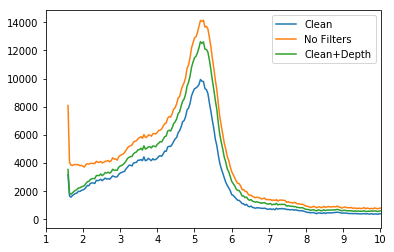

In [10]:

plt.plot(en, dtab['A']['det0']['epoch6']['spec'], label = 'Clean')
plt.plot(en, dtab2['A']['det0']['epoch6']['spec'], label = 'No Filters')
plt.plot(en, dtab3['A']['det0']['epoch6']['spec'], label = 'Clean+Depth')

plt.legend()

plt.xlim([1, 10])
plt.show()

In [17]:


def load_data4():
    # Returns the full mission data unbinned spectrum
    # set divided into epochs along with exposure.
    
    # Setup NuSTAR time epochs:
    launch_met=77241600. # 2012-06-13T00:00:00
    # Quaterly plots
    
    # Set up data structure:
    data_table = {'A':{}, 'B':{}}
    for mod in data_table:
        for det_id in range(4):
            det_key = 'det{}'.format(det_id)
            data_table[mod][det_key] = {}
    
    for ind, evtdir in enumerate(glob.glob('../scripts/reprocess_background/full_mission/*/')):
        for mod in ['A', 'B']:
            for file in glob.glob('{}/*{}_02.fits'.format(evtdir, mod)):
                print(file)
            # Skip these high background obsids
                if file.find("40101012") != -1:
                    continue

                if file.find("30161002002") != -1:
                    continue

                hdr= getheader(file, 1)
                epoch = np.float(hdr['TSTART'])
                dt_years = (epoch-launch_met) / 3.154e7 # years
                dt_quarter = dt_years
            # Change to per-quarter instead
                epoch_ind = np.int(np.floor(dt_quarter))
                if epoch_ind != 6:
                    continue
 
                e_key = 'epoch{}'.format(epoch_ind)

                evdata = getdata(file, 1)
                
                
                for det_id in range(4):
                    det_key = 'det{}'.format(det_id)
                    if e_key not in data_table[mod][det_key]:
                        data_table[mod][det_key][e_key] = {}
                        data_table[mod][det_key][e_key]['spec'] = np.zeros([4096])
                        data_table[mod][det_key][e_key]['exp'] = 0.

                    good_filter = ( (evdata['GRADE']==0) &
                               (evdata['DET_ID']==det_id) &
                               (evdata['LIMB_ANGLE'] < -2) & 
                               (evdata['STATUS']==0) & 
                               ( evdata['SUNSHINE'] == 0) )


                    inds = good_filter.nonzero()

                    ehist, edges = np.histogram(evdata['PI'][inds[0]], range = [0, 4096],
                                       bins=4096)

                    data_table[mod][det_key][e_key]['spec'] += ehist
                    data_table[mod][det_key][e_key]['exp'] +=np.float(hdr['EXPOSURE'])
    return data_table
    

In [18]:
dtab4 = load_data4()

../scripts/reprocess_background/full_mission/30102028005/30102028005A_02.fits
../scripts/reprocess_background/full_mission/30102028005/30102028005B_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001A_02.fits
../scripts/reprocess_background/full_mission/60366003001/60366003001B_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002A_02.fits
../scripts/reprocess_background/full_mission/30363003002/30363003002B_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035A_02.fits
../scripts/reprocess_background/full_mission/90401309035/90401309035B_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008A_02.fits
../scripts/reprocess_background/full_mission/80102011008/80102011008B_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001A_02.fits
../scripts/reprocess_background/full_mission/60021019001/60021019001B_02.fits
../scripts/reprocess_background/full_mission/60401026002/6040102

../scripts/reprocess_background/full_mission/30301009002/30301009002A_02.fits
../scripts/reprocess_background/full_mission/30301009002/30301009002B_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010A_02.fits
../scripts/reprocess_background/full_mission/80002013010/80002013010B_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002A_02.fits
../scripts/reprocess_background/full_mission/40031001002/40031001002B_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001A_02.fits
../scripts/reprocess_background/full_mission/40014003001/40014003001B_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003A_02.fits
../scripts/reprocess_background/full_mission/60101050003/60101050003B_02.fits
../scripts/reprocess_background/full_mission/60021114002/60021114002A_02.fits
../scripts/reprocess_background/full_mission/60021114002/60021114002B_02.fits
../scripts/reprocess_background/full_mission/60002032007/6000203

../scripts/reprocess_background/full_mission/60401016003/60401016003A_02.fits
../scripts/reprocess_background/full_mission/60401016003/60401016003B_02.fits
../scripts/reprocess_background/full_mission/60201023001/60201023001A_02.fits
../scripts/reprocess_background/full_mission/60201023001/60201023001B_02.fits
../scripts/reprocess_background/full_mission/30202022003/30202022003A_02.fits
../scripts/reprocess_background/full_mission/30202022003/30202022003B_02.fits
../scripts/reprocess_background/full_mission/60361014002/60361014002A_02.fits
../scripts/reprocess_background/full_mission/60361014002/60361014002B_02.fits
../scripts/reprocess_background/full_mission/60002032009/60002032009A_02.fits
../scripts/reprocess_background/full_mission/60002032009/60002032009B_02.fits
../scripts/reprocess_background/full_mission/30302023004/30302023004A_02.fits
../scripts/reprocess_background/full_mission/30302023004/30302023004B_02.fits
../scripts/reprocess_background/full_mission/50312002001/5031200

../scripts/reprocess_background/full_mission/80202027002/80202027002B_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001A_02.fits
../scripts/reprocess_background/full_mission/80302309001/80302309001B_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001A_02.fits
../scripts/reprocess_background/full_mission/60469006001/60469006001B_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002A_02.fits
../scripts/reprocess_background/full_mission/50101003002/50101003002B_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001A_02.fits
../scripts/reprocess_background/full_mission/60001148001/60001148001B_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002A_02.fits
../scripts/reprocess_background/full_mission/30460011002/30460011002B_02.fits
../scripts/reprocess_background/full_mission/30364004001/30364004001A_02.fits
../scripts/reprocess_background/full_mission/30364004001/3036400

../scripts/reprocess_background/full_mission/60001041004/60001041004A_02.fits
../scripts/reprocess_background/full_mission/60001041004/60001041004B_02.fits
../scripts/reprocess_background/full_mission/30002021031/30002021031A_02.fits
../scripts/reprocess_background/full_mission/30002021031/30002021031B_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002A_02.fits
../scripts/reprocess_background/full_mission/60023001002/60023001002B_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001A_02.fits
../scripts/reprocess_background/full_mission/40014013001/40014013001B_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002A_02.fits
../scripts/reprocess_background/full_mission/60021044002/60021044002B_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003A_02.fits
../scripts/reprocess_background/full_mission/70102001003/70102001003B_02.fits
../scripts/reprocess_background/full_mission/60374003002/6037400

../scripts/reprocess_background/full_mission/60401016002/60401016002B_02.fits
../scripts/reprocess_background/full_mission/90502015002/90502015002A_02.fits
../scripts/reprocess_background/full_mission/90502015002/90502015002B_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008A_02.fits
../scripts/reprocess_background/full_mission/60002032008/60002032008B_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004A_02.fits
../scripts/reprocess_background/full_mission/80202052004/80202052004B_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002A_02.fits
../scripts/reprocess_background/full_mission/30101036002/30101036002B_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001A_02.fits
../scripts/reprocess_background/full_mission/90401370001/90401370001B_02.fits
../scripts/reprocess_background/full_mission/60021001002/60021001002A_02.fits
../scripts/reprocess_background/full_mission/60021001002/6002100

../scripts/reprocess_background/full_mission/30460005002/30460005002A_02.fits
../scripts/reprocess_background/full_mission/30460005002/30460005002B_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002A_02.fits
../scripts/reprocess_background/full_mission/80402610002/80402610002B_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001A_02.fits
../scripts/reprocess_background/full_mission/60111031001/60111031001B_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001A_02.fits
../scripts/reprocess_background/full_mission/60061305001/60061305001B_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003A_02.fits
../scripts/reprocess_background/full_mission/30102028003/30102028003B_02.fits
../scripts/reprocess_background/full_mission/80201050001/80201050001A_02.fits
../scripts/reprocess_background/full_mission/80201050001/80201050001B_02.fits
../scripts/reprocess_background/full_mission/60202021005/6020202

../scripts/reprocess_background/full_mission/80201035001/80201035001A_02.fits
../scripts/reprocess_background/full_mission/80201035001/80201035001B_02.fits
../scripts/reprocess_background/full_mission/80102011009/80102011009A_02.fits
../scripts/reprocess_background/full_mission/80102011009/80102011009B_02.fits
../scripts/reprocess_background/full_mission/90401309034/90401309034A_02.fits
../scripts/reprocess_background/full_mission/90401309034/90401309034B_02.fits
../scripts/reprocess_background/full_mission/90101019002/90101019002A_02.fits
../scripts/reprocess_background/full_mission/90101019002/90101019002B_02.fits
../scripts/reprocess_background/full_mission/60061053001/60061053001A_02.fits
../scripts/reprocess_background/full_mission/60061053001/60061053001B_02.fits
../scripts/reprocess_background/full_mission/60061348002/60061348002A_02.fits
../scripts/reprocess_background/full_mission/60061348002/60061348002B_02.fits
../scripts/reprocess_background/full_mission/40112003001/4011200

../scripts/reprocess_background/full_mission/30401019001/30401019001B_02.fits
../scripts/reprocess_background/full_mission/60002047001/60002047001A_02.fits
../scripts/reprocess_background/full_mission/60002047001/60002047001B_02.fits
../scripts/reprocess_background/full_mission/60160175002/60160175002A_02.fits
../scripts/reprocess_background/full_mission/60160175002/60160175002B_02.fits
../scripts/reprocess_background/full_mission/60001135002/60001135002A_02.fits
../scripts/reprocess_background/full_mission/60001135002/60001135002B_02.fits
../scripts/reprocess_background/full_mission/70102001002/70102001002A_02.fits
../scripts/reprocess_background/full_mission/70102001002/70102001002B_02.fits
../scripts/reprocess_background/full_mission/60372002002/60372002002A_02.fits
../scripts/reprocess_background/full_mission/60372002002/60372002002B_02.fits
../scripts/reprocess_background/full_mission/90311036001/90311036001A_02.fits
../scripts/reprocess_background/full_mission/90311036001/9031103

../scripts/reprocess_background/full_mission/80202013003/80202013003B_02.fits
../scripts/reprocess_background/full_mission/60160571001/60160571001A_02.fits
../scripts/reprocess_background/full_mission/60160571001/60160571001B_02.fits
../scripts/reprocess_background/full_mission/80302309007/80302309007A_02.fits
../scripts/reprocess_background/full_mission/80302309007/80302309007B_02.fits
../scripts/reprocess_background/full_mission/60202001004/60202001004A_02.fits
../scripts/reprocess_background/full_mission/60202001004/60202001004B_02.fits
../scripts/reprocess_background/full_mission/30301001001/30301001001A_02.fits
../scripts/reprocess_background/full_mission/30301001001/30301001001B_02.fits
../scripts/reprocess_background/full_mission/30201034001/30201034001A_02.fits
../scripts/reprocess_background/full_mission/30201034001/30201034001B_02.fits
../scripts/reprocess_background/full_mission/60502035001/60502035001A_02.fits
../scripts/reprocess_background/full_mission/60502035001/6050203

../scripts/reprocess_background/full_mission/30001029019/30001029019B_02.fits
../scripts/reprocess_background/full_mission/30102054001/30102054001A_02.fits
../scripts/reprocess_background/full_mission/30102054001/30102054001B_02.fits
../scripts/reprocess_background/full_mission/60501016002/60501016002A_02.fits
../scripts/reprocess_background/full_mission/60501016002/60501016002B_02.fits
../scripts/reprocess_background/full_mission/60401023002/60401023002A_02.fits
../scripts/reprocess_background/full_mission/60401023002/60401023002B_02.fits
../scripts/reprocess_background/full_mission/60023008001/60023008001A_02.fits
../scripts/reprocess_background/full_mission/60023008001/60023008001B_02.fits
../scripts/reprocess_background/full_mission/50002043010/50002043010A_02.fits
../scripts/reprocess_background/full_mission/50002043010/50002043010B_02.fits
../scripts/reprocess_background/full_mission/30302016005/30302016005A_02.fits
../scripts/reprocess_background/full_mission/30302016005/3030201

../scripts/reprocess_background/full_mission/60001064002/60001064002A_02.fits
../scripts/reprocess_background/full_mission/60001064002/60001064002B_02.fits
../scripts/reprocess_background/full_mission/50026001001/50026001001A_02.fits
../scripts/reprocess_background/full_mission/50026001001/50026001001B_02.fits
../scripts/reprocess_background/full_mission/30402026001/30402026001A_02.fits
../scripts/reprocess_background/full_mission/30402026001/30402026001B_02.fits
../scripts/reprocess_background/full_mission/60061361001/60061361001A_02.fits
../scripts/reprocess_background/full_mission/60061361001/60061361001B_02.fits
../scripts/reprocess_background/full_mission/60201012001/60201012001A_02.fits
../scripts/reprocess_background/full_mission/60201012001/60201012001B_02.fits
../scripts/reprocess_background/full_mission/30202027004/30202027004A_02.fits
../scripts/reprocess_background/full_mission/30202027004/30202027004B_02.fits
../scripts/reprocess_background/full_mission/30302012004/3030201

../scripts/reprocess_background/full_mission/60002023001/60002023001A_02.fits
../scripts/reprocess_background/full_mission/60002023001/60002023001B_02.fits
../scripts/reprocess_background/full_mission/90101020001/90101020001A_02.fits
../scripts/reprocess_background/full_mission/90101020001/90101020001B_02.fits
../scripts/reprocess_background/full_mission/80302310002/80302310002A_02.fits
../scripts/reprocess_background/full_mission/80302310002/80302310002B_02.fits
../scripts/reprocess_background/full_mission/90313017001/90313017001A_02.fits
../scripts/reprocess_background/full_mission/90313017001/90313017001B_02.fits
../scripts/reprocess_background/full_mission/60061308002/60061308002A_02.fits
../scripts/reprocess_background/full_mission/60061308002/60061308002B_02.fits
../scripts/reprocess_background/full_mission/60001100002/60001100002A_02.fits
../scripts/reprocess_background/full_mission/60001100002/60001100002B_02.fits
../scripts/reprocess_background/full_mission/80001037002/8000103

../scripts/reprocess_background/full_mission/80401316003/80401316003B_02.fits
../scripts/reprocess_background/full_mission/60002023006/60002023006A_02.fits
../scripts/reprocess_background/full_mission/60002023006/60002023006B_02.fits
../scripts/reprocess_background/full_mission/30002150007/30002150007A_02.fits
../scripts/reprocess_background/full_mission/30002150007/30002150007B_02.fits
../scripts/reprocess_background/full_mission/60160125002/60160125002A_02.fits
../scripts/reprocess_background/full_mission/60160125002/60160125002B_02.fits
../scripts/reprocess_background/full_mission/30364001001/30364001001A_02.fits
../scripts/reprocess_background/full_mission/30364001001/30364001001B_02.fits
../scripts/reprocess_background/full_mission/30302002003/30302002003A_02.fits
../scripts/reprocess_background/full_mission/30302002003/30302002003B_02.fits
../scripts/reprocess_background/full_mission/60101069001/60101069001A_02.fits
../scripts/reprocess_background/full_mission/60101069001/6010106

../scripts/reprocess_background/full_mission/80202012004/80202012004A_02.fits
../scripts/reprocess_background/full_mission/80202012004/80202012004B_02.fits
../scripts/reprocess_background/full_mission/60021038001/60021038001A_02.fits
../scripts/reprocess_background/full_mission/60021038001/60021038001B_02.fits
../scripts/reprocess_background/full_mission/80202006003/80202006003A_02.fits
../scripts/reprocess_background/full_mission/80202006003/80202006003B_02.fits
../scripts/reprocess_background/full_mission/30363002002/30363002002A_02.fits
../scripts/reprocess_background/full_mission/30363002002/30363002002B_02.fits
../scripts/reprocess_background/full_mission/60366002001/60366002001A_02.fits
../scripts/reprocess_background/full_mission/60366002001/60366002001B_02.fits
../scripts/reprocess_background/full_mission/60021018001/60021018001A_02.fits
../scripts/reprocess_background/full_mission/60021018001/60021018001B_02.fits
../scripts/reprocess_background/full_mission/30001029011/3000102

../scripts/reprocess_background/full_mission/30001146002/30001146002B_02.fits
../scripts/reprocess_background/full_mission/90102002004/90102002004A_02.fits
../scripts/reprocess_background/full_mission/90102002004/90102002004B_02.fits
../scripts/reprocess_background/full_mission/30001029029/30001029029A_02.fits
../scripts/reprocess_background/full_mission/30001029029/30001029029B_02.fits
../scripts/reprocess_background/full_mission/60061091006/60061091006A_02.fits
../scripts/reprocess_background/full_mission/60061091006/60061091006B_02.fits
../scripts/reprocess_background/full_mission/60360007001/60360007001A_02.fits
../scripts/reprocess_background/full_mission/60360007001/60360007001B_02.fits
../scripts/reprocess_background/full_mission/60466006002/60466006002A_02.fits
../scripts/reprocess_background/full_mission/60466006002/60466006002B_02.fits
../scripts/reprocess_background/full_mission/70301001002/70301001002A_02.fits
../scripts/reprocess_background/full_mission/70301001002/7030100

../scripts/reprocess_background/full_mission/90301320002/90301320002A_02.fits
../scripts/reprocess_background/full_mission/90301320002/90301320002B_02.fits
../scripts/reprocess_background/full_mission/60001114005/60001114005A_02.fits
../scripts/reprocess_background/full_mission/60001114005/60001114005B_02.fits
../scripts/reprocess_background/full_mission/60061239002/60061239002A_02.fits
../scripts/reprocess_background/full_mission/60061239002/60061239002B_02.fits
../scripts/reprocess_background/full_mission/90311023001/90311023001A_02.fits
../scripts/reprocess_background/full_mission/90311023001/90311023001B_02.fits
../scripts/reprocess_background/full_mission/60101055002/60101055002A_02.fits
../scripts/reprocess_background/full_mission/60101055002/60101055002B_02.fits
../scripts/reprocess_background/full_mission/30001029018/30001029018A_02.fits
../scripts/reprocess_background/full_mission/30001029018/30001029018B_02.fits
../scripts/reprocess_background/full_mission/80102101001/8010210

../scripts/reprocess_background/full_mission/60502004008/60502004008A_02.fits
../scripts/reprocess_background/full_mission/60502004008/60502004008B_02.fits
../scripts/reprocess_background/full_mission/90313013001/90313013001A_02.fits
../scripts/reprocess_background/full_mission/90313013001/90313013001B_02.fits
../scripts/reprocess_background/full_mission/90102016002/90102016002A_02.fits
../scripts/reprocess_background/full_mission/90102016002/90102016002B_02.fits
../scripts/reprocess_background/full_mission/80416208001/80416208001A_02.fits
../scripts/reprocess_background/full_mission/80416208001/80416208001B_02.fits
../scripts/reprocess_background/full_mission/60101020002/60101020002A_02.fits
../scripts/reprocess_background/full_mission/60101020002/60101020002B_02.fits
../scripts/reprocess_background/full_mission/40001015006/40001015006A_02.fits
../scripts/reprocess_background/full_mission/40001015006/40001015006B_02.fits
../scripts/reprocess_background/full_mission/60111041001/6011104

../scripts/reprocess_background/full_mission/90502307002/90502307002B_02.fits
../scripts/reprocess_background/full_mission/40014026001/40014026001A_02.fits
../scripts/reprocess_background/full_mission/40014026001/40014026001B_02.fits
../scripts/reprocess_background/full_mission/60101041004/60101041004A_02.fits
../scripts/reprocess_background/full_mission/60101041004/60101041004B_02.fits
../scripts/reprocess_background/full_mission/60001149008/60001149008A_02.fits
../scripts/reprocess_background/full_mission/60001149008/60001149008B_02.fits
../scripts/reprocess_background/full_mission/60160707001/60160707001A_02.fits
../scripts/reprocess_background/full_mission/60160707001/60160707001B_02.fits
../scripts/reprocess_background/full_mission/30002150001/30002150001A_02.fits
../scripts/reprocess_background/full_mission/30002150001/30002150001B_02.fits
../scripts/reprocess_background/full_mission/40401003001/40401003001A_02.fits
../scripts/reprocess_background/full_mission/40401003001/4040100

../scripts/reprocess_background/full_mission/90311028001/90311028001A_02.fits
../scripts/reprocess_background/full_mission/90311028001/90311028001B_02.fits
../scripts/reprocess_background/full_mission/60061232002/60061232002A_02.fits
../scripts/reprocess_background/full_mission/60061232002/60061232002B_02.fits
../scripts/reprocess_background/full_mission/30401007001/30401007001A_02.fits
../scripts/reprocess_background/full_mission/30401007001/30401007001B_02.fits
../scripts/reprocess_background/full_mission/60302006001/60302006001A_02.fits
../scripts/reprocess_background/full_mission/60302006001/60302006001B_02.fits
../scripts/reprocess_background/full_mission/60402006003/60402006003A_02.fits
../scripts/reprocess_background/full_mission/60402006003/60402006003B_02.fits
../scripts/reprocess_background/full_mission/90302319001/90302319001A_02.fits
../scripts/reprocess_background/full_mission/90302319001/90302319001B_02.fits
../scripts/reprocess_background/full_mission/30001011008/3000101

../scripts/reprocess_background/full_mission/60501031006/60501031006B_02.fits
../scripts/reprocess_background/full_mission/60110001007/60110001007A_02.fits
../scripts/reprocess_background/full_mission/60110001007/60110001007B_02.fits
../scripts/reprocess_background/full_mission/40014009001/40014009001A_02.fits
../scripts/reprocess_background/full_mission/40014009001/40014009001B_02.fits
../scripts/reprocess_background/full_mission/30402031003/30402031003A_02.fits
../scripts/reprocess_background/full_mission/30402031003/30402031003B_02.fits
../scripts/reprocess_background/full_mission/60021085001/60021085001A_02.fits
../scripts/reprocess_background/full_mission/60021085001/60021085001B_02.fits
../scripts/reprocess_background/full_mission/60366015002/60366015002A_02.fits
../scripts/reprocess_background/full_mission/60366015002/60366015002B_02.fits
../scripts/reprocess_background/full_mission/60501054001/60501054001A_02.fits
../scripts/reprocess_background/full_mission/60501054001/6050105

../scripts/reprocess_background/full_mission/40014019001/40014019001A_02.fits
../scripts/reprocess_background/full_mission/40014019001/40014019001B_02.fits
../scripts/reprocess_background/full_mission/30502014003/30502014003A_02.fits
../scripts/reprocess_background/full_mission/30502014003/30502014003B_02.fits
../scripts/reprocess_background/full_mission/60463067002/60463067002A_02.fits
../scripts/reprocess_background/full_mission/60463067002/60463067002B_02.fits
../scripts/reprocess_background/full_mission/40410002002/40410002002A_02.fits
../scripts/reprocess_background/full_mission/40410002002/40410002002B_02.fits
../scripts/reprocess_background/full_mission/60374009002/60374009002A_02.fits
../scripts/reprocess_background/full_mission/60374009002/60374009002B_02.fits
../scripts/reprocess_background/full_mission/30201026002/30201026002A_02.fits
../scripts/reprocess_background/full_mission/30201026002/30201026002B_02.fits
../scripts/reprocess_background/full_mission/30301013002/3030101

../scripts/reprocess_background/full_mission/60160382001/60160382001A_02.fits
../scripts/reprocess_background/full_mission/60160382001/60160382001B_02.fits
../scripts/reprocess_background/full_mission/90301008002/90301008002A_02.fits
../scripts/reprocess_background/full_mission/90301008002/90301008002B_02.fits
../scripts/reprocess_background/full_mission/60061280002/60061280002A_02.fits
../scripts/reprocess_background/full_mission/60061280002/60061280002B_02.fits
../scripts/reprocess_background/full_mission/90401327004/90401327004A_02.fits
../scripts/reprocess_background/full_mission/90401327004/90401327004B_02.fits
../scripts/reprocess_background/full_mission/60001113001/60001113001A_02.fits
../scripts/reprocess_background/full_mission/60001113001/60001113001B_02.fits
../scripts/reprocess_background/full_mission/60466001001/60466001001A_02.fits
../scripts/reprocess_background/full_mission/60466001001/60466001001B_02.fits
../scripts/reprocess_background/full_mission/60160371001/6016037

../scripts/reprocess_background/full_mission/60466001006/60466001006B_02.fits
../scripts/reprocess_background/full_mission/80416203001/80416203001A_02.fits
../scripts/reprocess_background/full_mission/80416203001/80416203001B_02.fits
../scripts/reprocess_background/full_mission/90313018001/90313018001A_02.fits
../scripts/reprocess_background/full_mission/90313018001/90313018001B_02.fits
../scripts/reprocess_background/full_mission/90201050001/90201050001A_02.fits
../scripts/reprocess_background/full_mission/90201050001/90201050001B_02.fits
../scripts/reprocess_background/full_mission/60061267002/60061267002A_02.fits
../scripts/reprocess_background/full_mission/60061267002/60061267002B_02.fits
../scripts/reprocess_background/full_mission/60201054002/60201054002A_02.fits
../scripts/reprocess_background/full_mission/60201054002/60201054002B_02.fits
../scripts/reprocess_background/full_mission/60061327002/60061327002A_02.fits
../scripts/reprocess_background/full_mission/60061327002/6006132

../scripts/reprocess_background/full_mission/60401018004/60401018004B_02.fits
../scripts/reprocess_background/full_mission/60201019001/60201019001A_02.fits
../scripts/reprocess_background/full_mission/60201019001/60201019001B_02.fits
../scripts/reprocess_background/full_mission/60061071002/60061071002A_02.fits
../scripts/reprocess_background/full_mission/60061071002/60061071002B_02.fits
../scripts/reprocess_background/full_mission/60101046001/60101046001A_02.fits
../scripts/reprocess_background/full_mission/60101046001/60101046001B_02.fits
../scripts/reprocess_background/full_mission/80001004001/80001004001A_02.fits
../scripts/reprocess_background/full_mission/80001004001/80001004001B_02.fits
../scripts/reprocess_background/full_mission/60360008001/60360008001A_02.fits
../scripts/reprocess_background/full_mission/60360008001/60360008001B_02.fits
../scripts/reprocess_background/full_mission/40302002002/40302002002A_02.fits
../scripts/reprocess_background/full_mission/40302002002/4030200

../scripts/reprocess_background/full_mission/60376005001/60376005001A_02.fits
../scripts/reprocess_background/full_mission/60376005001/60376005001B_02.fits
../scripts/reprocess_background/full_mission/60021056001/60021056001A_02.fits
../scripts/reprocess_background/full_mission/60021056001/60021056001B_02.fits
../scripts/reprocess_background/full_mission/60161497001/60161497001A_02.fits
../scripts/reprocess_background/full_mission/60161497001/60161497001B_02.fits
../scripts/reprocess_background/full_mission/90501312002/90501312002A_02.fits
../scripts/reprocess_background/full_mission/90501312002/90501312002B_02.fits
../scripts/reprocess_background/full_mission/90401327002/90401327002A_02.fits
../scripts/reprocess_background/full_mission/90401327002/90401327002B_02.fits
../scripts/reprocess_background/full_mission/40031003001/40031003001A_02.fits
../scripts/reprocess_background/full_mission/40031003001/40031003001B_02.fits
../scripts/reprocess_background/full_mission/60006011002/6000601

../scripts/reprocess_background/full_mission/80301301002/80301301002B_02.fits
../scripts/reprocess_background/full_mission/90101003002/90101003002A_02.fits
../scripts/reprocess_background/full_mission/90101003002/90101003002B_02.fits
../scripts/reprocess_background/full_mission/60160072001/60160072001A_02.fits
../scripts/reprocess_background/full_mission/60160072001/60160072001B_02.fits
../scripts/reprocess_background/full_mission/60061030002/60061030002A_02.fits
../scripts/reprocess_background/full_mission/60061030002/60061030002B_02.fits
../scripts/reprocess_background/full_mission/90002004001/90002004001A_02.fits
../scripts/reprocess_background/full_mission/90002004001/90002004001B_02.fits
../scripts/reprocess_background/full_mission/80001014001/80001014001A_02.fits
../scripts/reprocess_background/full_mission/80001014001/80001014001B_02.fits
../scripts/reprocess_background/full_mission/60001123001/60001123001A_02.fits
../scripts/reprocess_background/full_mission/60001123001/6000112

../scripts/reprocess_background/full_mission/30401013001/30401013001B_02.fits
../scripts/reprocess_background/full_mission/30401020011/30401020011A_02.fits
../scripts/reprocess_background/full_mission/30401020011/30401020011B_02.fits
../scripts/reprocess_background/full_mission/60061226002/60061226002A_02.fits
../scripts/reprocess_background/full_mission/60061226002/60061226002B_02.fits
../scripts/reprocess_background/full_mission/60161299001/60161299001A_02.fits
../scripts/reprocess_background/full_mission/60161299001/60161299001B_02.fits
../scripts/reprocess_background/full_mission/60061337002/60061337002A_02.fits
../scripts/reprocess_background/full_mission/60061337002/60061337002B_02.fits
../scripts/reprocess_background/full_mission/60201044002/60201044002A_02.fits
../scripts/reprocess_background/full_mission/60201044002/60201044002B_02.fits
../scripts/reprocess_background/full_mission/90313028001/90313028001A_02.fits
../scripts/reprocess_background/full_mission/90313028001/9031302

../scripts/reprocess_background/full_mission/30501003001/30501003001B_02.fits
../scripts/reprocess_background/full_mission/90361003002/90361003002A_02.fits
../scripts/reprocess_background/full_mission/90361003002/90361003002B_02.fits
../scripts/reprocess_background/full_mission/30401036001/30401036001A_02.fits
../scripts/reprocess_background/full_mission/30401036001/30401036001B_02.fits
../scripts/reprocess_background/full_mission/60260014002/60260014002A_02.fits
../scripts/reprocess_background/full_mission/60260014002/60260014002B_02.fits
../scripts/reprocess_background/full_mission/60061312002/60061312002A_02.fits
../scripts/reprocess_background/full_mission/60061312002/60061312002B_02.fits
../scripts/reprocess_background/full_mission/60061083002/60061083002A_02.fits
../scripts/reprocess_background/full_mission/60061083002/60061083002B_02.fits
../scripts/reprocess_background/full_mission/60061009001/60061009001A_02.fits
../scripts/reprocess_background/full_mission/60061009001/6006100

../scripts/reprocess_background/full_mission/30402034004/30402034004B_02.fits
../scripts/reprocess_background/full_mission/60160599001/60160599001A_02.fits
../scripts/reprocess_background/full_mission/60160599001/60160599001B_02.fits
../scripts/reprocess_background/full_mission/30362002002/30362002002A_02.fits
../scripts/reprocess_background/full_mission/30362002002/30362002002B_02.fits
../scripts/reprocess_background/full_mission/60401001001/60401001001A_02.fits
../scripts/reprocess_background/full_mission/60401001001/60401001001B_02.fits
../scripts/reprocess_background/full_mission/90502319002/90502319002A_02.fits
../scripts/reprocess_background/full_mission/90502319002/90502319002B_02.fits
../scripts/reprocess_background/full_mission/30202035001/30202035001A_02.fits
../scripts/reprocess_background/full_mission/30202035001/30202035001B_02.fits
../scripts/reprocess_background/full_mission/40032008001/40032008001A_02.fits
../scripts/reprocess_background/full_mission/40032008001/4003200

../scripts/reprocess_background/full_mission/90401312002/90401312002A_02.fits
../scripts/reprocess_background/full_mission/90401312002/90401312002B_02.fits
../scripts/reprocess_background/full_mission/60021063001/60021063001A_02.fits
../scripts/reprocess_background/full_mission/60021063001/60021063001B_02.fits
../scripts/reprocess_background/full_mission/30002021046/30002021046A_02.fits
../scripts/reprocess_background/full_mission/30002021046/30002021046B_02.fits
../scripts/reprocess_background/full_mission/40032004002/40032004002A_02.fits
../scripts/reprocess_background/full_mission/40032004002/40032004002B_02.fits
../scripts/reprocess_background/full_mission/30102037002/30102037002A_02.fits
../scripts/reprocess_background/full_mission/30102037002/30102037002B_02.fits
../scripts/reprocess_background/full_mission/90411100001/90411100001A_02.fits
../scripts/reprocess_background/full_mission/90411100001/90411100001B_02.fits
../scripts/reprocess_background/full_mission/30002002002/3000200

../scripts/reprocess_background/full_mission/40101006002/40101006002A_02.fits
../scripts/reprocess_background/full_mission/40101006002/40101006002B_02.fits
../scripts/reprocess_background/full_mission/60466004001/60466004001A_02.fits
../scripts/reprocess_background/full_mission/60466004001/60466004001B_02.fits
../scripts/reprocess_background/full_mission/70301003001/70301003001A_02.fits
../scripts/reprocess_background/full_mission/70301003001/70301003001B_02.fits
../scripts/reprocess_background/full_mission/60111002002/60111002002A_02.fits
../scripts/reprocess_background/full_mission/60111002002/60111002002B_02.fits
../scripts/reprocess_background/full_mission/60360005002/60360005002A_02.fits
../scripts/reprocess_background/full_mission/60360005002/60360005002B_02.fits
../scripts/reprocess_background/full_mission/60061336002/60061336002A_02.fits
../scripts/reprocess_background/full_mission/60061336002/60061336002B_02.fits
../scripts/reprocess_background/full_mission/90313029001/9031302

../scripts/reprocess_background/full_mission/30460022001/30460022001B_02.fits
../scripts/reprocess_background/full_mission/60201051002/60201051002A_02.fits
../scripts/reprocess_background/full_mission/60201051002/60201051002B_02.fits
../scripts/reprocess_background/full_mission/60061322002/60061322002A_02.fits
../scripts/reprocess_background/full_mission/60061322002/60061322002B_02.fits
../scripts/reprocess_background/full_mission/60061039001/60061039001A_02.fits
../scripts/reprocess_background/full_mission/60061039001/60061039001B_02.fits
../scripts/reprocess_background/full_mission/80402015004/80402015004A_02.fits
../scripts/reprocess_background/full_mission/80402015004/80402015004B_02.fits
../scripts/reprocess_background/full_mission/60101084001/60101084001A_02.fits
../scripts/reprocess_background/full_mission/60101084001/60101084001B_02.fits
../scripts/reprocess_background/full_mission/80202014001/80202014001A_02.fits
../scripts/reprocess_background/full_mission/80202014001/8020201

../scripts/reprocess_background/full_mission/60202002007/60202002007B_02.fits
../scripts/reprocess_background/full_mission/90361003004/90361003004A_02.fits
../scripts/reprocess_background/full_mission/90361003004/90361003004B_02.fits
../scripts/reprocess_background/full_mission/40021012002/40021012002A_02.fits
../scripts/reprocess_background/full_mission/40021012002/40021012002B_02.fits
../scripts/reprocess_background/full_mission/60301031003/60301031003A_02.fits
../scripts/reprocess_background/full_mission/60301031003/60301031003B_02.fits
../scripts/reprocess_background/full_mission/60401031001/60401031001A_02.fits
../scripts/reprocess_background/full_mission/60401031001/60401031001B_02.fits
../scripts/reprocess_background/full_mission/80002095004/80002095004A_02.fits
../scripts/reprocess_background/full_mission/80002095004/80002095004B_02.fits
../scripts/reprocess_background/full_mission/30502005003/30502005003A_02.fits
../scripts/reprocess_background/full_mission/30502005003/3050200

../scripts/reprocess_background/full_mission/60021094001/60021094001B_02.fits
../scripts/reprocess_background/full_mission/60463037002/60463037002A_02.fits
../scripts/reprocess_background/full_mission/60463037002/60463037002B_02.fits
../scripts/reprocess_background/full_mission/90401309021/90401309021A_02.fits
../scripts/reprocess_background/full_mission/90401309021/90401309021B_02.fits
../scripts/reprocess_background/full_mission/40014018001/40014018001A_02.fits
../scripts/reprocess_background/full_mission/40014018001/40014018001B_02.fits
../scripts/reprocess_background/full_mission/30302020001/30302020001A_02.fits
../scripts/reprocess_background/full_mission/30302020001/30302020001B_02.fits
../scripts/reprocess_background/full_mission/30502015003/30502015003A_02.fits
../scripts/reprocess_background/full_mission/30502015003/30502015003B_02.fits
../scripts/reprocess_background/full_mission/60201014003/60201014003A_02.fits
../scripts/reprocess_background/full_mission/60201014003/6020101

../scripts/reprocess_background/full_mission/50110002006/50110002006B_02.fits
../scripts/reprocess_background/full_mission/60002060002/60002060002A_02.fits
../scripts/reprocess_background/full_mission/60002060002/60002060002B_02.fits
../scripts/reprocess_background/full_mission/90301009002/90301009002A_02.fits
../scripts/reprocess_background/full_mission/90301009002/90301009002B_02.fits
../scripts/reprocess_background/full_mission/60160152001/60160152001A_02.fits
../scripts/reprocess_background/full_mission/60160152001/60160152001B_02.fits
../scripts/reprocess_background/full_mission/60061332002/60061332002A_02.fits
../scripts/reprocess_background/full_mission/60061332002/60061332002B_02.fits
../scripts/reprocess_background/full_mission/60201041002/60201041002A_02.fits
../scripts/reprocess_background/full_mission/60201041002/60201041002B_02.fits
../scripts/reprocess_background/full_mission/30365001001/30365001001A_02.fits
../scripts/reprocess_background/full_mission/30365001001/3036500

../scripts/reprocess_background/full_mission/30401029002/30401029002B_02.fits
../scripts/reprocess_background/full_mission/30102038008/30102038008A_02.fits
../scripts/reprocess_background/full_mission/30102038008/30102038008B_02.fits
../scripts/reprocess_background/full_mission/80001032001/80001032001A_02.fits
../scripts/reprocess_background/full_mission/80001032001/80001032001B_02.fits
../scripts/reprocess_background/full_mission/60361018002/60361018002A_02.fits
../scripts/reprocess_background/full_mission/60361018002/60361018002B_02.fits
../scripts/reprocess_background/full_mission/60001045001/60001045001A_02.fits
../scripts/reprocess_background/full_mission/60001045001/60001045001B_02.fits
../scripts/reprocess_background/full_mission/60160285001/60160285001A_02.fits
../scripts/reprocess_background/full_mission/60160285001/60160285001B_02.fits
../scripts/reprocess_background/full_mission/90001010002/90001010002A_02.fits
../scripts/reprocess_background/full_mission/90001010002/9000101

../scripts/reprocess_background/full_mission/30002040002/30002040002B_02.fits
../scripts/reprocess_background/full_mission/30002021035/30002021035A_02.fits
../scripts/reprocess_background/full_mission/30002021035/30002021035B_02.fits
../scripts/reprocess_background/full_mission/30102041005/30102041005A_02.fits
../scripts/reprocess_background/full_mission/30102041005/30102041005B_02.fits
../scripts/reprocess_background/full_mission/60160617002/60160617002A_02.fits
../scripts/reprocess_background/full_mission/60160617002/60160617002B_02.fits
../scripts/reprocess_background/full_mission/60160586002/60160586002A_02.fits
../scripts/reprocess_background/full_mission/60160586002/60160586002B_02.fits
../scripts/reprocess_background/full_mission/60023001006/60023001006A_02.fits
../scripts/reprocess_background/full_mission/60023001006/60023001006B_02.fits
../scripts/reprocess_background/full_mission/60202048003/60202048003A_02.fits
../scripts/reprocess_background/full_mission/60202048003/6020204

../scripts/reprocess_background/full_mission/50002041003/50002041003B_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001A_02.fits
../scripts/reprocess_background/full_mission/60401012001/60401012001B_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003A_02.fits
../scripts/reprocess_background/full_mission/60061354003/60061354003B_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031A_02.fits
../scripts/reprocess_background/full_mission/90401309031/90401309031B_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001A_02.fits
../scripts/reprocess_background/full_mission/60365005001/60365005001B_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001A_02.fits
../scripts/reprocess_background/full_mission/80501001001/80501001001B_02.fits
../scripts/reprocess_background/full_mission/60161526001/60161526001A_02.fits
../scripts/reprocess_background/full_mission/60161526001/6016152

../scripts/reprocess_background/full_mission/60463049001/60463049001A_02.fits
../scripts/reprocess_background/full_mission/60463049001/60463049001B_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001A_02.fits
../scripts/reprocess_background/full_mission/60021060001/60021060001B_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002A_02.fits
../scripts/reprocess_background/full_mission/60001109002/60001109002B_02.fits
../scripts/reprocess_background/full_mission/30401025001/30401025001A_02.fits
../scripts/reprocess_background/full_mission/30401025001/30401025001B_02.fits
../scripts/reprocess_background/full_mission/60362026002/60362026002A_02.fits
../scripts/reprocess_background/full_mission/60362026002/60362026002B_02.fits
../scripts/reprocess_background/full_mission/90301012001/90301012001A_02.fits
../scripts/reprocess_background/full_mission/90301012001/90301012001B_02.fits
../scripts/reprocess_background/full_mission/90201027001/9020102

../scripts/reprocess_background/full_mission/90102007001/90102007001B_02.fits
../scripts/reprocess_background/full_mission/80502304004/80502304004A_02.fits
../scripts/reprocess_background/full_mission/80502304004/80502304004B_02.fits
../scripts/reprocess_background/full_mission/80302305001/80302305001A_02.fits
../scripts/reprocess_background/full_mission/80302305001/80302305001B_02.fits
../scripts/reprocess_background/full_mission/80002013025/80002013025A_02.fits
../scripts/reprocess_background/full_mission/80002013025/80002013025B_02.fits
../scripts/reprocess_background/full_mission/80406201002/80406201002A_02.fits
../scripts/reprocess_background/full_mission/80406201002/80406201002B_02.fits
../scripts/reprocess_background/full_mission/60022007003/60022007003A_02.fits
../scripts/reprocess_background/full_mission/60022007003/60022007003B_02.fits
../scripts/reprocess_background/full_mission/60002036002/60002036002A_02.fits
../scripts/reprocess_background/full_mission/60002036002/6000203

../scripts/reprocess_background/full_mission/60061249001/60061249001A_02.fits
../scripts/reprocess_background/full_mission/60061249001/60061249001B_02.fits
../scripts/reprocess_background/full_mission/90101021002/90101021002A_02.fits
../scripts/reprocess_background/full_mission/90101021002/90101021002B_02.fits
../scripts/reprocess_background/full_mission/60002022002/60002022002A_02.fits
../scripts/reprocess_background/full_mission/60002022002/60002022002B_02.fits
../scripts/reprocess_background/full_mission/60202048002/60202048002A_02.fits
../scripts/reprocess_background/full_mission/60202048002/60202048002B_02.fits
../scripts/reprocess_background/full_mission/80302311001/80302311001A_02.fits
../scripts/reprocess_background/full_mission/80302311001/80302311001B_02.fits
../scripts/reprocess_background/full_mission/60061098001/60061098001A_02.fits
../scripts/reprocess_background/full_mission/60061098001/60061098001B_02.fits
../scripts/reprocess_background/full_mission/60061012002/6006101

../scripts/reprocess_background/full_mission/80402315005/80402315005B_02.fits
../scripts/reprocess_background/full_mission/60021011001/60021011001A_02.fits
../scripts/reprocess_background/full_mission/60021011001/60021011001B_02.fits
../scripts/reprocess_background/full_mission/30001027006/30001027006A_02.fits
../scripts/reprocess_background/full_mission/30001027006/30001027006B_02.fits
../scripts/reprocess_background/full_mission/30101026001/30101026001A_02.fits
../scripts/reprocess_background/full_mission/30101026001/30101026001B_02.fits
../scripts/reprocess_background/full_mission/30202032001/30202032001A_02.fits
../scripts/reprocess_background/full_mission/30202032001/30202032001B_02.fits
../scripts/reprocess_background/full_mission/30302007001/30302007001A_02.fits
../scripts/reprocess_background/full_mission/30302007001/30302007001B_02.fits
../scripts/reprocess_background/full_mission/90202031004/90202031004A_02.fits
../scripts/reprocess_background/full_mission/90202031004/9020203

../scripts/reprocess_background/full_mission/90401309039/90401309039A_02.fits
../scripts/reprocess_background/full_mission/90401309039/90401309039B_02.fits
../scripts/reprocess_background/full_mission/40014033002/40014033002A_02.fits
../scripts/reprocess_background/full_mission/40014033002/40014033002B_02.fits
../scripts/reprocess_background/full_mission/80102011004/80102011004A_02.fits
../scripts/reprocess_background/full_mission/80102011004/80102011004B_02.fits
../scripts/reprocess_background/full_mission/60160840002/60160840002A_02.fits
../scripts/reprocess_background/full_mission/60160840002/60160840002B_02.fits
../scripts/reprocess_background/full_mission/60021064001/60021064001A_02.fits
../scripts/reprocess_background/full_mission/60021064001/60021064001B_02.fits
../scripts/reprocess_background/full_mission/90501320002/90501320002A_02.fits
../scripts/reprocess_background/full_mission/90501320002/90501320002B_02.fits
../scripts/reprocess_background/full_mission/60160458001/6016045

../scripts/reprocess_background/full_mission/30401015001/30401015001A_02.fits
../scripts/reprocess_background/full_mission/30401015001/30401015001B_02.fits
../scripts/reprocess_background/full_mission/80201050005/80201050005A_02.fits
../scripts/reprocess_background/full_mission/80201050005/80201050005B_02.fits
../scripts/reprocess_background/full_mission/60202021001/60202021001A_02.fits
../scripts/reprocess_background/full_mission/60202021001/60202021001B_02.fits
../scripts/reprocess_background/full_mission/90201017001/90201017001A_02.fits
../scripts/reprocess_background/full_mission/90201017001/90201017001B_02.fits
../scripts/reprocess_background/full_mission/60160179002/60160179002A_02.fits
../scripts/reprocess_background/full_mission/60160179002/60160179002B_02.fits
../scripts/reprocess_background/full_mission/60202015006/60202015006A_02.fits
../scripts/reprocess_background/full_mission/60202015006/60202015006B_02.fits
../scripts/reprocess_background/full_mission/80001084001/8000108

../scripts/reprocess_background/full_mission/50002041002/50002041002A_02.fits
../scripts/reprocess_background/full_mission/50002041002/50002041002B_02.fits
../scripts/reprocess_background/full_mission/60201027002/60201027002A_02.fits
../scripts/reprocess_background/full_mission/60201027002/60201027002B_02.fits
../scripts/reprocess_background/full_mission/60160087001/60160087001A_02.fits
../scripts/reprocess_background/full_mission/60160087001/60160087001B_02.fits
../scripts/reprocess_background/full_mission/80001043001/80001043001A_02.fits
../scripts/reprocess_background/full_mission/80001043001/80001043001B_02.fits
../scripts/reprocess_background/full_mission/60002032005/60002032005A_02.fits
../scripts/reprocess_background/full_mission/60002032005/60002032005B_02.fits
../scripts/reprocess_background/full_mission/80301307002/80301307002A_02.fits
../scripts/reprocess_background/full_mission/80301307002/80301307002B_02.fits
../scripts/reprocess_background/full_mission/80102104002/8010210

../scripts/reprocess_background/full_mission/60202061006/60202061006B_02.fits
../scripts/reprocess_background/full_mission/60061254002/60061254002A_02.fits
../scripts/reprocess_background/full_mission/60061254002/60061254002B_02.fits
../scripts/reprocess_background/full_mission/80201010002/80201010002A_02.fits
../scripts/reprocess_background/full_mission/80201010002/80201010002B_02.fits
../scripts/reprocess_background/full_mission/50310003002/50310003002A_02.fits
../scripts/reprocess_background/full_mission/50310003002/50310003002B_02.fits
../scripts/reprocess_background/full_mission/90001009001/90001009001A_02.fits
../scripts/reprocess_background/full_mission/90001009001/90001009001B_02.fits
../scripts/reprocess_background/full_mission/60469003002/60469003002A_02.fits
../scripts/reprocess_background/full_mission/60469003002/60469003002B_02.fits
../scripts/reprocess_background/full_mission/90401640001/90401640001A_02.fits
../scripts/reprocess_background/full_mission/90401640001/9040164

../scripts/reprocess_background/full_mission/50002031003/50002031003B_02.fits
../scripts/reprocess_background/full_mission/60364002002/60364002002A_02.fits
../scripts/reprocess_background/full_mission/60364002002/60364002002B_02.fits
../scripts/reprocess_background/full_mission/60462003001/60462003001A_02.fits
../scripts/reprocess_background/full_mission/60462003001/60462003001B_02.fits
../scripts/reprocess_background/full_mission/40001015004/40001015004A_02.fits
../scripts/reprocess_background/full_mission/40001015004/40001015004B_02.fits
../scripts/reprocess_background/full_mission/30302006006/30302006006A_02.fits
../scripts/reprocess_background/full_mission/30302006006/30302006006B_02.fits
../scripts/reprocess_background/full_mission/30302016006/30302016006A_02.fits
../scripts/reprocess_background/full_mission/30302016006/30302016006B_02.fits
../scripts/reprocess_background/full_mission/90402637004/90402637004A_02.fits
../scripts/reprocess_background/full_mission/90402637004/9040263

../scripts/reprocess_background/full_mission/60160038002/60160038002B_02.fits
../scripts/reprocess_background/full_mission/50026001002/50026001002A_02.fits
../scripts/reprocess_background/full_mission/50026001002/50026001002B_02.fits
../scripts/reprocess_background/full_mission/30402026002/30402026002A_02.fits
../scripts/reprocess_background/full_mission/30402026002/30402026002B_02.fits
../scripts/reprocess_background/full_mission/60301027002/60301027002A_02.fits
../scripts/reprocess_background/full_mission/60301027002/60301027002B_02.fits
../scripts/reprocess_background/full_mission/60061361002/60061361002A_02.fits
../scripts/reprocess_background/full_mission/60061361002/60061361002B_02.fits
../scripts/reprocess_background/full_mission/30001002008/30001002008A_02.fits
../scripts/reprocess_background/full_mission/30001002008/30001002008B_02.fits
../scripts/reprocess_background/full_mission/60201012002/60201012002A_02.fits
../scripts/reprocess_background/full_mission/60201012002/6020101

../scripts/reprocess_background/full_mission/60101079002/60101079002B_02.fits
../scripts/reprocess_background/full_mission/90101004002/90101004002A_02.fits
../scripts/reprocess_background/full_mission/90101004002/90101004002B_02.fits
../scripts/reprocess_background/full_mission/80201028001/80201028001A_02.fits
../scripts/reprocess_background/full_mission/80201028001/80201028001B_02.fits
../scripts/reprocess_background/full_mission/80301306002/80301306002A_02.fits
../scripts/reprocess_background/full_mission/80301306002/80301306002B_02.fits
../scripts/reprocess_background/full_mission/80001042001/80001042001A_02.fits
../scripts/reprocess_background/full_mission/80001042001/80001042001B_02.fits
../scripts/reprocess_background/full_mission/40201012001/40201012001A_02.fits
../scripts/reprocess_background/full_mission/40201012001/40201012001B_02.fits
../scripts/reprocess_background/full_mission/80310229001/80310229001A_02.fits
../scripts/reprocess_background/full_mission/80310229001/8031022

../scripts/reprocess_background/full_mission/90501608002/90501608002B_02.fits
../scripts/reprocess_background/full_mission/80202012006/80202012006A_02.fits
../scripts/reprocess_background/full_mission/80202012006/80202012006B_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001A_02.fits
../scripts/reprocess_background/full_mission/60001083001/60001083001B_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002A_02.fits
../scripts/reprocess_background/full_mission/60201063002/60201063002B_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002A_02.fits
../scripts/reprocess_background/full_mission/90202055002/90202055002B_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002A_02.fits
../scripts/reprocess_background/full_mission/60061310002/60061310002B_02.fits
../scripts/reprocess_background/full_mission/50002031005/50002031005A_02.fits
../scripts/reprocess_background/full_mission/50002031005/5000203

../scripts/reprocess_background/full_mission/60374002001/60374002001A_02.fits
../scripts/reprocess_background/full_mission/60374002001/60374002001B_02.fits
../scripts/reprocess_background/full_mission/60021045001/60021045001A_02.fits
../scripts/reprocess_background/full_mission/60021045001/60021045001B_02.fits
../scripts/reprocess_background/full_mission/90401334002/90401334002A_02.fits
../scripts/reprocess_background/full_mission/90401334002/90401334002B_02.fits
../scripts/reprocess_background/full_mission/60001100007/60001100007A_02.fits
../scripts/reprocess_background/full_mission/60001100007/60001100007B_02.fits
../scripts/reprocess_background/full_mission/60002046003/60002046003A_02.fits
../scripts/reprocess_background/full_mission/60002046003/60002046003B_02.fits
../scripts/reprocess_background/full_mission/90202051003/90202051003A_02.fits
../scripts/reprocess_background/full_mission/90202051003/90202051003B_02.fits
../scripts/reprocess_background/full_mission/30002038006/3000203

../scripts/reprocess_background/full_mission/60021030001/60021030001B_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009A_02.fits
../scripts/reprocess_background/full_mission/30302016009/30302016009B_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003A_02.fits
../scripts/reprocess_background/full_mission/60002033003/60002033003B_02.fits
../scripts/reprocess_background/full_mission/30001032001/30001032001A_02.fits
../scripts/reprocess_background/full_mission/30001032001/30001032001B_02.fits
../scripts/reprocess_background/full_mission/80002015003/80002015003A_02.fits
../scripts/reprocess_background/full_mission/80002015003/80002015003B_02.fits
../scripts/reprocess_background/full_mission/60021121001/60021121001A_02.fits
../scripts/reprocess_background/full_mission/60021121001/60021121001B_02.fits
../scripts/reprocess_background/full_mission/60061283003/60061283003A_02.fits
../scripts/reprocess_background/full_mission/60061283003/6006128

../scripts/reprocess_background/full_mission/60023008003/60023008003A_02.fits
../scripts/reprocess_background/full_mission/60023008003/60023008003B_02.fits
../scripts/reprocess_background/full_mission/50002043012/50002043012A_02.fits
../scripts/reprocess_background/full_mission/50002043012/50002043012B_02.fits
../scripts/reprocess_background/full_mission/90402637005/90402637005A_02.fits
../scripts/reprocess_background/full_mission/90402637005/90402637005B_02.fits
../scripts/reprocess_background/full_mission/60502010004/60502010004A_02.fits
../scripts/reprocess_background/full_mission/60502010004/60502010004B_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002A_02.fits
../scripts/reprocess_background/full_mission/60061225002/60061225002B_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002A_02.fits
../scripts/reprocess_background/full_mission/40101004002/40101004002B_02.fits
../scripts/reprocess_background/full_mission/30001029023/3000102

../scripts/reprocess_background/full_mission/90410350001/90410350001B_02.fits
../scripts/reprocess_background/full_mission/40410002001/40410002001A_02.fits
../scripts/reprocess_background/full_mission/40410002001/40410002001B_02.fits
../scripts/reprocess_background/full_mission/60463067001/60463067001A_02.fits
../scripts/reprocess_background/full_mission/60463067001/60463067001B_02.fits
../scripts/reprocess_background/full_mission/60374009001/60374009001A_02.fits
../scripts/reprocess_background/full_mission/60374009001/60374009001B_02.fits
../scripts/reprocess_background/full_mission/90311024001/90311024001A_02.fits
../scripts/reprocess_background/full_mission/90311024001/90311024001B_02.fits
../scripts/reprocess_background/full_mission/90301327002/90301327002A_02.fits
../scripts/reprocess_background/full_mission/90301327002/90301327002B_02.fits
../scripts/reprocess_background/full_mission/50110003002/50110003002A_02.fits
../scripts/reprocess_background/full_mission/50110003002/5011000

../scripts/reprocess_background/full_mission/90311010001/90311010001A_02.fits
../scripts/reprocess_background/full_mission/90311010001/90311010001B_02.fits
../scripts/reprocess_background/full_mission/90401327007/90401327007A_02.fits
../scripts/reprocess_background/full_mission/90401327007/90401327007B_02.fits
../scripts/reprocess_background/full_mission/60001113002/60001113002A_02.fits
../scripts/reprocess_background/full_mission/60001113002/60001113002B_02.fits
../scripts/reprocess_background/full_mission/90301008001/90301008001A_02.fits
../scripts/reprocess_background/full_mission/90301008001/90301008001B_02.fits
../scripts/reprocess_background/full_mission/60201040001/60201040001A_02.fits
../scripts/reprocess_background/full_mission/60201040001/60201040001B_02.fits
../scripts/reprocess_background/full_mission/60061091011/60061091011A_02.fits
../scripts/reprocess_background/full_mission/60061091011/60061091011B_02.fits
../scripts/reprocess_background/full_mission/60466001002/6046600

../scripts/reprocess_background/full_mission/30364002001/30364002001A_02.fits
../scripts/reprocess_background/full_mission/30364002001/30364002001B_02.fits
../scripts/reprocess_background/full_mission/60201035001/60201035001A_02.fits
../scripts/reprocess_background/full_mission/60201035001/60201035001B_02.fits
../scripts/reprocess_background/full_mission/80310243001/80310243001A_02.fits
../scripts/reprocess_background/full_mission/80310243001/80310243001B_02.fits
../scripts/reprocess_background/full_mission/60061346001/60061346001A_02.fits
../scripts/reprocess_background/full_mission/60061346001/60061346001B_02.fits
../scripts/reprocess_background/full_mission/90502615001/90502615001A_02.fits
../scripts/reprocess_background/full_mission/90502615001/90502615001B_02.fits
../scripts/reprocess_background/full_mission/60467003001/60467003001A_02.fits
../scripts/reprocess_background/full_mission/60467003001/60467003001B_02.fits
../scripts/reprocess_background/full_mission/60160095002/6016009

../scripts/reprocess_background/full_mission/60102025007/60102025007A_02.fits
../scripts/reprocess_background/full_mission/60102025007/60102025007B_02.fits
../scripts/reprocess_background/full_mission/30001025002/30001025002A_02.fits
../scripts/reprocess_background/full_mission/30001025002/30001025002B_02.fits
../scripts/reprocess_background/full_mission/60160640001/60160640001A_02.fits
../scripts/reprocess_background/full_mission/60160640001/60160640001B_02.fits
../scripts/reprocess_background/full_mission/70023011001/70023011001A_02.fits
../scripts/reprocess_background/full_mission/70023011001/70023011001B_02.fits
../scripts/reprocess_background/full_mission/60022015001/60022015001A_02.fits
../scripts/reprocess_background/full_mission/60022015001/60022015001B_02.fits
../scripts/reprocess_background/full_mission/30002017001/30002017001A_02.fits
../scripts/reprocess_background/full_mission/30002017001/30002017001B_02.fits
../scripts/reprocess_background/full_mission/60061008003/6006100

../scripts/reprocess_background/full_mission/60376005002/60376005002B_02.fits
../scripts/reprocess_background/full_mission/30002037001/30002037001A_02.fits
../scripts/reprocess_background/full_mission/30002037001/30002037001B_02.fits
../scripts/reprocess_background/full_mission/90102001004/90102001004A_02.fits
../scripts/reprocess_background/full_mission/90102001004/90102001004B_02.fits
../scripts/reprocess_background/full_mission/30001145002/30001145002A_02.fits
../scripts/reprocess_background/full_mission/30001145002/30001145002B_02.fits
../scripts/reprocess_background/full_mission/60101037004/60101037004A_02.fits
../scripts/reprocess_background/full_mission/60101037004/60101037004B_02.fits
../scripts/reprocess_background/full_mission/90501312001/90501312001A_02.fits
../scripts/reprocess_background/full_mission/90501312001/90501312001B_02.fits
../scripts/reprocess_background/full_mission/90401327001/90401327001A_02.fits
../scripts/reprocess_background/full_mission/90401327001/9040132

../scripts/reprocess_background/full_mission/60061030001/60061030001A_02.fits
../scripts/reprocess_background/full_mission/60061030001/60061030001B_02.fits
../scripts/reprocess_background/full_mission/90313034001/90313034001A_02.fits
../scripts/reprocess_background/full_mission/90313034001/90313034001B_02.fits
../scripts/reprocess_background/full_mission/90002004002/90002004002A_02.fits
../scripts/reprocess_background/full_mission/90002004002/90002004002B_02.fits
../scripts/reprocess_background/full_mission/60160072002/60160072002A_02.fits
../scripts/reprocess_background/full_mission/60160072002/60160072002B_02.fits
../scripts/reprocess_background/full_mission/60160278001/60160278001A_02.fits
../scripts/reprocess_background/full_mission/60160278001/60160278001B_02.fits
../scripts/reprocess_background/full_mission/80460628002/80460628002A_02.fits
../scripts/reprocess_background/full_mission/80460628002/80460628002B_02.fits
../scripts/reprocess_background/full_mission/60002051001/6000205

../scripts/reprocess_background/full_mission/60001156005/60001156005A_02.fits
../scripts/reprocess_background/full_mission/60001156005/60001156005B_02.fits
../scripts/reprocess_background/full_mission/30001011003/30001011003A_02.fits
../scripts/reprocess_background/full_mission/30001011003/30001011003B_02.fits
../scripts/reprocess_background/full_mission/60002023011/60002023011A_02.fits
../scripts/reprocess_background/full_mission/60002023011/60002023011B_02.fits
../scripts/reprocess_background/full_mission/60102025001/60102025001A_02.fits
../scripts/reprocess_background/full_mission/60102025001/60102025001B_02.fits
../scripts/reprocess_background/full_mission/90101013001/90101013001A_02.fits
../scripts/reprocess_background/full_mission/90101013001/90101013001B_02.fits
../scripts/reprocess_background/full_mission/80301311001/80301311001A_02.fits
../scripts/reprocess_background/full_mission/80301311001/80301311001B_02.fits
../scripts/reprocess_background/full_mission/60002024006/6000202

../scripts/reprocess_background/full_mission/90501005001/90501005001B_02.fits
../scripts/reprocess_background/full_mission/60302006003/60302006003A_02.fits
../scripts/reprocess_background/full_mission/60302006003/60302006003B_02.fits
../scripts/reprocess_background/full_mission/90302319003/90302319003A_02.fits
../scripts/reprocess_background/full_mission/90302319003/90302319003B_02.fits
../scripts/reprocess_background/full_mission/60002023018/60002023018A_02.fits
../scripts/reprocess_background/full_mission/60002023018/60002023018B_02.fits
../scripts/reprocess_background/full_mission/60261003003/60261003003A_02.fits
../scripts/reprocess_background/full_mission/60261003003/60261003003B_02.fits
../scripts/reprocess_background/full_mission/60102025008/60102025008A_02.fits
../scripts/reprocess_background/full_mission/60102025008/60102025008B_02.fits
../scripts/reprocess_background/full_mission/80401321002/80401321002A_02.fits
../scripts/reprocess_background/full_mission/80401321002/8040132

../scripts/reprocess_background/full_mission/30002021042/30002021042A_02.fits
../scripts/reprocess_background/full_mission/30002021042/30002021042B_02.fits
../scripts/reprocess_background/full_mission/90401326001/90401326001A_02.fits
../scripts/reprocess_background/full_mission/90401326001/90401326001B_02.fits
../scripts/reprocess_background/full_mission/50302001004/50302001004A_02.fits
../scripts/reprocess_background/full_mission/50302001004/50302001004B_02.fits
../scripts/reprocess_background/full_mission/60160498002/60160498002A_02.fits
../scripts/reprocess_background/full_mission/60160498002/60160498002B_02.fits
../scripts/reprocess_background/full_mission/80002013008/80002013008A_02.fits
../scripts/reprocess_background/full_mission/80002013008/80002013008B_02.fits
../scripts/reprocess_background/full_mission/60365006002/60365006002A_02.fits
../scripts/reprocess_background/full_mission/60365006002/60365006002B_02.fits
../scripts/reprocess_background/full_mission/60102051008/6010205

../scripts/reprocess_background/full_mission/60101057002/60101057002A_02.fits
../scripts/reprocess_background/full_mission/60101057002/60101057002B_02.fits
../scripts/reprocess_background/full_mission/90401309024/90401309024A_02.fits
../scripts/reprocess_background/full_mission/90401309024/90401309024B_02.fits
../scripts/reprocess_background/full_mission/60465002001/60465002001A_02.fits
../scripts/reprocess_background/full_mission/60465002001/60465002001B_02.fits
../scripts/reprocess_background/full_mission/30460002002/30460002002A_02.fits
../scripts/reprocess_background/full_mission/30460002002/30460002002B_02.fits
../scripts/reprocess_background/full_mission/60363003002/60363003002A_02.fits
../scripts/reprocess_background/full_mission/60363003002/60363003002B_02.fits
../scripts/reprocess_background/full_mission/60001091002/60001091002A_02.fits
../scripts/reprocess_background/full_mission/60001091002/60001091002B_02.fits
../scripts/reprocess_background/full_mission/60061302001/6006130

../scripts/reprocess_background/full_mission/60201018002/60201018002A_02.fits
../scripts/reprocess_background/full_mission/60201018002/60201018002B_02.fits
../scripts/reprocess_background/full_mission/60061070001/60061070001A_02.fits
../scripts/reprocess_background/full_mission/60061070001/60061070001B_02.fits
../scripts/reprocess_background/full_mission/90311031001/90311031001A_02.fits
../scripts/reprocess_background/full_mission/90311031001/90311031001B_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002A_02.fits
../scripts/reprocess_background/full_mission/60001132002/60001132002B_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002A_02.fits
../scripts/reprocess_background/full_mission/80001005002/80001005002B_02.fits
../scripts/reprocess_background/full_mission/60464096002/60464096002A_02.fits
../scripts/reprocess_background/full_mission/60464096002/60464096002B_02.fits
../scripts/reprocess_background/full_mission/60002040001/6000204

../scripts/reprocess_background/full_mission/80402015001/80402015001A_02.fits
../scripts/reprocess_background/full_mission/80402015001/80402015001B_02.fits
../scripts/reprocess_background/full_mission/60369001002/60369001002A_02.fits
../scripts/reprocess_background/full_mission/60369001002/60369001002B_02.fits
../scripts/reprocess_background/full_mission/30002021029/30002021029A_02.fits
../scripts/reprocess_background/full_mission/30002021029/30002021029B_02.fits
../scripts/reprocess_background/full_mission/60401029001/60401029001A_02.fits
../scripts/reprocess_background/full_mission/60401029001/60401029001B_02.fits
../scripts/reprocess_background/full_mission/60101043003/60101043003A_02.fits
../scripts/reprocess_background/full_mission/60101043003/60101043003B_02.fits
../scripts/reprocess_background/full_mission/30402028003/30402028003A_02.fits
../scripts/reprocess_background/full_mission/30402028003/30402028003B_02.fits
../scripts/reprocess_background/full_mission/60023002002/6002300

../scripts/reprocess_background/full_mission/80001015003/80001015003B_02.fits
../scripts/reprocess_background/full_mission/60021053002/60021053002A_02.fits
../scripts/reprocess_background/full_mission/60021053002/60021053002B_02.fits
../scripts/reprocess_background/full_mission/60102051007/60102051007A_02.fits
../scripts/reprocess_background/full_mission/60102051007/60102051007B_02.fits
../scripts/reprocess_background/full_mission/30102056001/30102056001A_02.fits
../scripts/reprocess_background/full_mission/30102056001/30102056001B_02.fits
../scripts/reprocess_background/full_mission/40014004001/40014004001A_02.fits
../scripts/reprocess_background/full_mission/40014004001/40014004001B_02.fits
../scripts/reprocess_background/full_mission/60160634001/60160634001A_02.fits
../scripts/reprocess_background/full_mission/60160634001/60160634001B_02.fits
../scripts/reprocess_background/full_mission/40031006002/40031006002A_02.fits
../scripts/reprocess_background/full_mission/40031006002/4003100

../scripts/reprocess_background/full_mission/60464202002/60464202002B_02.fits
../scripts/reprocess_background/full_mission/30002002007/30002002007A_02.fits
../scripts/reprocess_background/full_mission/30002002007/30002002007B_02.fits
../scripts/reprocess_background/full_mission/60061217001/60061217001A_02.fits
../scripts/reprocess_background/full_mission/60061217001/60061217001B_02.fits
../scripts/reprocess_background/full_mission/90401309014/90401309014A_02.fits
../scripts/reprocess_background/full_mission/90401309014/90401309014B_02.fits
../scripts/reprocess_background/full_mission/60160255002/60160255002A_02.fits
../scripts/reprocess_background/full_mission/60160255002/60160255002B_02.fits
../scripts/reprocess_background/full_mission/90201020002/90201020002A_02.fits
../scripts/reprocess_background/full_mission/90201020002/90201020002B_02.fits
../scripts/reprocess_background/full_mission/30401022002/30401022002A_02.fits
../scripts/reprocess_background/full_mission/30401022002/3040102

../scripts/reprocess_background/full_mission/60468003002/60468003002B_02.fits
../scripts/reprocess_background/full_mission/60061217006/60061217006A_02.fits
../scripts/reprocess_background/full_mission/60061217006/60061217006B_02.fits
../scripts/reprocess_background/full_mission/30401016002/30401016002A_02.fits
../scripts/reprocess_background/full_mission/30401016002/30401016002B_02.fits
../scripts/reprocess_background/full_mission/90401309013/90401309013A_02.fits
../scripts/reprocess_background/full_mission/90401309013/90401309013B_02.fits
../scripts/reprocess_background/full_mission/60464014002/60464014002A_02.fits
../scripts/reprocess_background/full_mission/60464014002/60464014002B_02.fits
../scripts/reprocess_background/full_mission/90501602002/90501602002A_02.fits
../scripts/reprocess_background/full_mission/90501602002/90501602002B_02.fits
../scripts/reprocess_background/full_mission/40101012001/40101012001A_02.fits
../scripts/reprocess_background/full_mission/40101012001/4010101

../scripts/reprocess_background/full_mission/60402003008/60402003008A_02.fits
../scripts/reprocess_background/full_mission/60402003008/60402003008B_02.fits
../scripts/reprocess_background/full_mission/80402315010/80402315010A_02.fits
../scripts/reprocess_background/full_mission/80402315010/80402315010B_02.fits
../scripts/reprocess_background/full_mission/30002021017/30002021017A_02.fits
../scripts/reprocess_background/full_mission/30002021017/30002021017B_02.fits
../scripts/reprocess_background/full_mission/90201049001/90201049001A_02.fits
../scripts/reprocess_background/full_mission/90201049001/90201049001B_02.fits
../scripts/reprocess_background/full_mission/40010005001/40010005001A_02.fits
../scripts/reprocess_background/full_mission/40010005001/40010005001B_02.fits
../scripts/reprocess_background/full_mission/30402028002/30402028002A_02.fits
../scripts/reprocess_background/full_mission/30402028002/30402028002B_02.fits
../scripts/reprocess_background/full_mission/60023002003/6002300

../scripts/reprocess_background/full_mission/60302003004/60302003004A_02.fits
../scripts/reprocess_background/full_mission/60302003004/60302003004B_02.fits
../scripts/reprocess_background/full_mission/60402003006/60402003006A_02.fits
../scripts/reprocess_background/full_mission/60402003006/60402003006B_02.fits
../scripts/reprocess_background/full_mission/60202002003/60202002003A_02.fits
../scripts/reprocess_background/full_mission/60202002003/60202002003B_02.fits
../scripts/reprocess_background/full_mission/30201003001/30201003001A_02.fits
../scripts/reprocess_background/full_mission/30201003001/30201003001B_02.fits
../scripts/reprocess_background/full_mission/30002021019/30002021019A_02.fits
../scripts/reprocess_background/full_mission/30002021019/30002021019B_02.fits
../scripts/reprocess_background/full_mission/90102014004/90102014004A_02.fits
../scripts/reprocess_background/full_mission/90102014004/90102014004B_02.fits
../scripts/reprocess_background/full_mission/30402034008/3040203

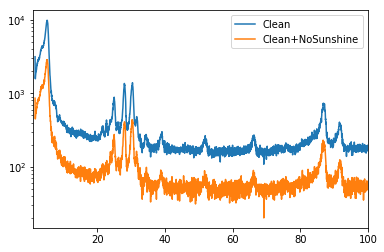

In [19]:

plt.plot(en, dtab['A']['det0']['epoch6']['spec'], label = 'Clean')
plt.plot(en, dtab4['A']['det0']['epoch6']['spec'], label = 'Clean+NoSunshine')


plt.legend()

plt.xlim([1, 100])
plt.yscale('Log')
plt.show()

No handles with labels found to put in legend.


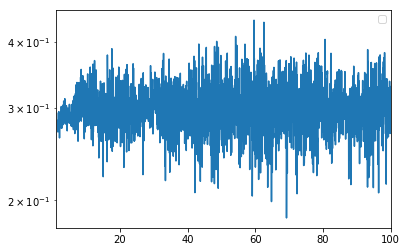

In [23]:
scaled = [ x / y for x, y in zip(dtab4['A']['det0']['epoch6']['spec'], dtab['A']['det0']['epoch6']['spec'])]

plt.plot(en, scaled)

plt.legend()

plt.xlim([1, 100])
plt.yscale('Log')
plt.show()